In [86]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
data_path = os.path.join("..", "data")

dir_store_path = os.path.join(data_path, "temporary results")

full_dataset_path = os.path.join(dir_store_path, "overall_dataset.xlsx")

In [88]:
dataset_df = pd.read_excel(full_dataset_path)

In [89]:
dataset_df

DateTime Site Technician Water Quality Technician Counting  \
0   2023-01-31 10:40:00    A                    Randa               Randa   
1   2023-02-07 07:30:00    A                    Randa               Randa   
2   2023-02-14 09:00:00    A                    Randa               Randa   
3   2023-02-21 15:15:00    A                    Randa               Randa   
4   2023-02-22 11:50:00    A                    Randa               Randa   
..                  ...  ...                      ...                 ...   
262 2023-01-31 12:13:00    F                    Randa               Randa   
263 2023-02-07 08:48:00    F                    Randa               Randa   
264 2023-02-14 10:25:00    F                    Randa               Randa   
265 2023-02-21 16:40:00    F                    Randa               Randa   
266 2023-04-20 13:25:00    F                    Randa                Anan   

     Temp C_mean  Temp C_std  Ph_mean    Ph_std  Cond (ms)_mean  \
0           9.75    0.353553     8.30  0.141421           0.710   
1           6.50    0.707107     7.80  0.141421           0.745   
2           8.50    0.707107     7.80  0.000000           0.845   
3          10.50    0.707107     7.95  0.070711           1.290   
4          12.00         NaN     7.90       NaN           0.740   
..           ...         ...      ...       ...             ...   
262         8.10    0.282843     8.09  0.014142           0.765   
263         6.00    0.000000     8.10  0.000000           0.785   
264         8.50    0.707107     7.95  0.070711           0.780   
265         9.50    0.707107     8.00  0.141421           1.140   
266        13.50    0.577350     7.95  0.057735         622.500   

     Cond (ms)_std  Coliform (1ml)_mean  Coliform (1ml)_std  Ecoli (1ml)_mean  \
0         0.028284                10.00            4.242641               3.0   
1         0.007071                17.00            2.828427               6.5   
2         0.021213                23.50            3.535534               7.5   
3         0.028284                16.00            5.656854               6.0   
4              NaN                54.00                 NaN               4.0   
..             ...                  ...                 ...               ...   
262       0.007071                 6.00            2.828427               7.5   
263       0.007071                14.00            0.000000               8.0   
264       0.000000                12.50            3.535534               5.0   
265       0.028284                20.00            7.071068               5.0   
266       8.660254                47.25           39.101364               3.0   

     Ecoli (1ml)_std  cso_hinterland  cso_middle  cso_sea  rained  tide_value  
0           0.000000        0.333333    0.285714      0.0       0    0.240592  
1           0.707107        0.500000    0.285714      0.0       0   -0.589693  
2           3.535534        0.833333    0.428571      0.0       1    0.215941  
3           1.414214        0.833333    0.428571      0.0       0    0.960796  
4                NaN        0.833333    0.571429      0.0       1   -0.476808  
..               ...             ...         ...      ...     ...         ...  
262         3.535534        0.333333    0.285714      0.0       0   -0.365662  
263         2.828427        0.500000    0.285714      0.0       0   -0.907697  
264         2.828427        0.833333    0.428571      0.0       1   -0.400976  
265         0.000000        0.833333    0.428571      0.0       0    0.350163  
266         2.160247        0.833333    0.857143      0.8       1    0.811674  

[267 rows x 19 columns]

In [90]:
dataset_df = dataset_df[dataset_df["DateTime"] > "2023-07-01"]

# Per Site Data Visualization and Analysis

In [91]:
dataset_df.columns.to_list()

['DateTime',
 'Site',
 'Technician Water Quality',
 'Technician Counting',
 'Temp C_mean',
 'Temp C_std',
 'Ph_mean',
 'Ph_std',
 'Cond (ms)_mean',
 'Cond (ms)_std',
 'Coliform (1ml)_mean',
 'Coliform (1ml)_std',
 'Ecoli (1ml)_mean',
 'Ecoli (1ml)_std',
 'cso_hinterland',
 'cso_middle',
 'cso_sea',
 'rained',
 'tide_value']

In [92]:
analyze_columns = [
    "Temp C_mean",
    "Ph_mean",
    "Cond (ms)_mean",
    "cso_hinterland",
    "cso_middle",
    "cso_sea",
    "rained",
    "tide_value",
    "Ecoli (1ml)_mean",
    "Coliform (1ml)_mean",
]

## General Info

In [93]:
site_dict = {}
for site in dataset_df["Site"].unique():
    site_dict[site] = dataset_df[dataset_df["Site"] == site]

In [94]:
for site in site_dict:
    print("Site: ", site)
    print("-" * 30)
    print(site_dict[site].describe().to_string())
    print("\n")
    print(
        "Timespan: "
        + pd.to_datetime(site_dict[site]["DateTime"])
        .min()
        .strftime("%Y-%m-%d %H:%M:%S")
        + " - "
        + pd.to_datetime(site_dict[site]["DateTime"])
        .max()
        .strftime("%Y-%m-%d %H:%M:%S")
    )
    print("\n")

Site:  A
------------------------------
                            DateTime  Temp C_mean  Temp C_std    Ph_mean     Ph_std  Cond (ms)_mean  Cond (ms)_std  Coliform (1ml)_mean  Coliform (1ml)_std  Ecoli (1ml)_mean  Ecoli (1ml)_std  cso_hinterland  cso_middle    cso_sea     rained  tide_value
count                             38    38.000000   38.000000  38.000000  38.000000       38.000000      38.000000            38.000000           38.000000         38.000000        38.000000       38.000000   38.000000  38.000000  38.000000   38.000000
mean   2023-08-28 06:34:36.315789312    22.225877    0.344621   7.795789   0.024510        1.765374       0.021522           101.137061           41.867053         20.174635        20.933628        0.223684    0.191729   0.268421   0.368421   -0.088104
min              2023-08-09 10:20:00    19.000000    0.000000   7.500000   0.000000        0.000000       0.000000            18.500000            0.000000          3.400000         0.577350        0.0

## Correlation Matrix Heatmap

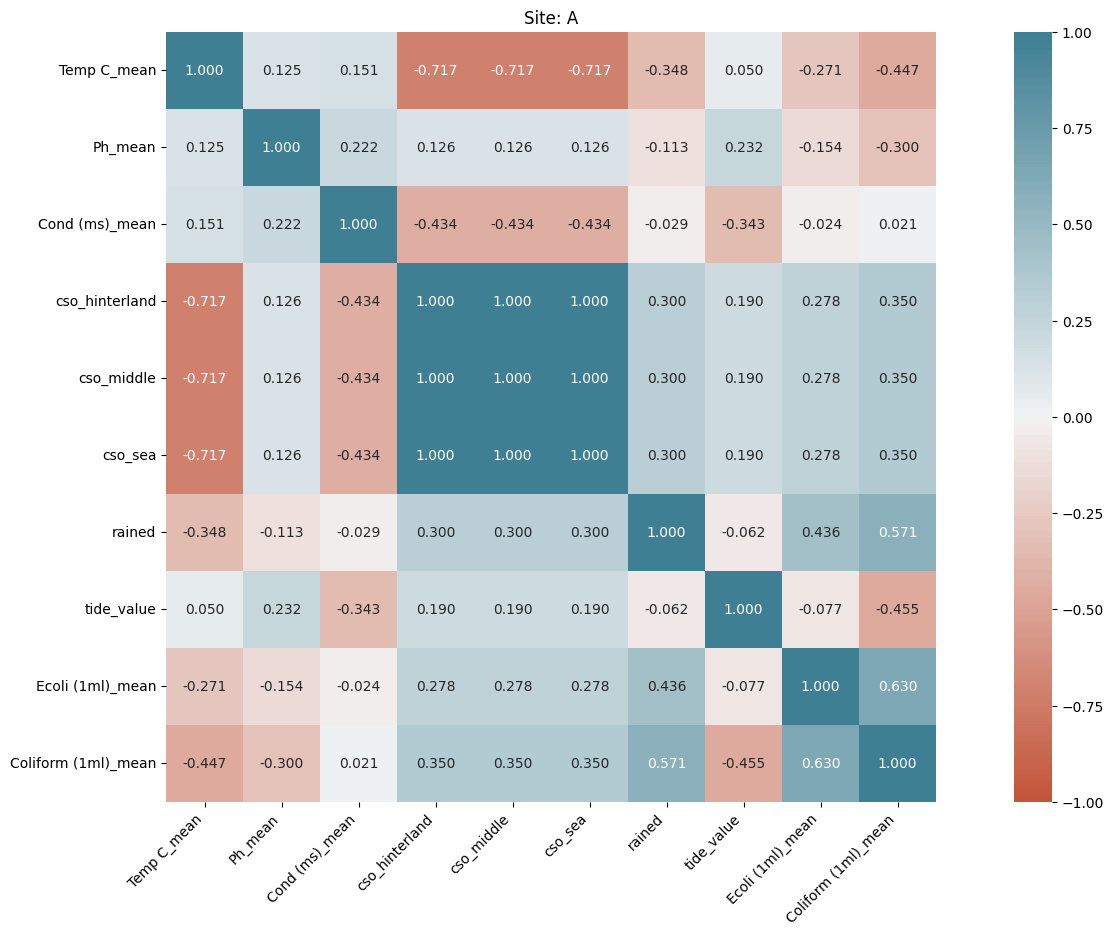

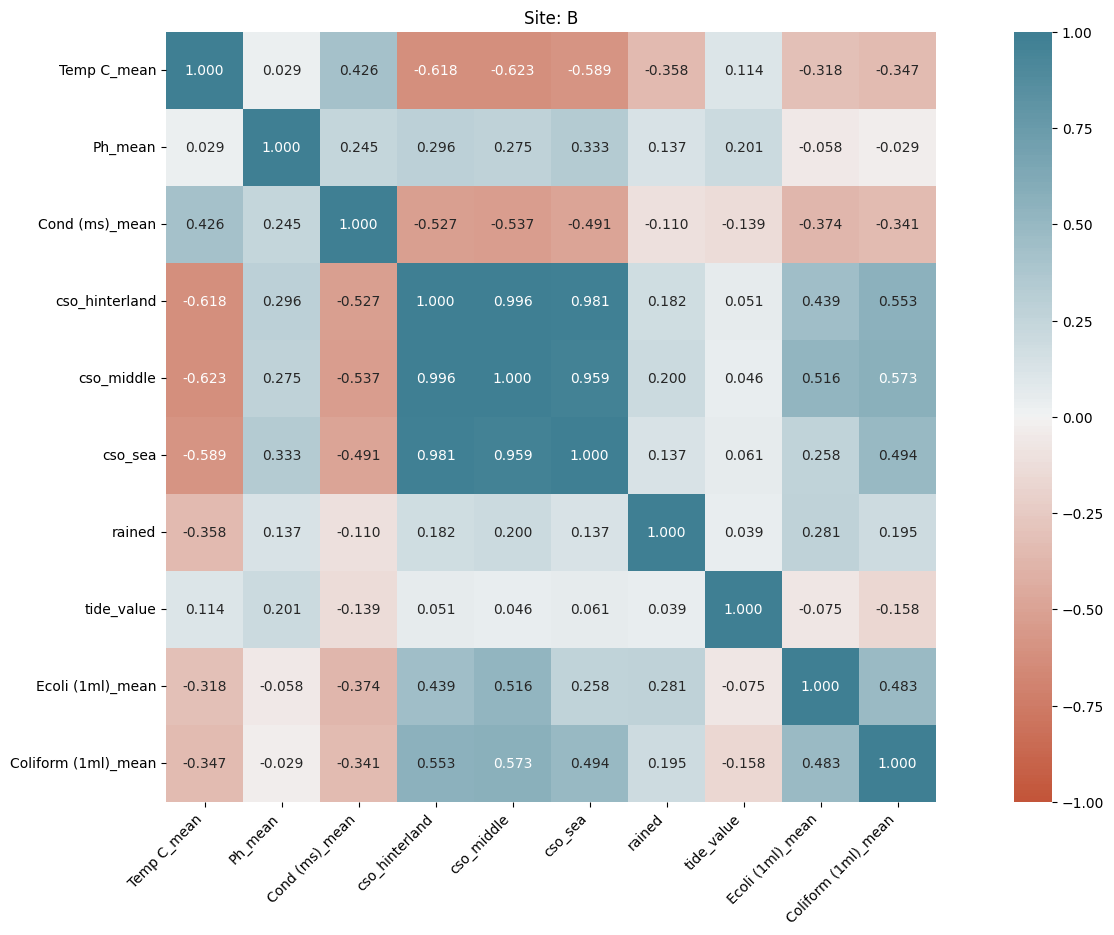

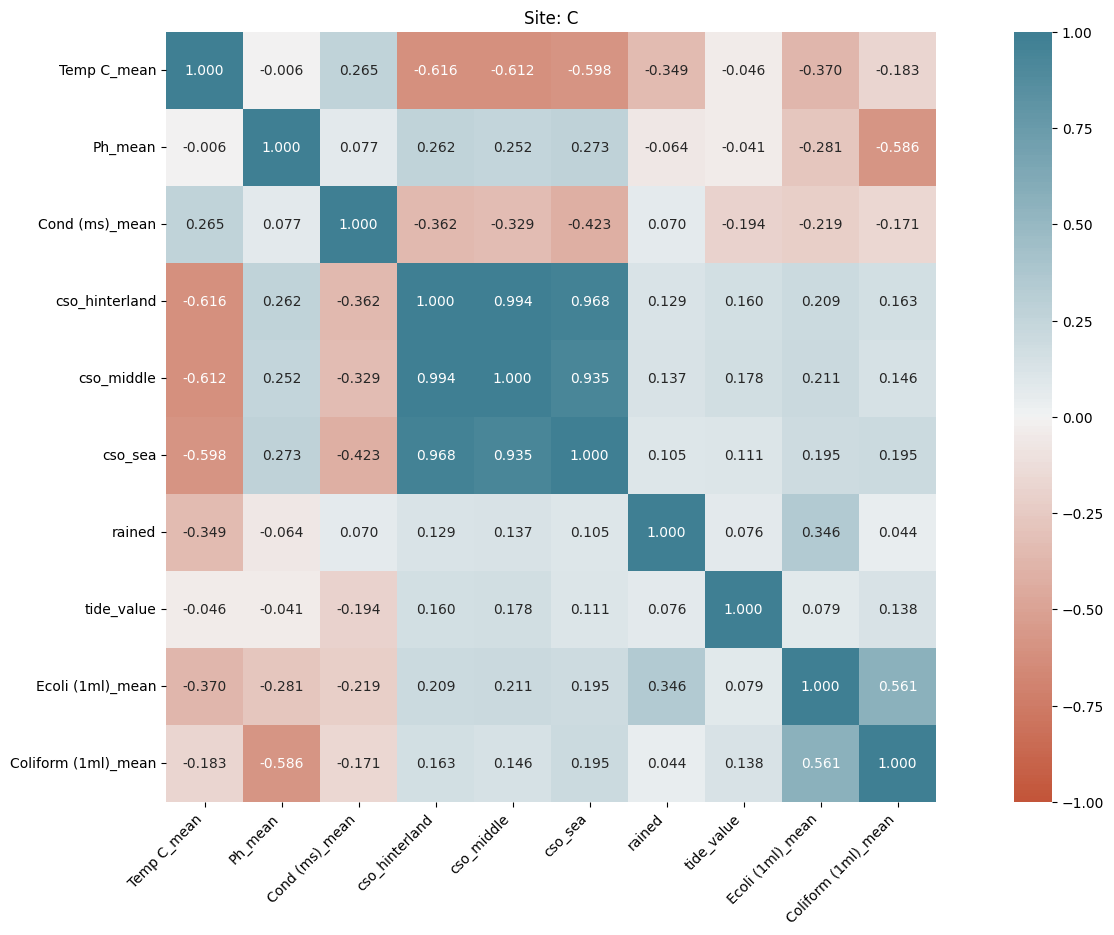

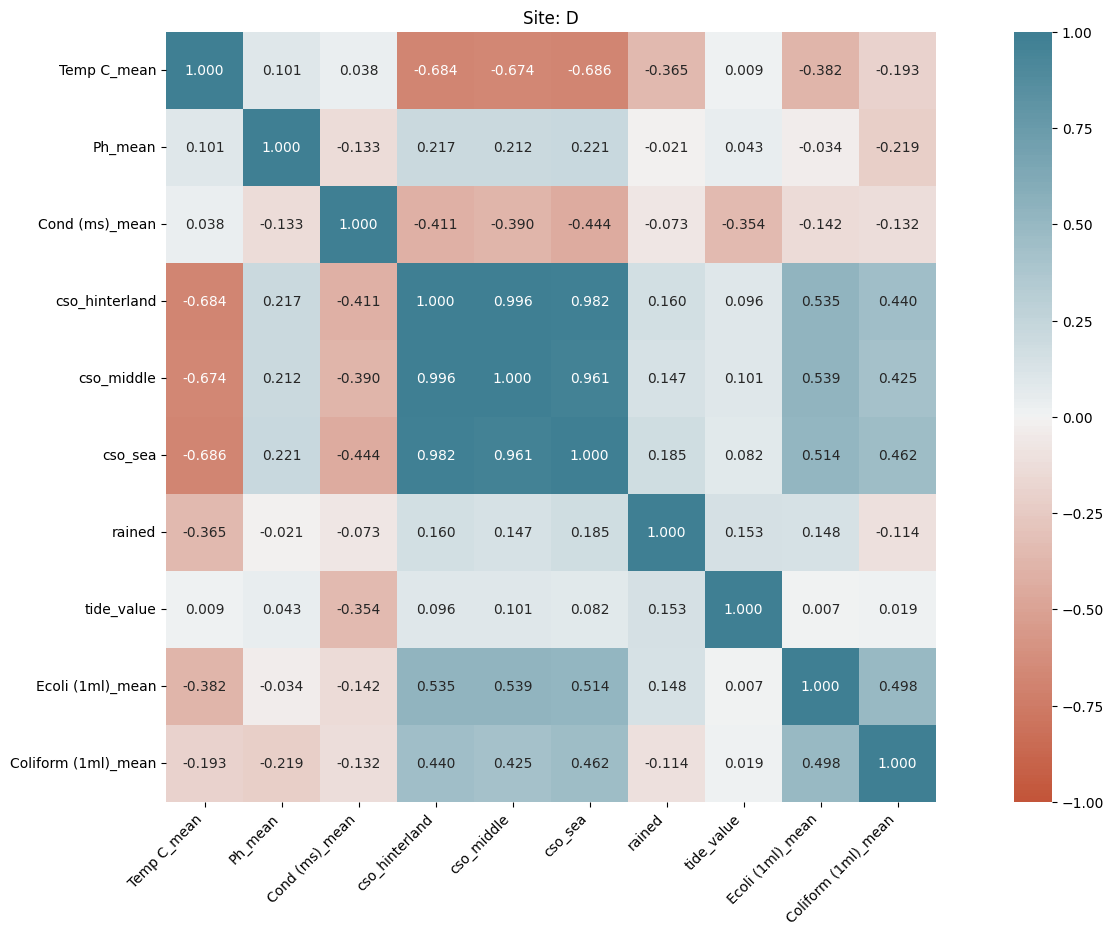

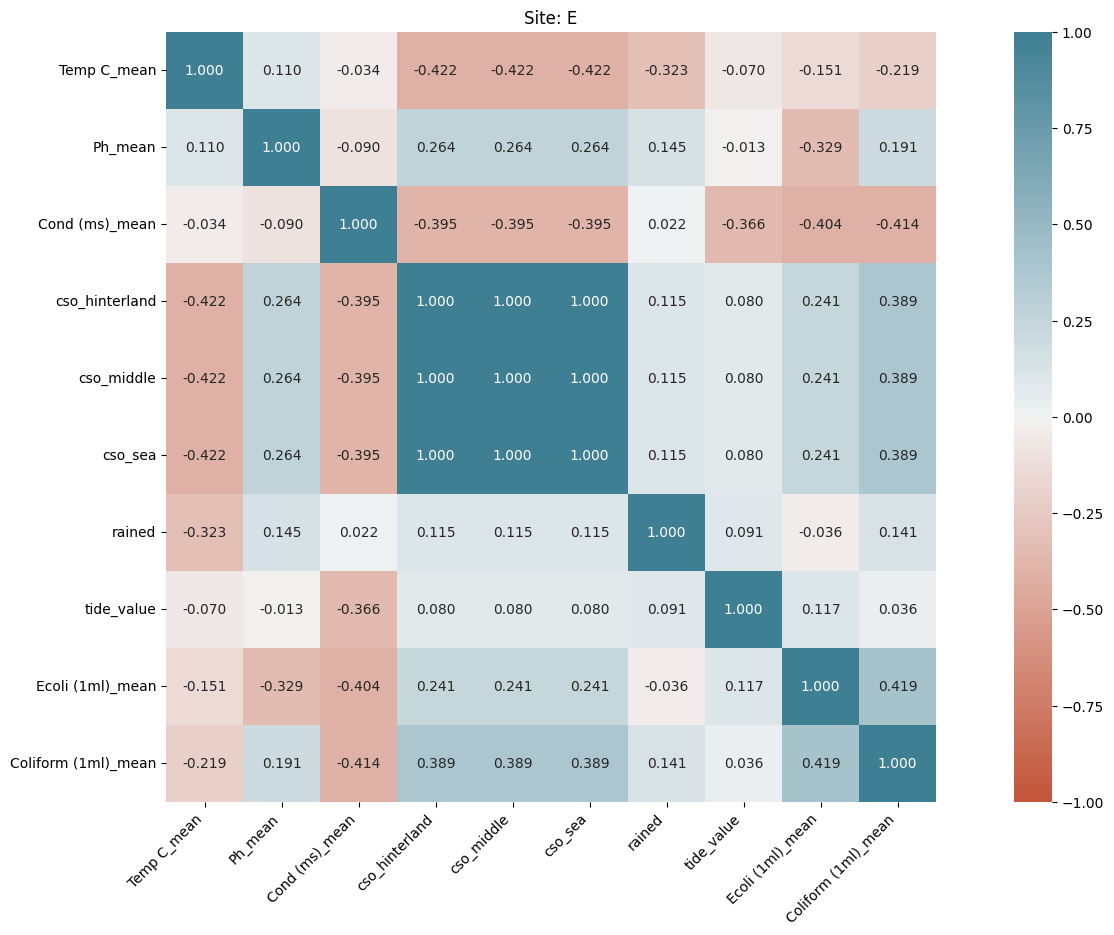

In [95]:
# Pearson, used for two quantitative continuous variables which have a linear relationship
# Spearman, used for two quantitative variables if the link is partially linear, or for one qualitative ordinal variable and one quantitative variable
# Kendall, often used for two qualitative ordinal variables

for site in site_dict:
    corr = site_dict[site][analyze_columns].corr(method="pearson")

    plt.figure(figsize=(20, 10))
    plt.title("Site: " + site)
    ax = sns.heatmap(
        corr,
        vmin=-1,
        vmax=1,
        center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        fmt=".3f",
    )
    ax.set_xticklabels(
        ax.get_xticklabels(), rotation=45, horizontalalignment="right"
    )

## Scatter Plots

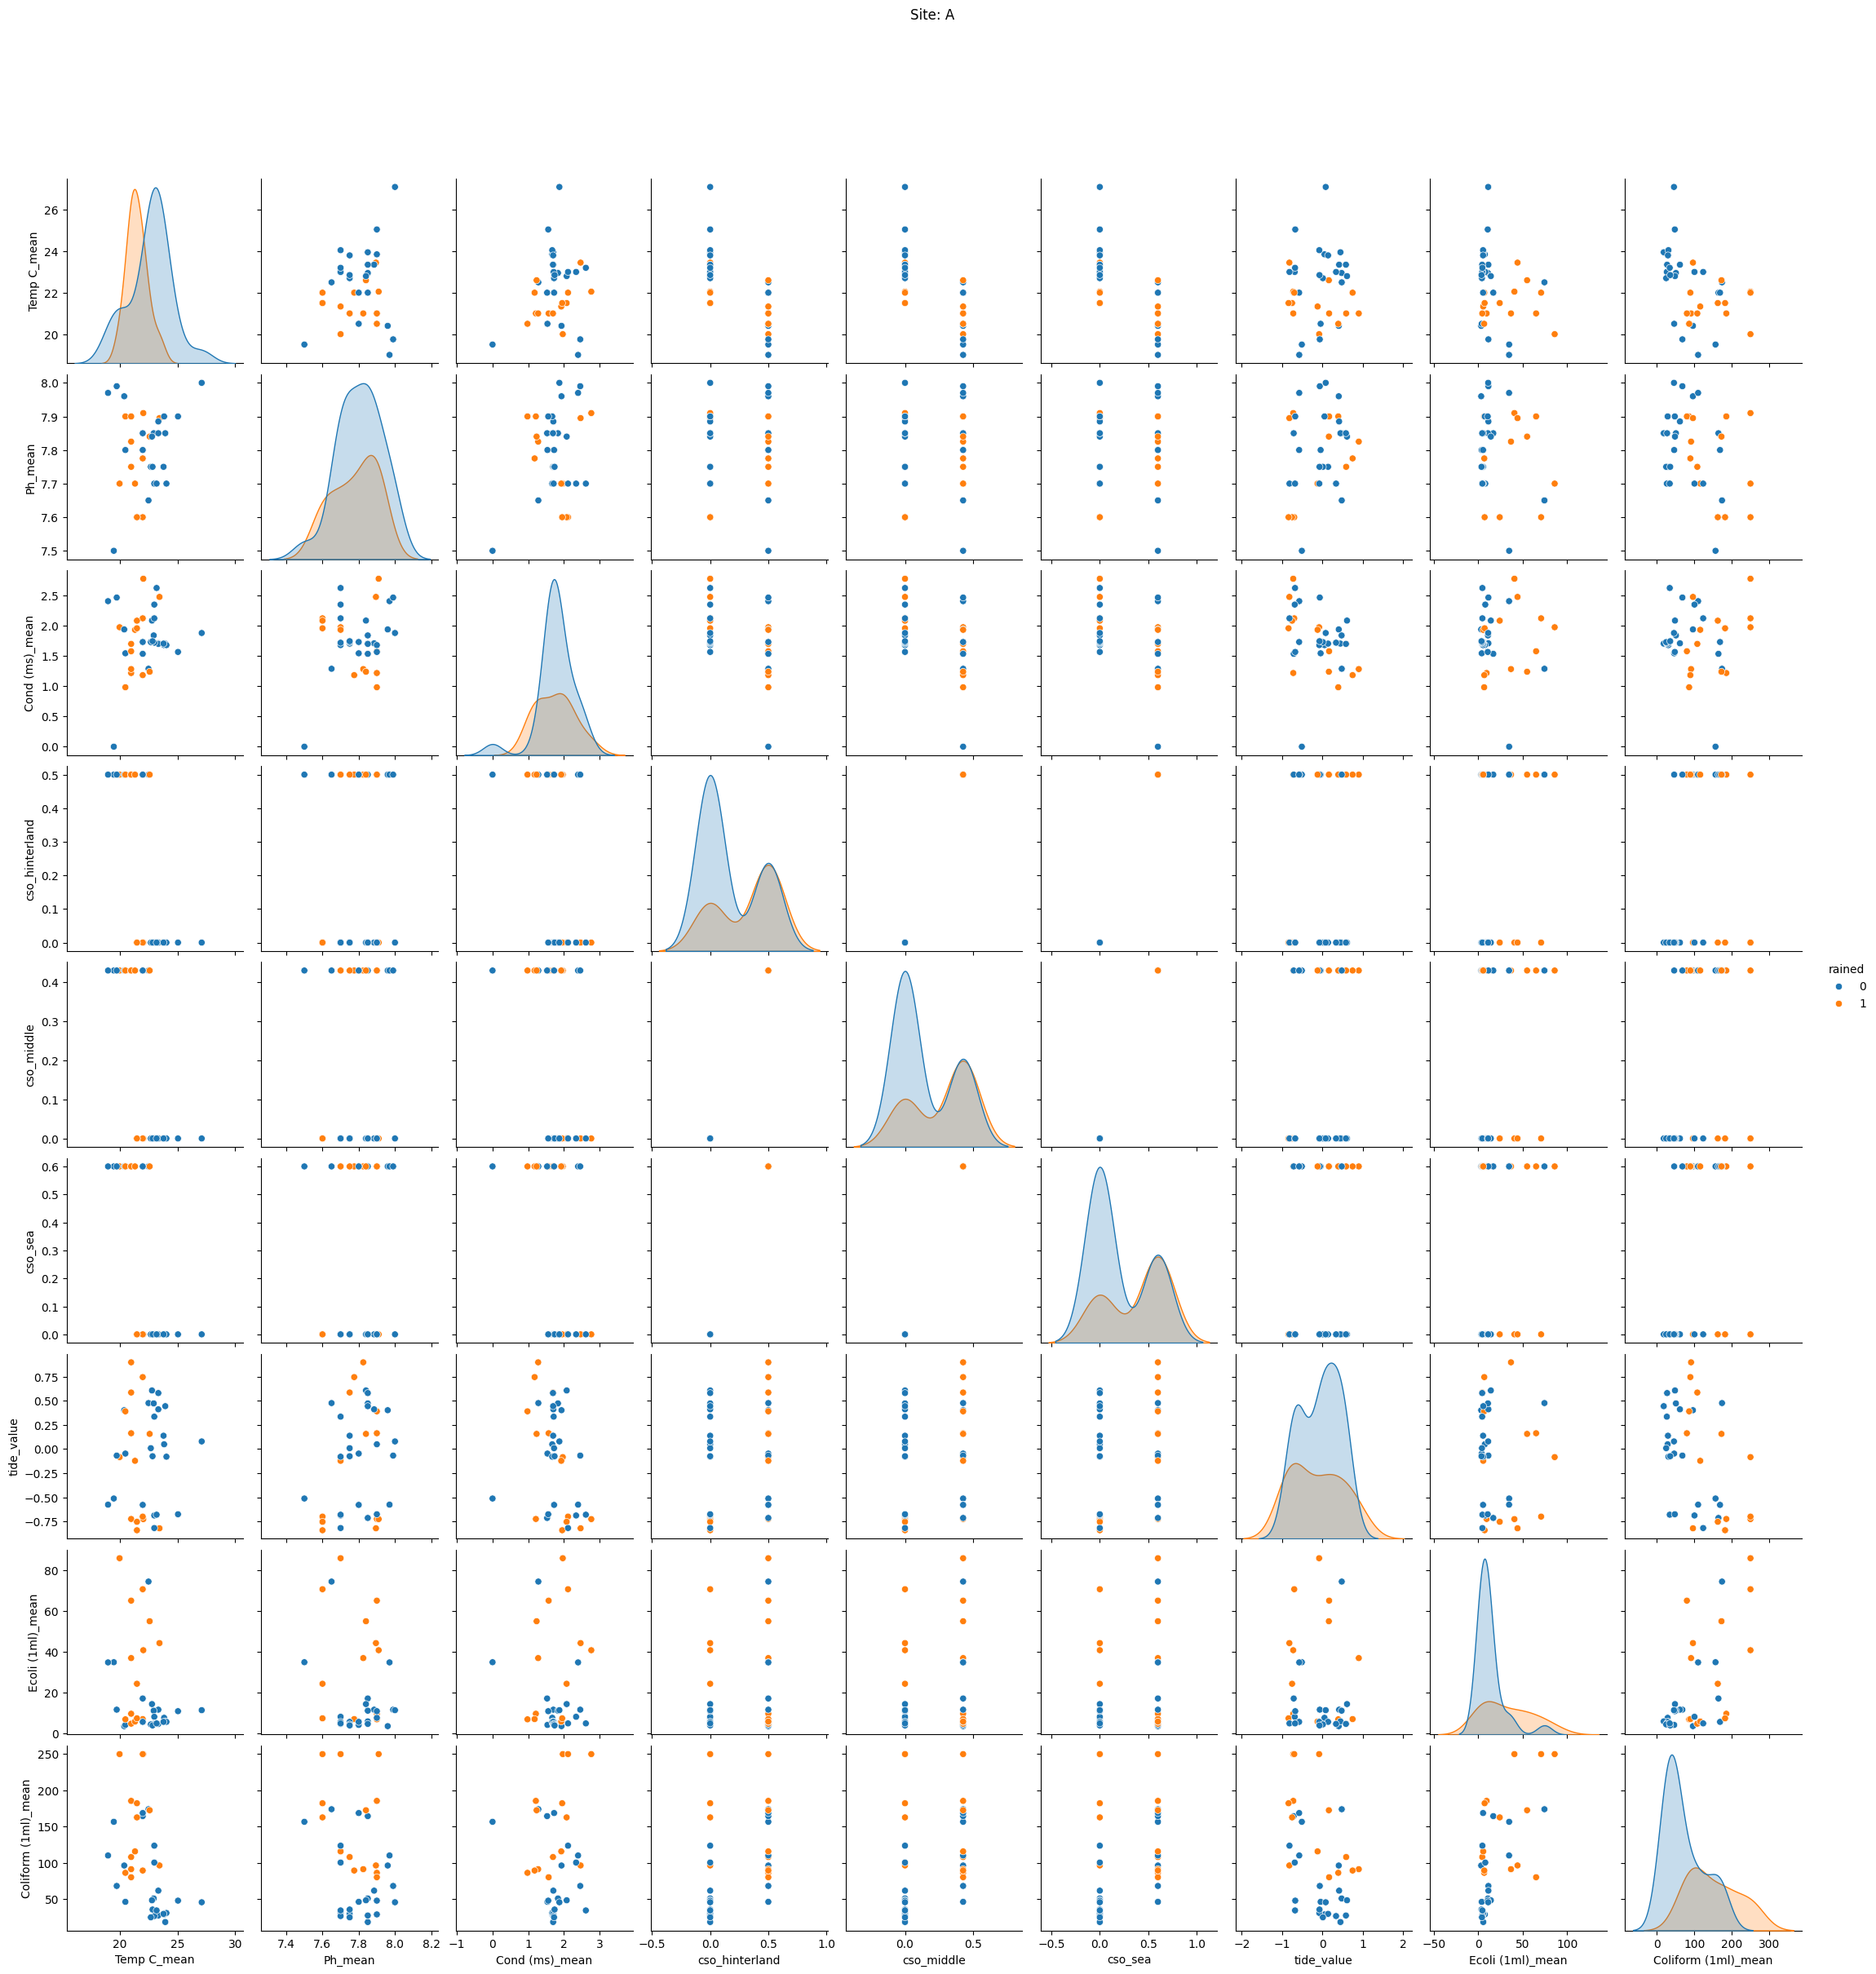

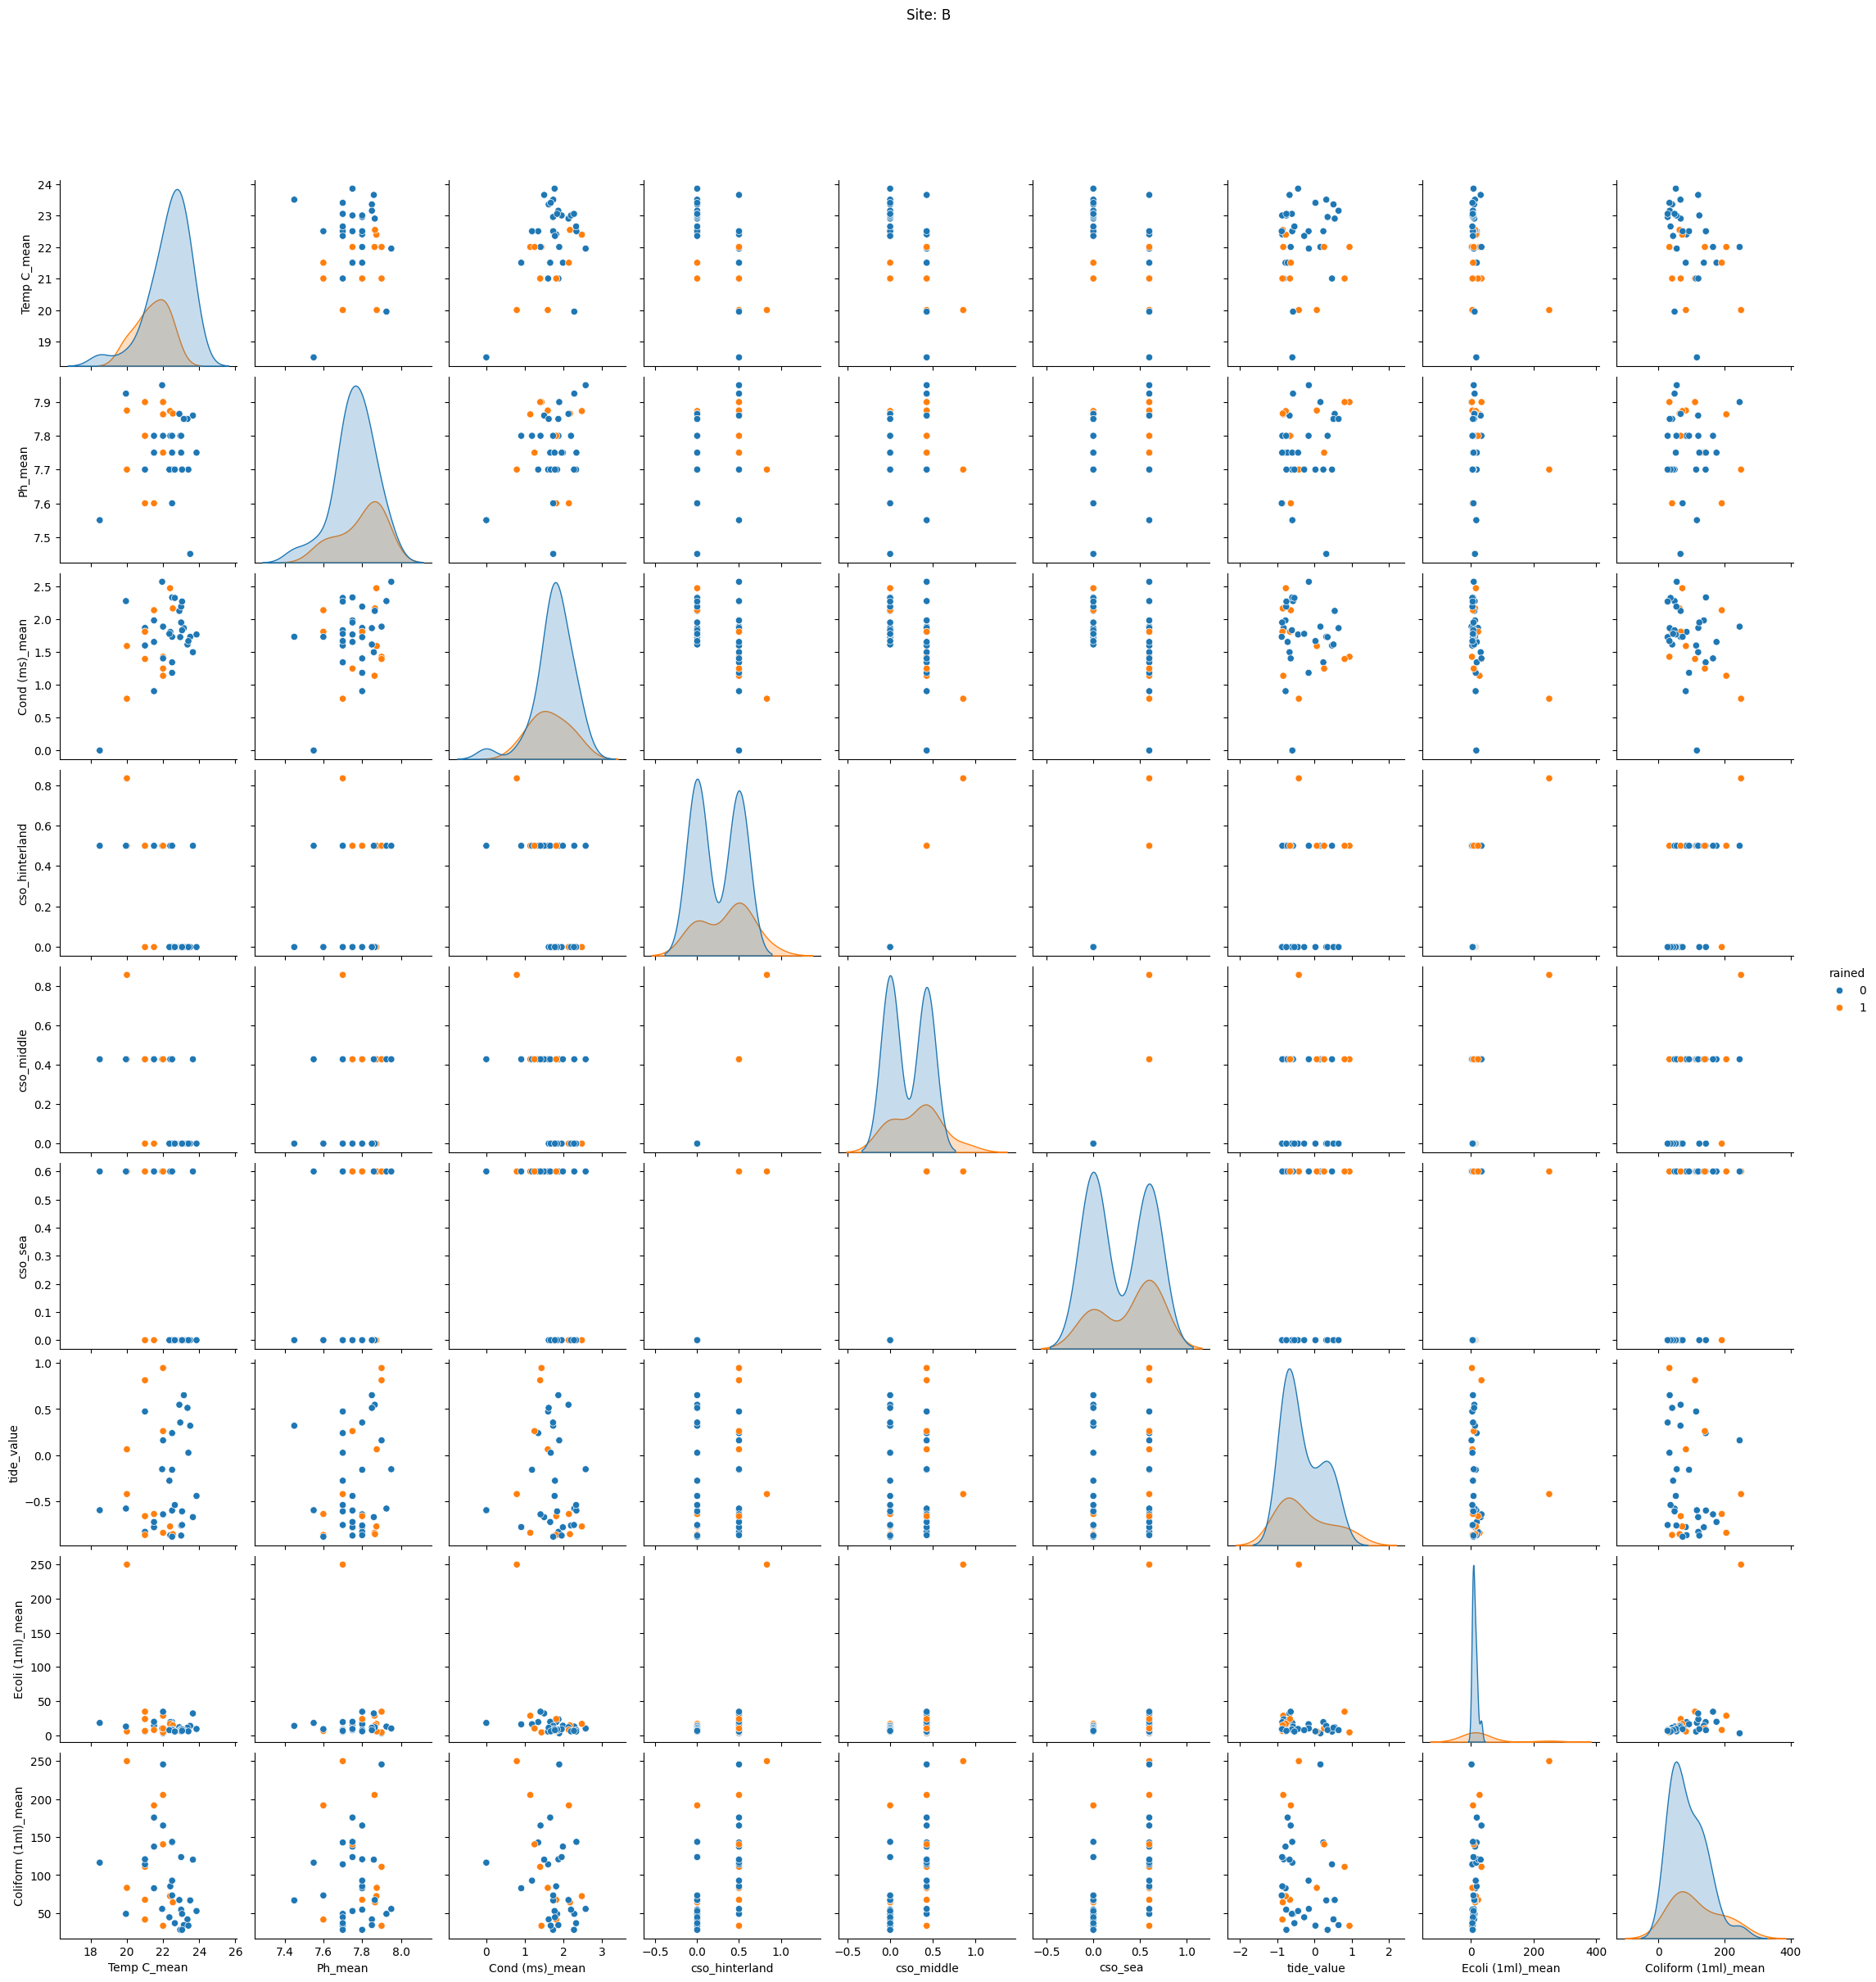

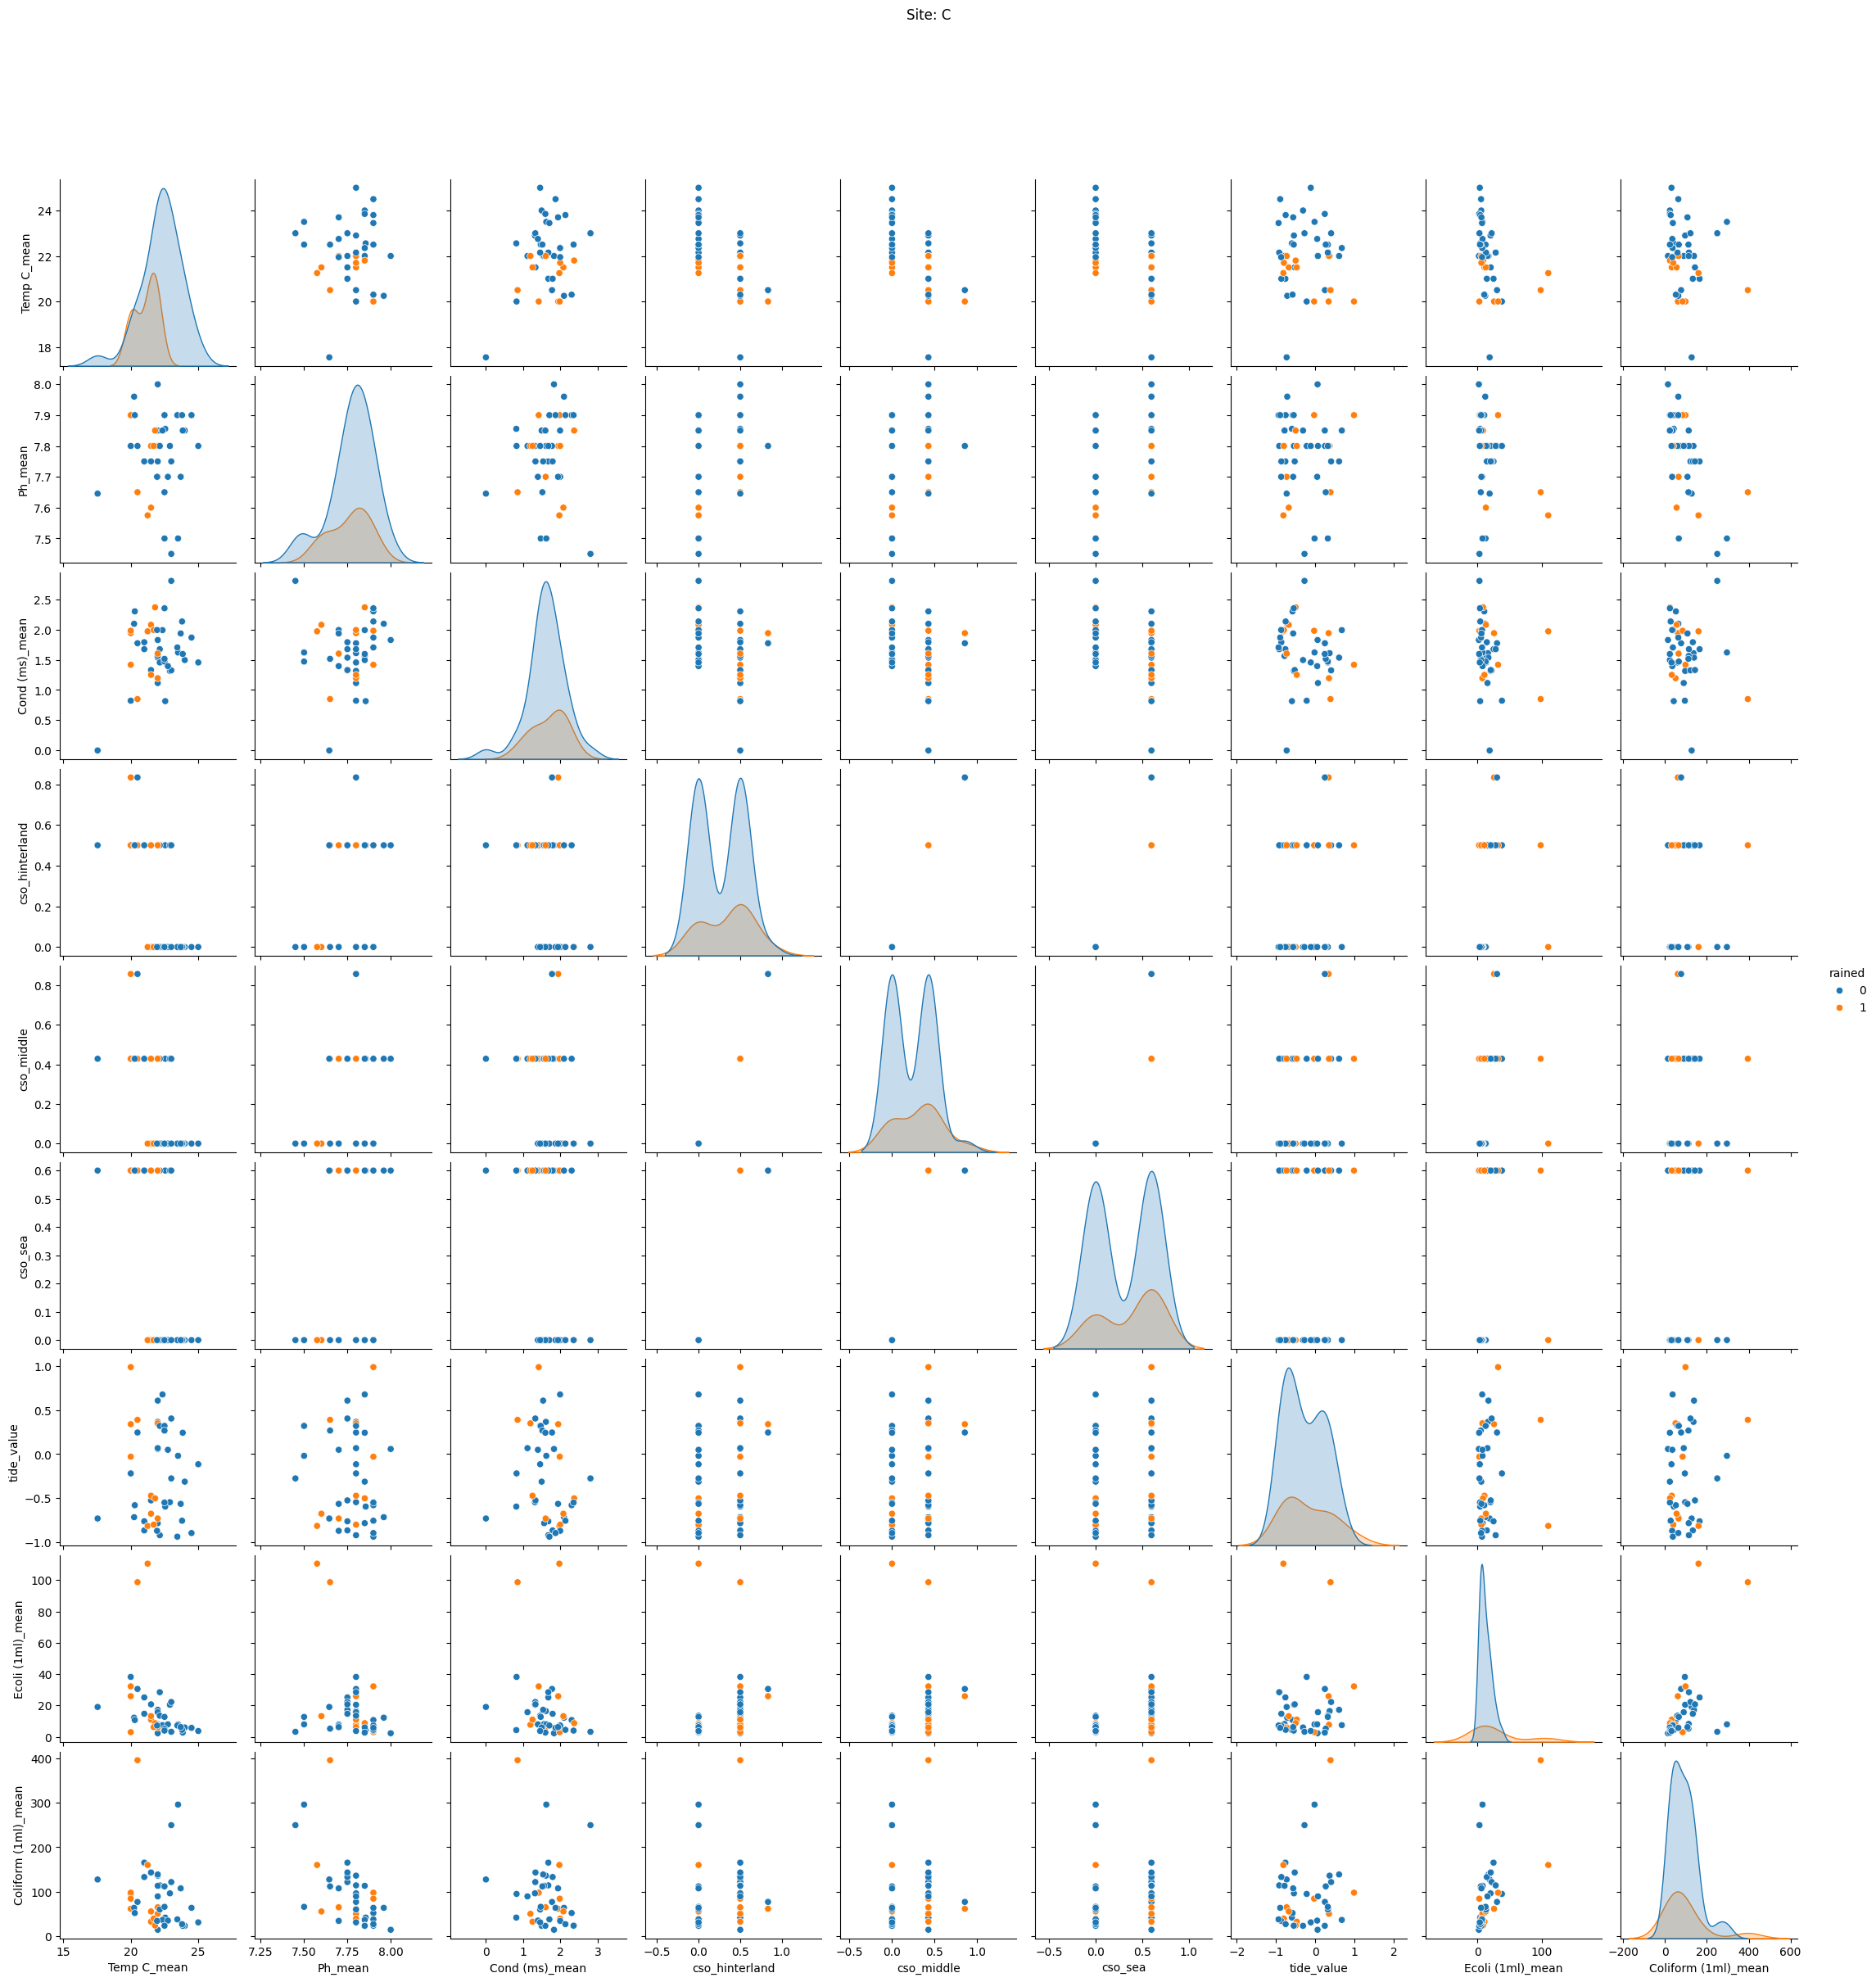

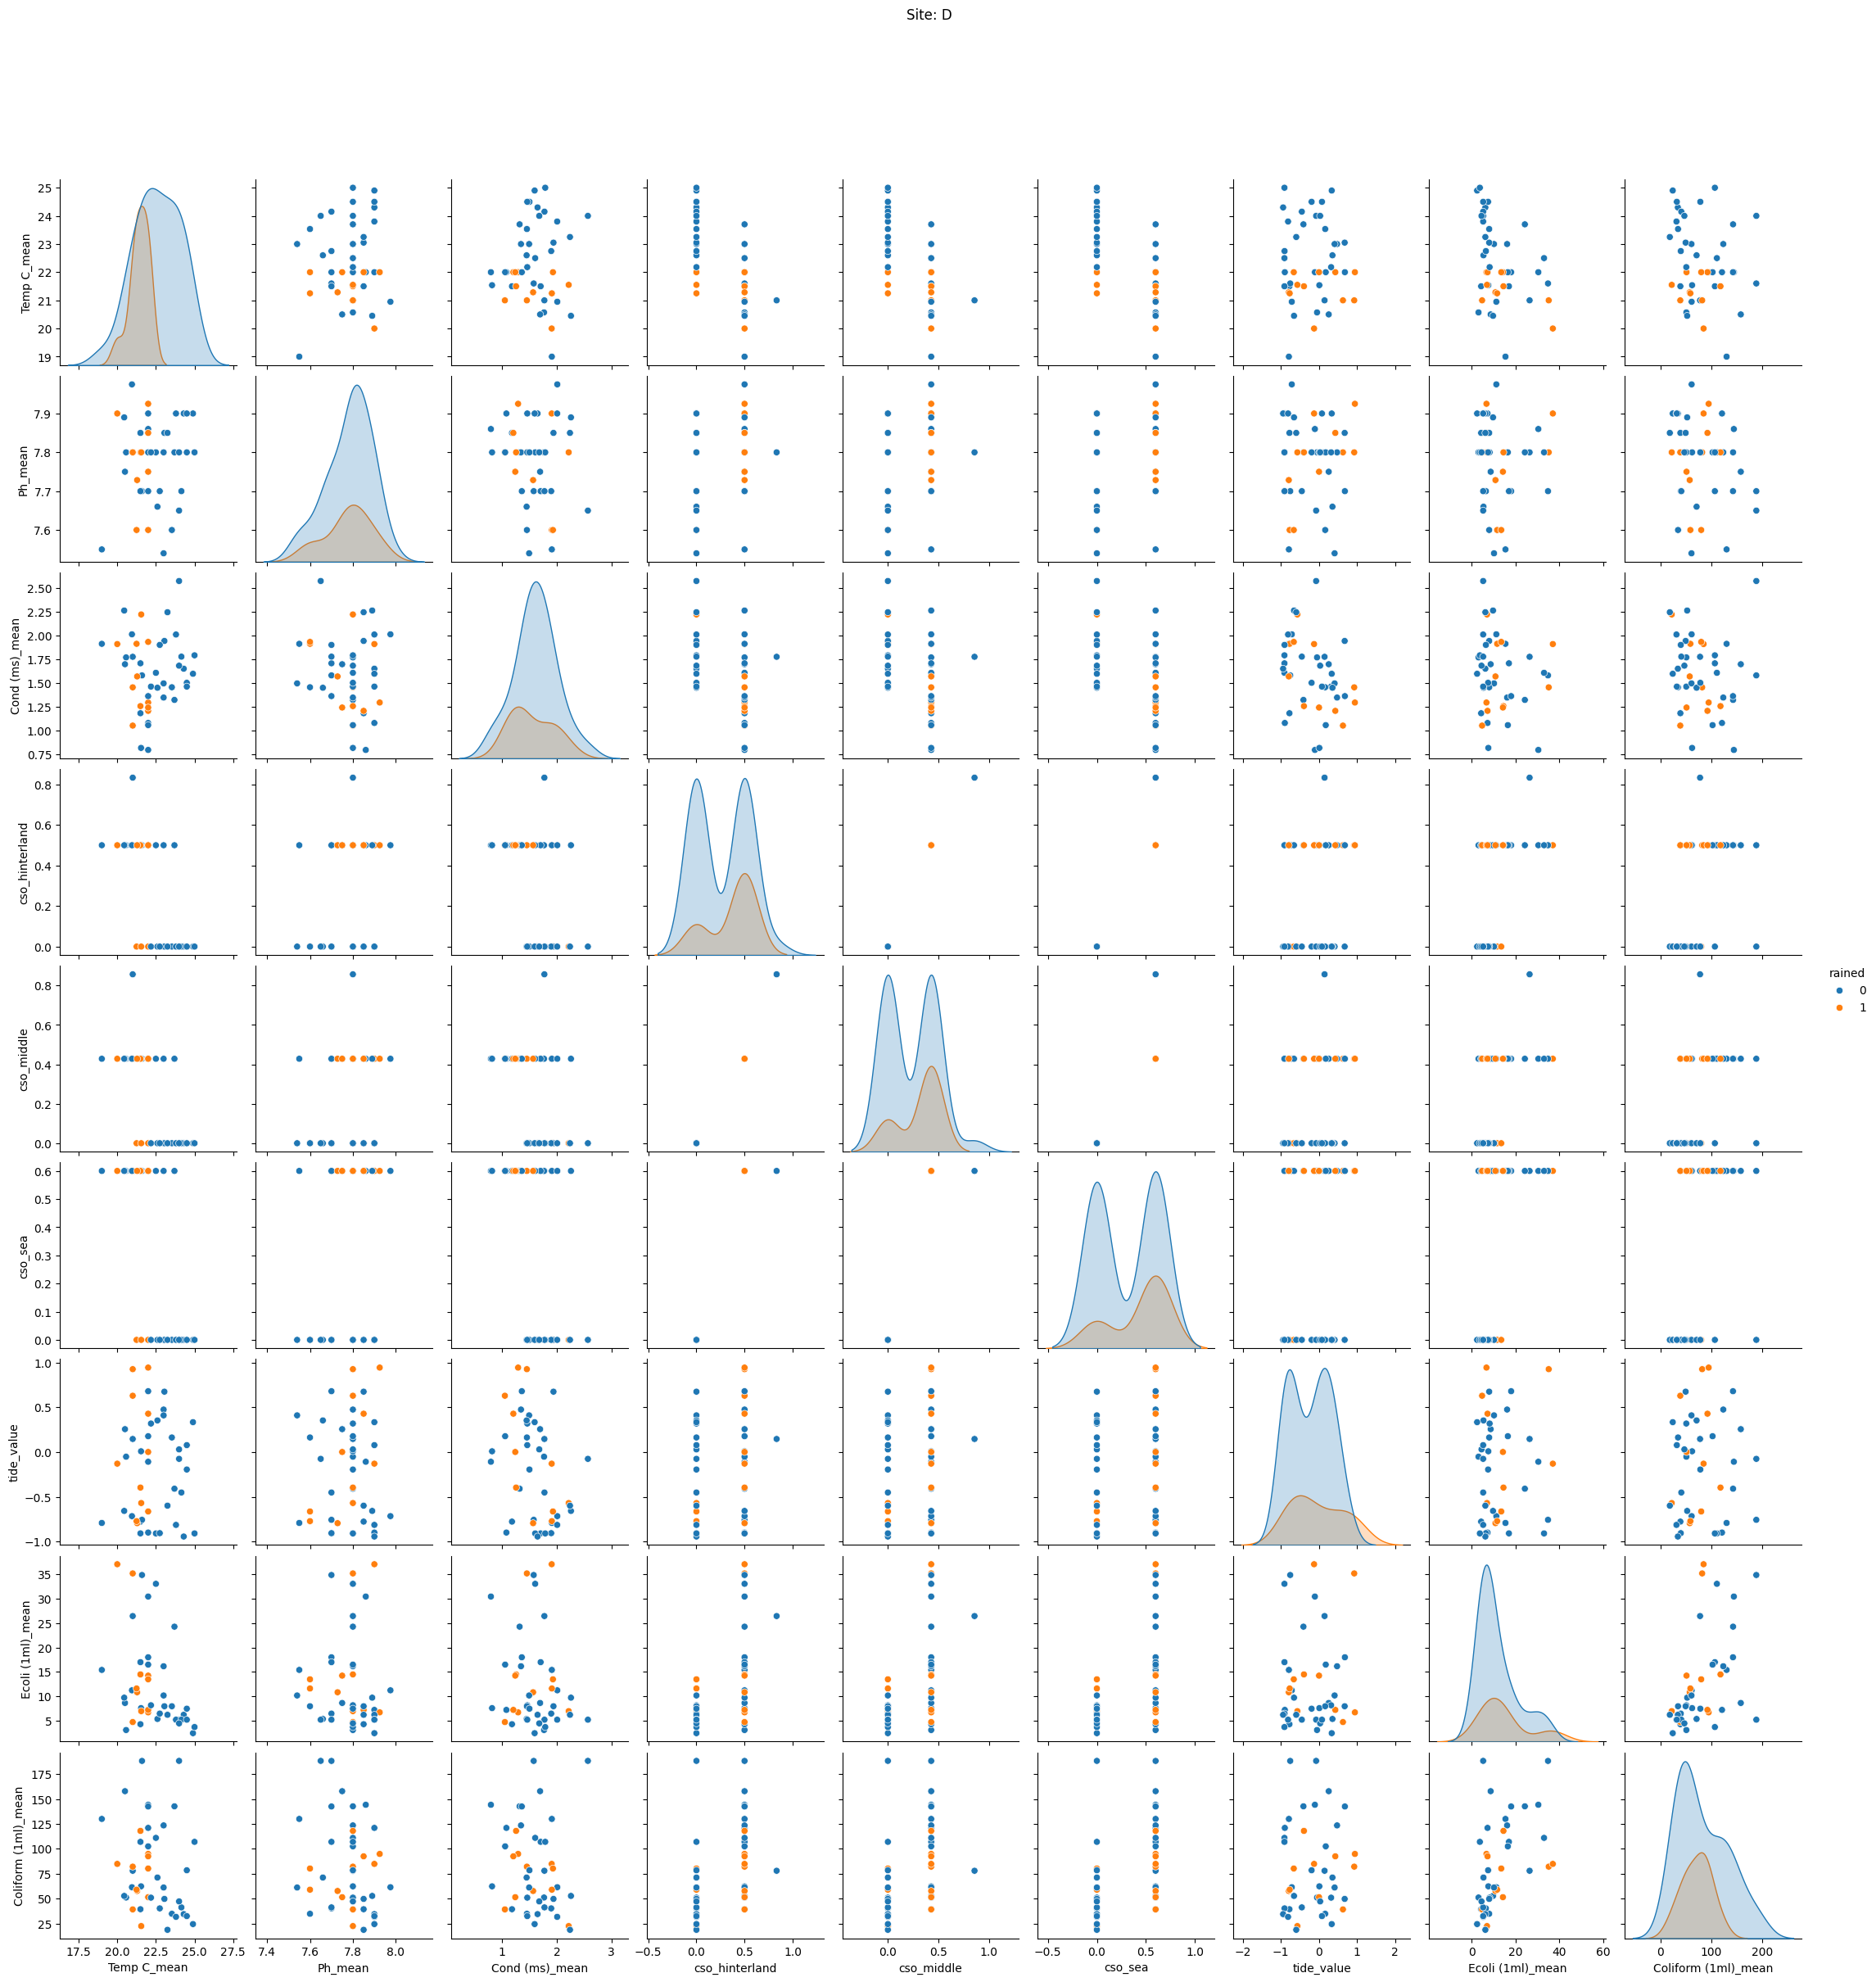

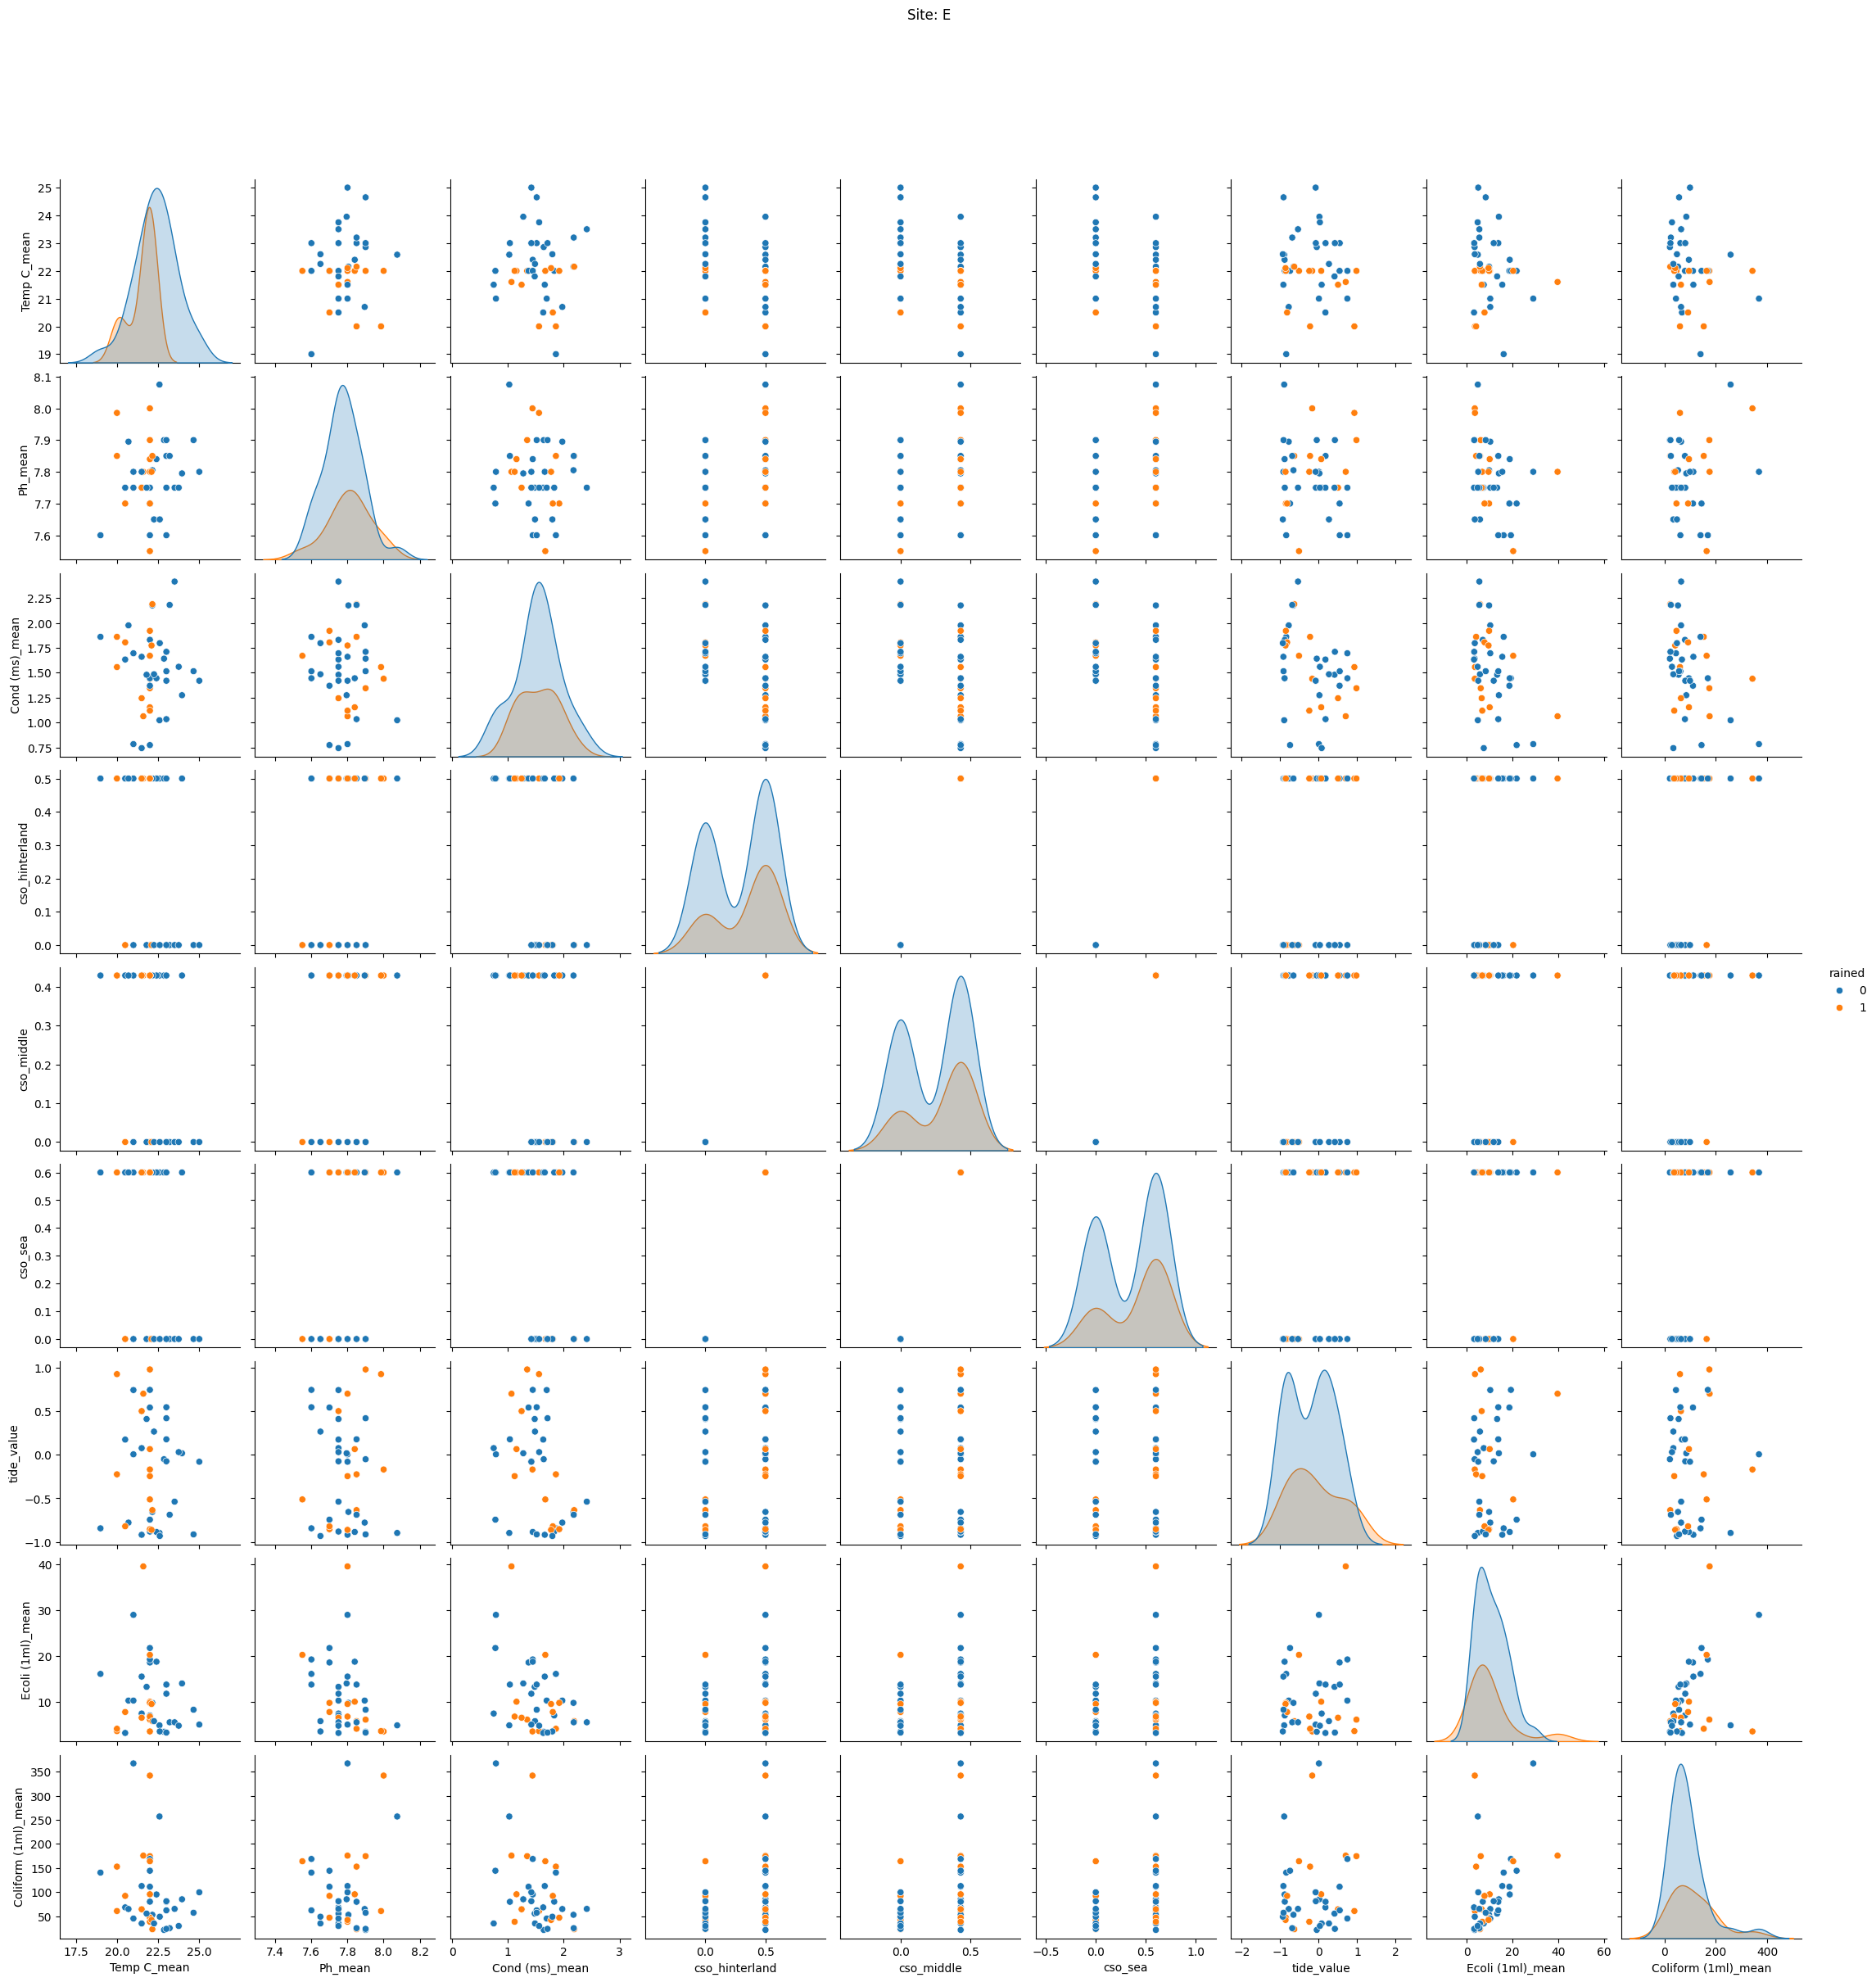

In [96]:
for site in site_dict:
    plot = sns.pairplot(data=site_dict[site][analyze_columns], hue='rained')
    plot.figure.suptitle("Site: " + site, y=1.08)

### Conductivity vs Tides

In [97]:
cols = [
    "Cond (ms)_mean",
    "tide_value",
]

<Figure size 1500x750 with 0 Axes>

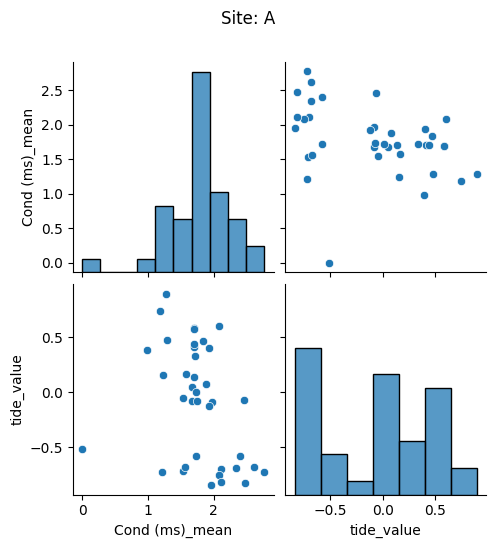

<Figure size 1500x750 with 0 Axes>

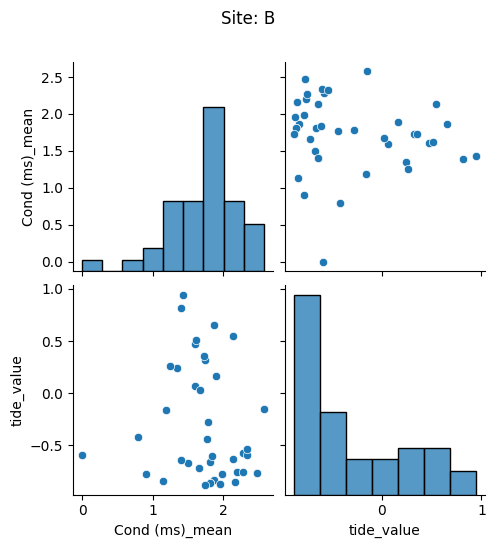

<Figure size 1500x750 with 0 Axes>

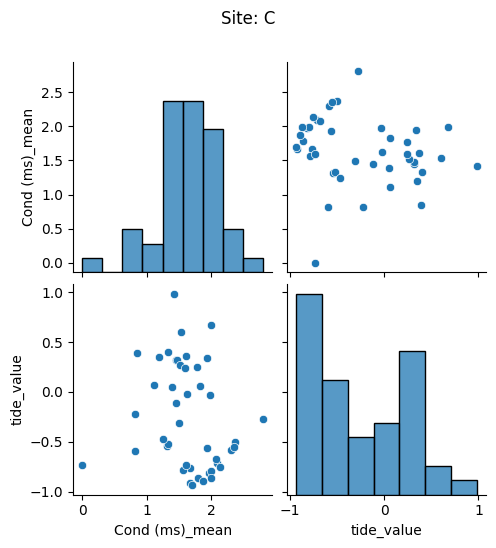

<Figure size 1500x750 with 0 Axes>

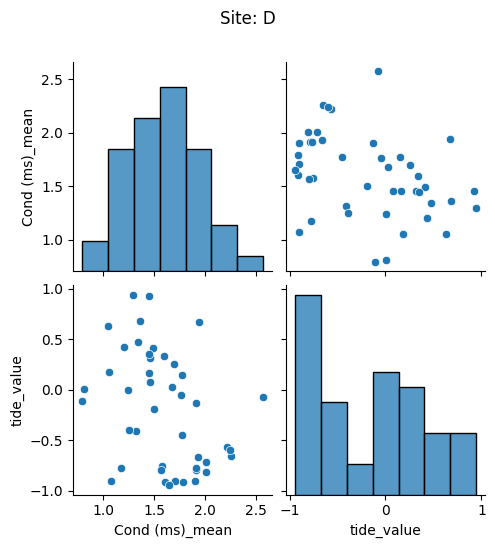

<Figure size 1500x750 with 0 Axes>

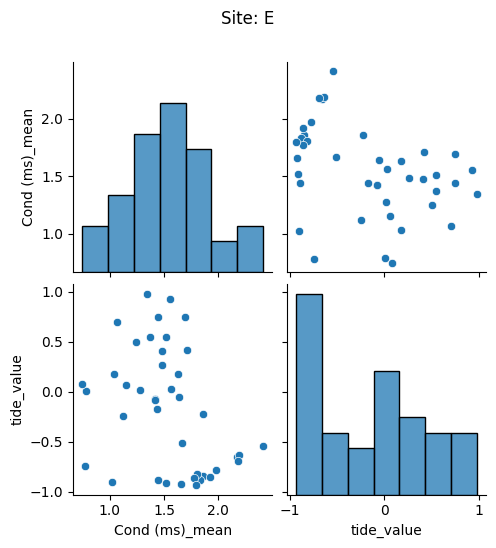

In [98]:
for site in site_dict:
    plt.figure(figsize=(15, 7.5))
    plot = sns.pairplot(data=site_dict[site][cols])
    plot.figure.suptitle("Site: " + site, y=1.08)

## Boxplots

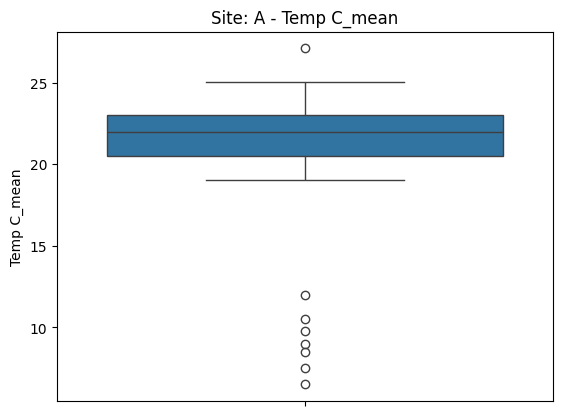

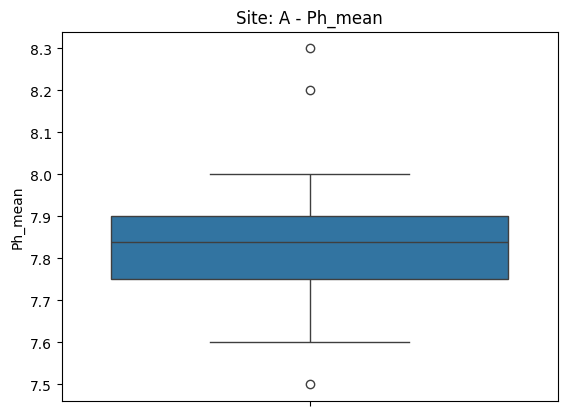

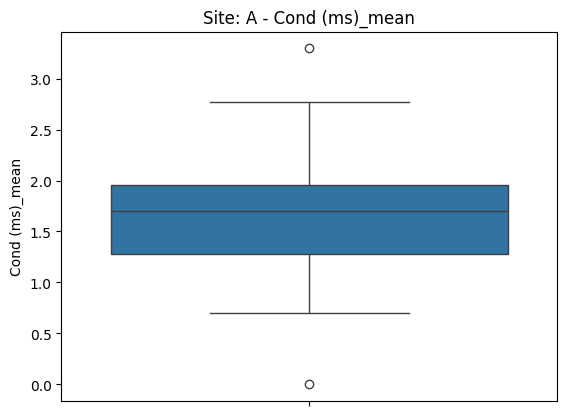

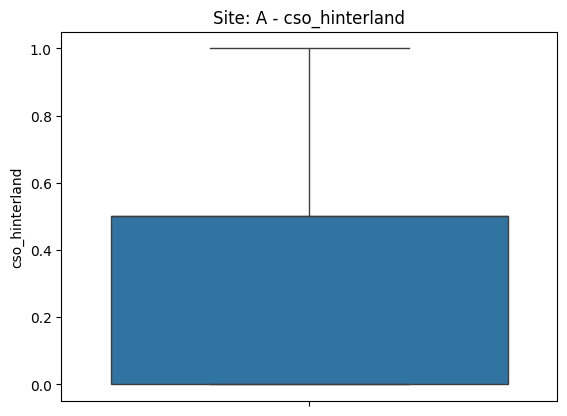

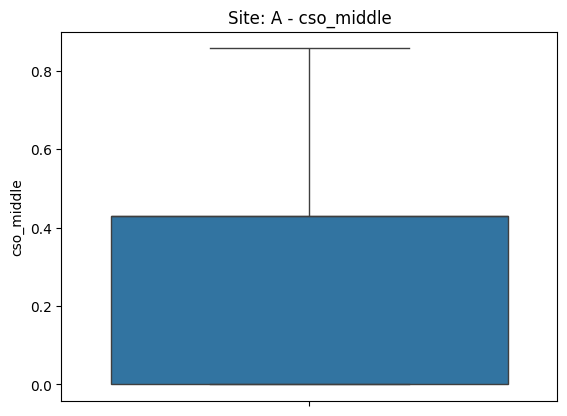

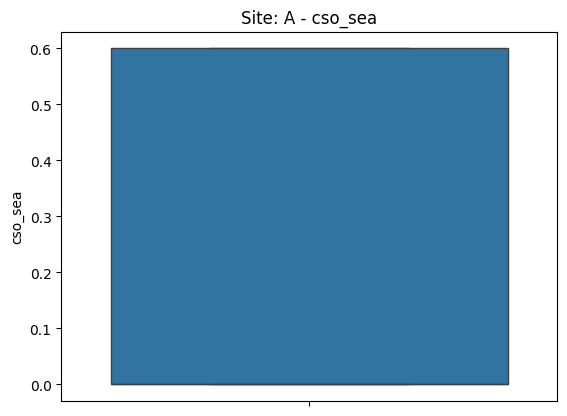

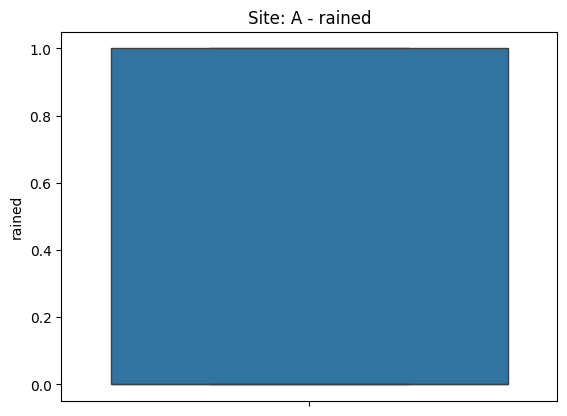

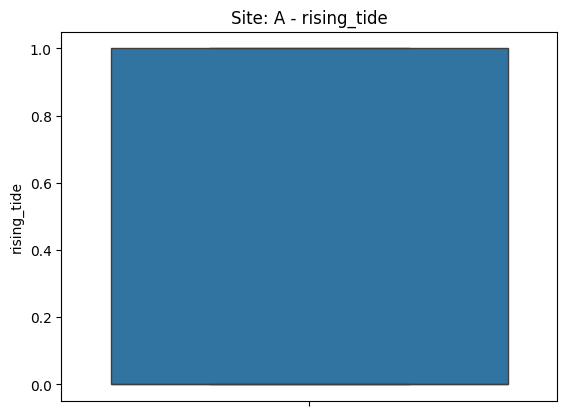

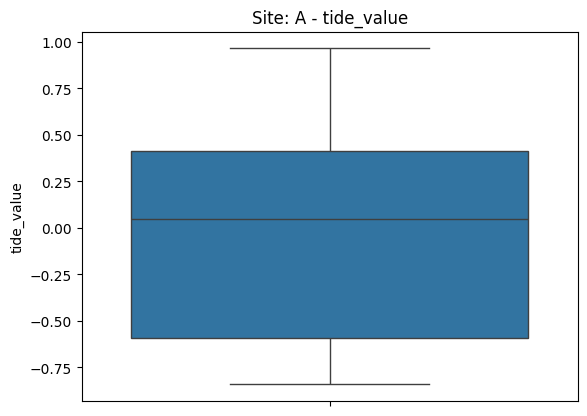

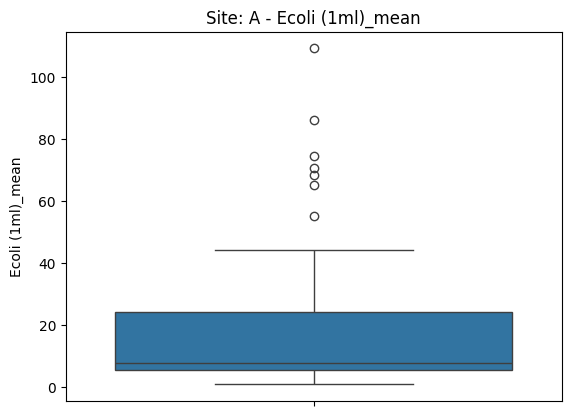

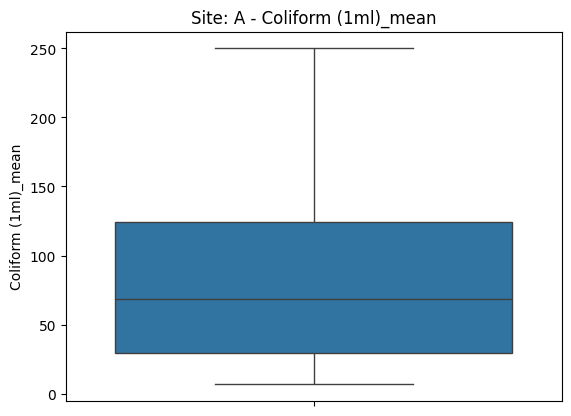

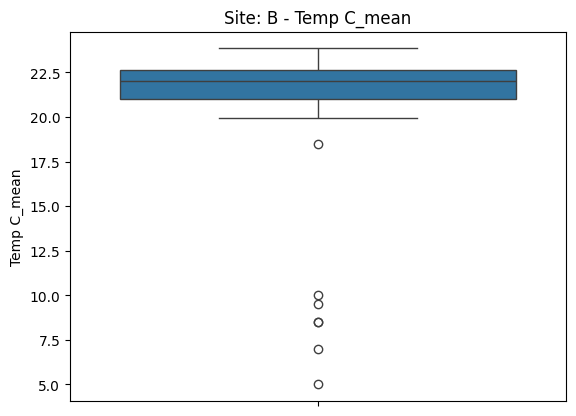

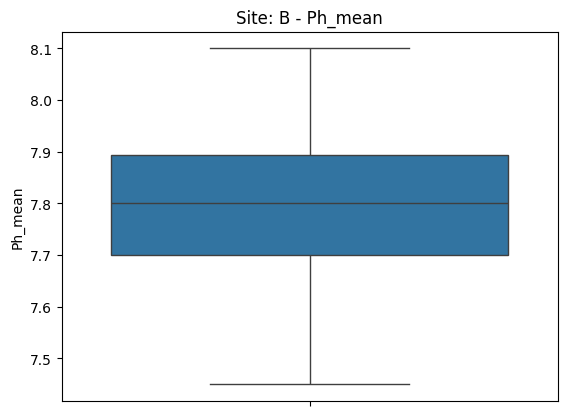

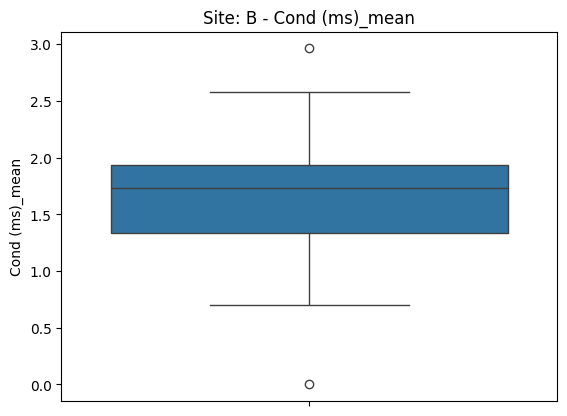

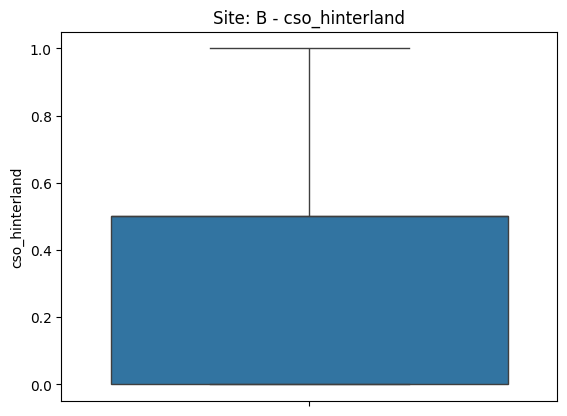

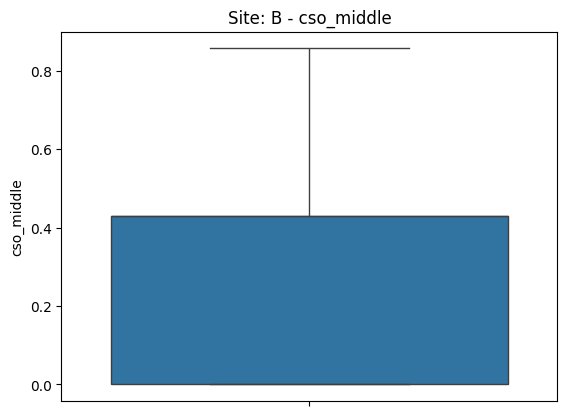

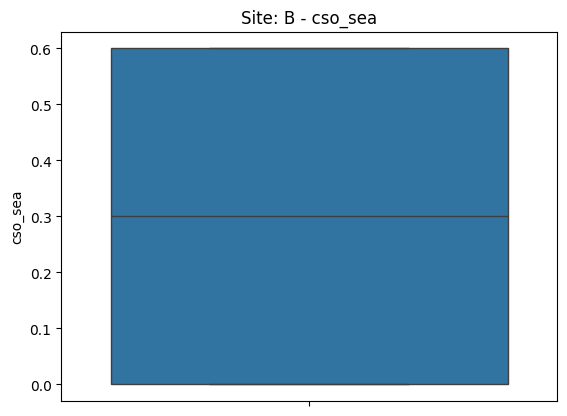

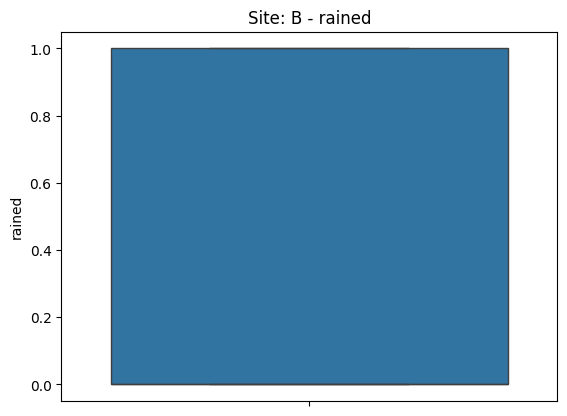

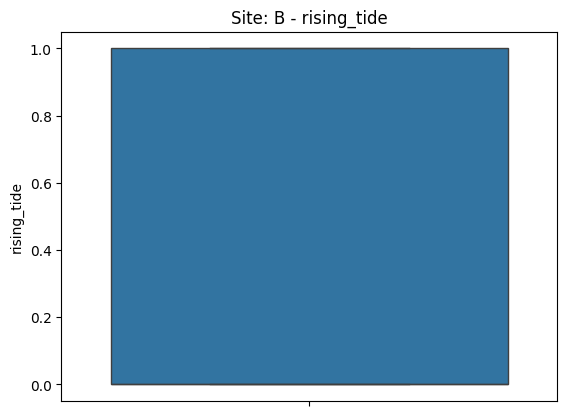

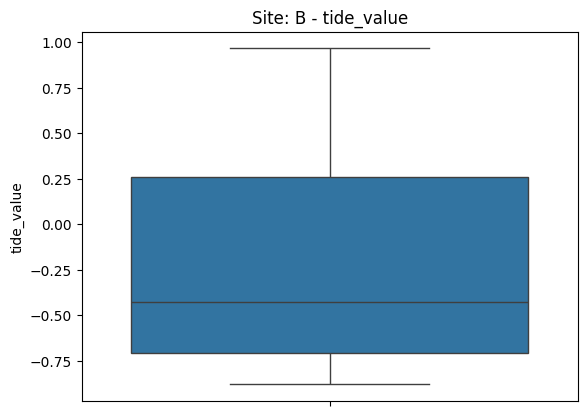

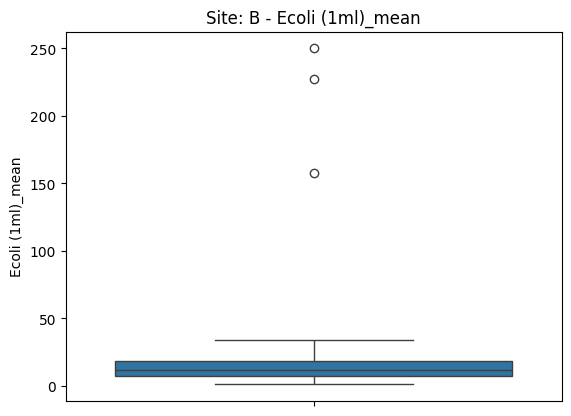

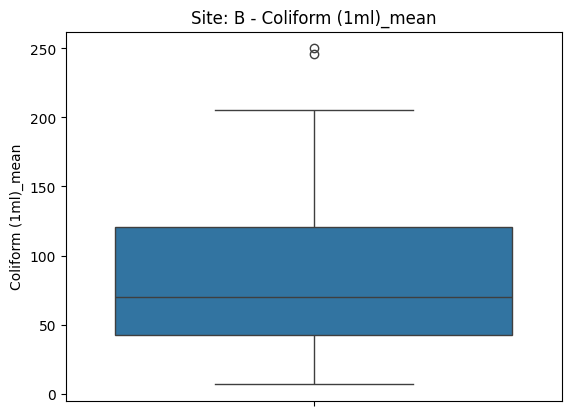

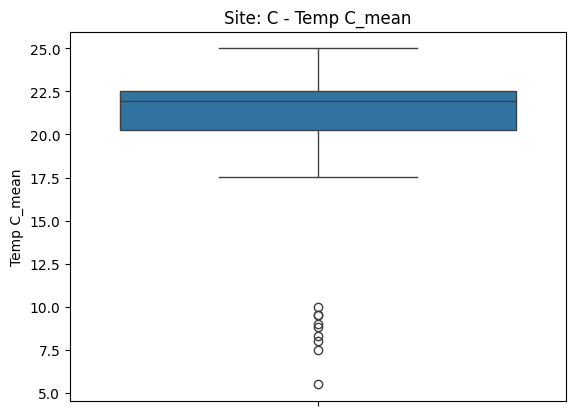

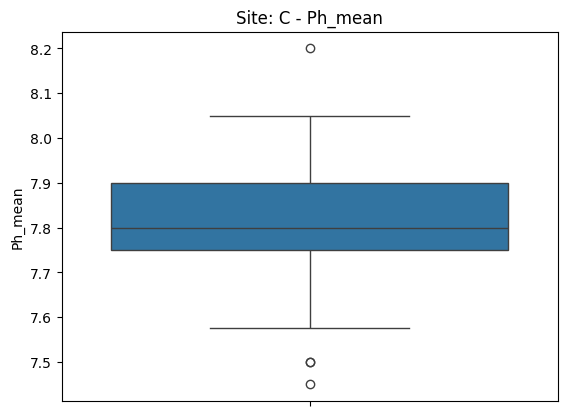

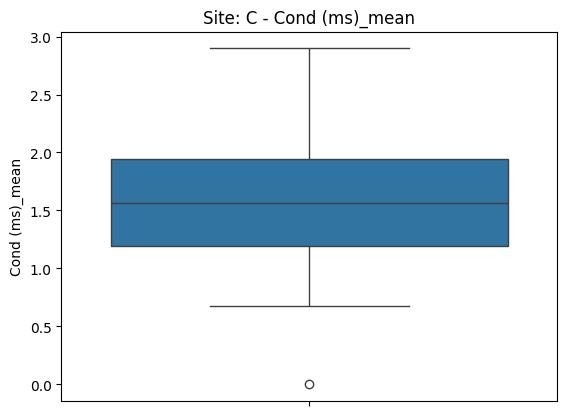

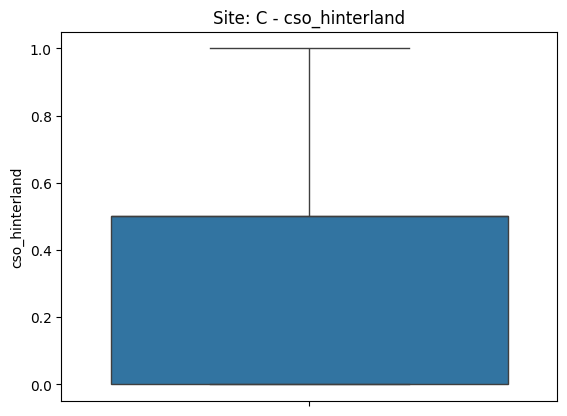

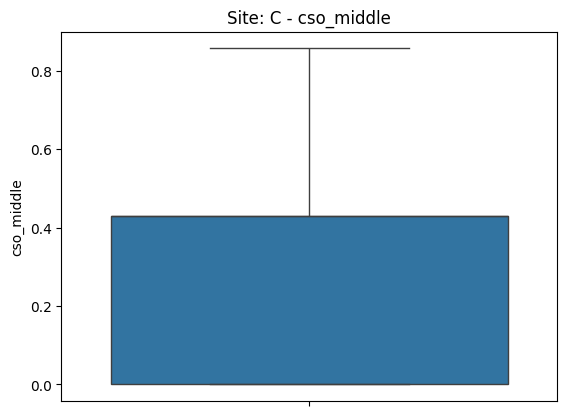

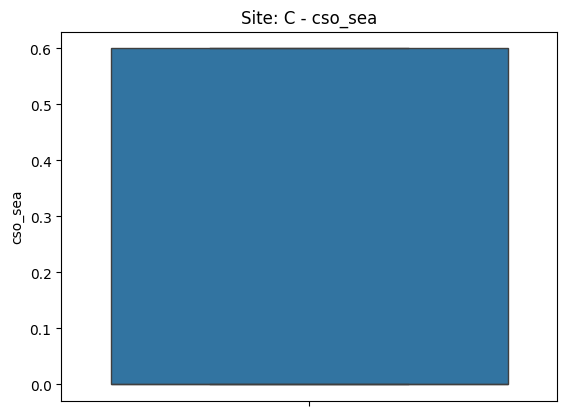

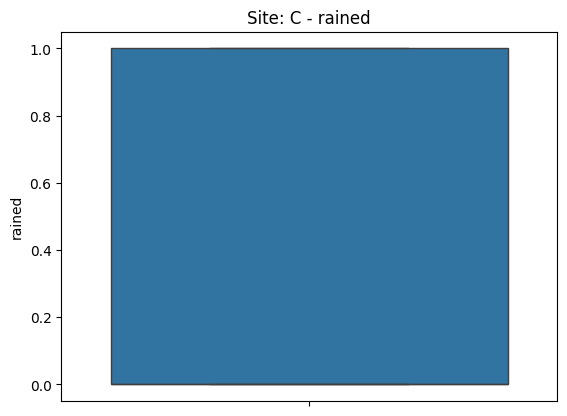

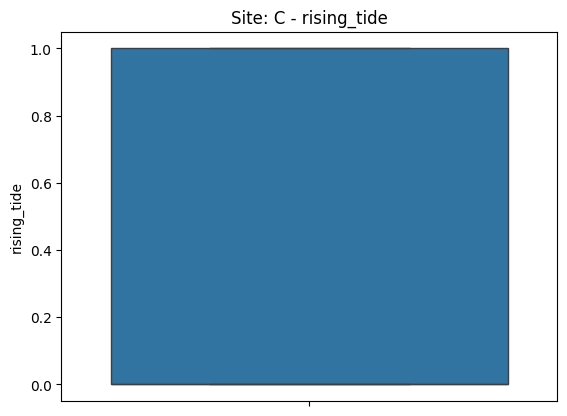

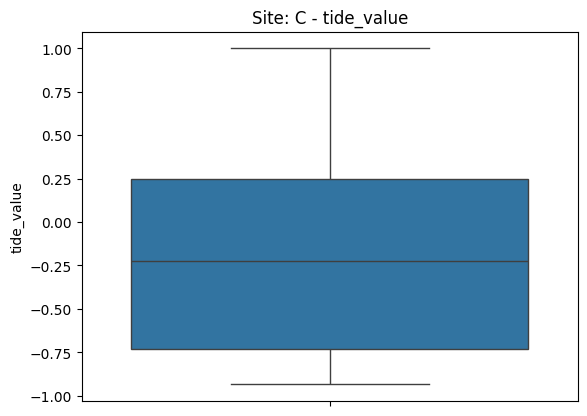

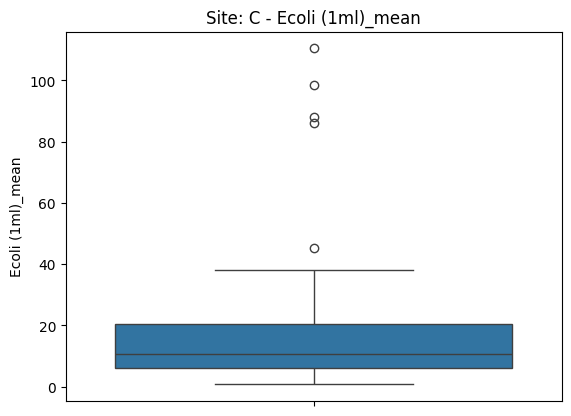

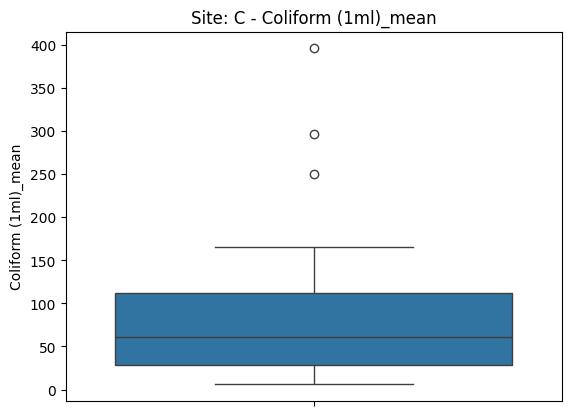

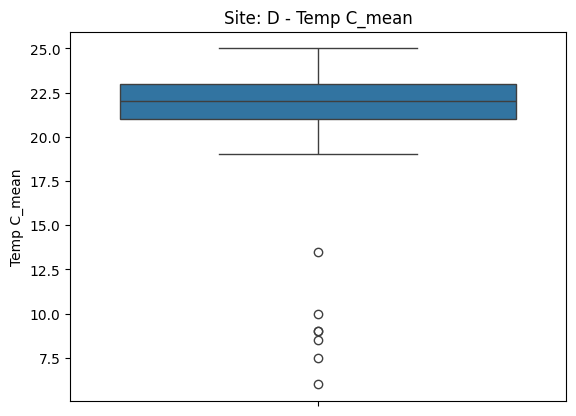

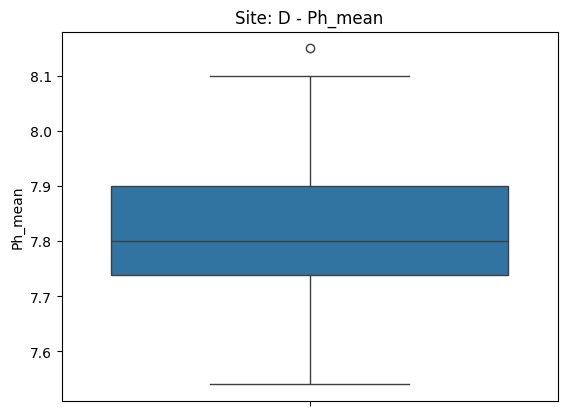

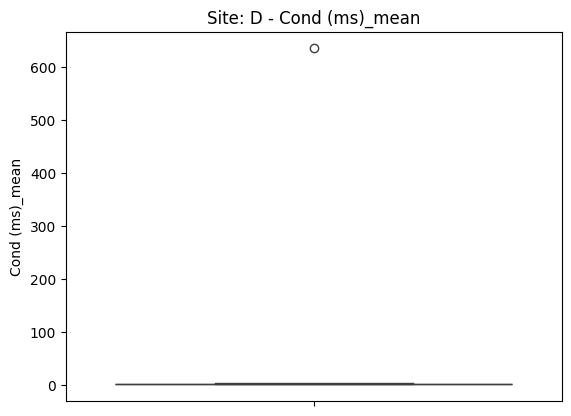

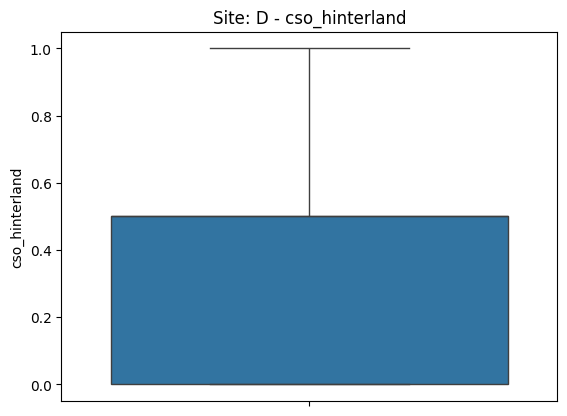

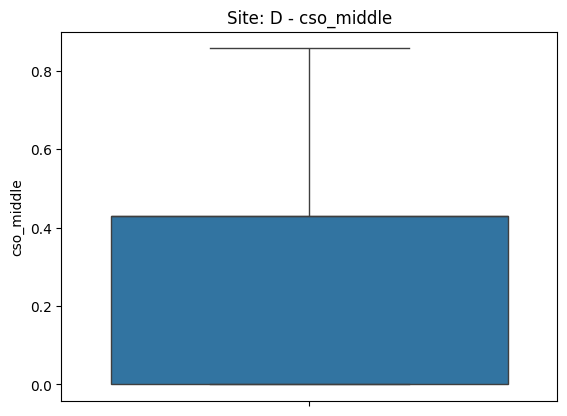

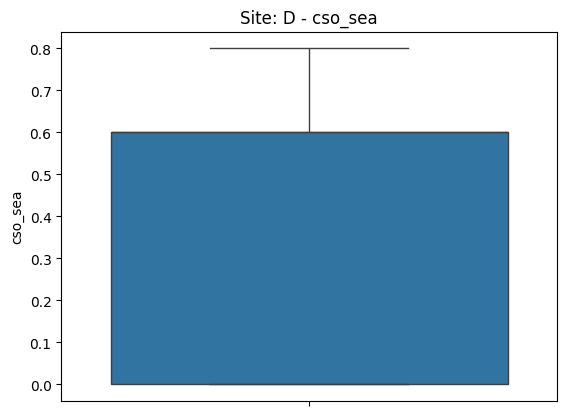

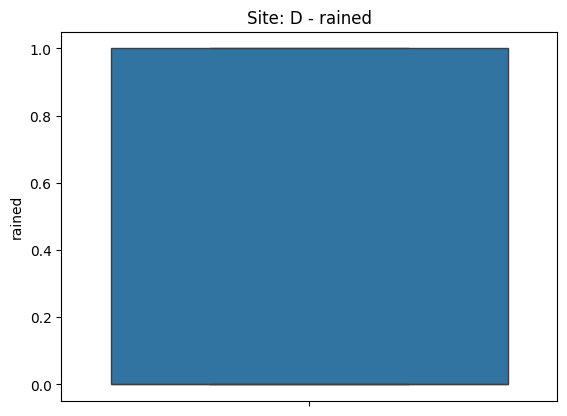

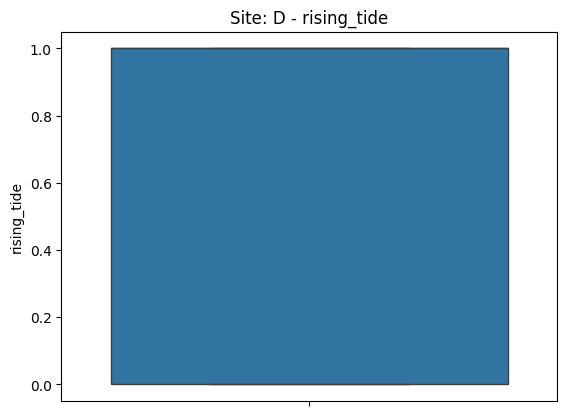

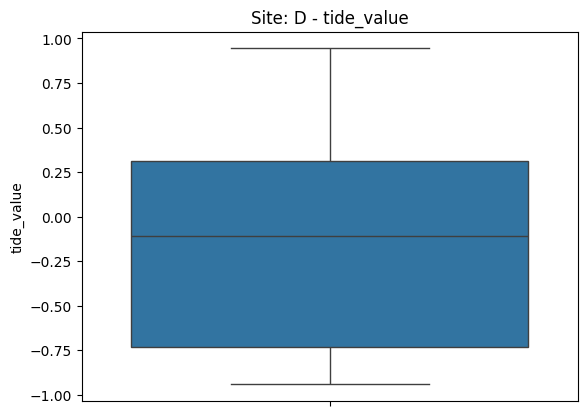

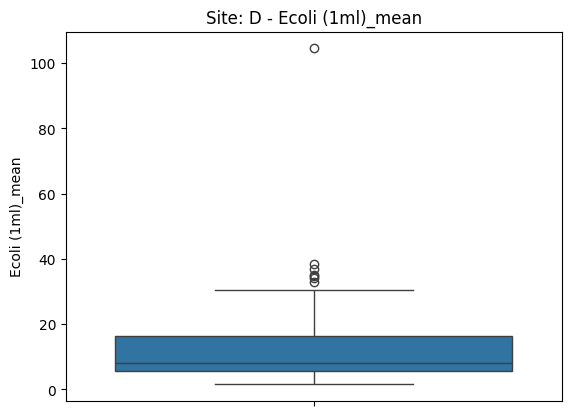

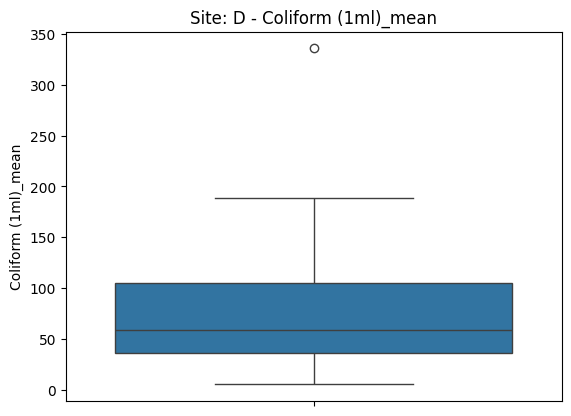

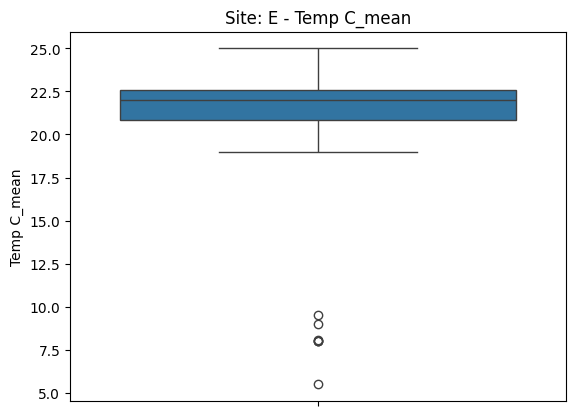

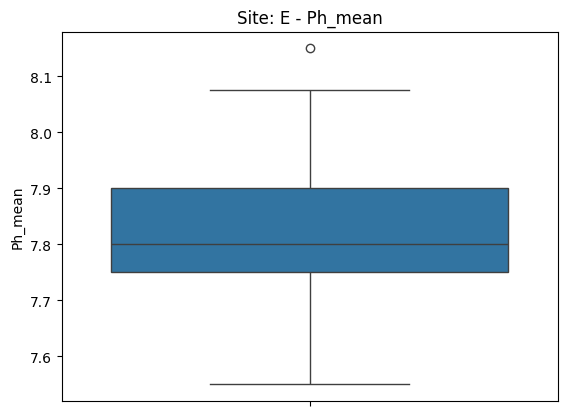

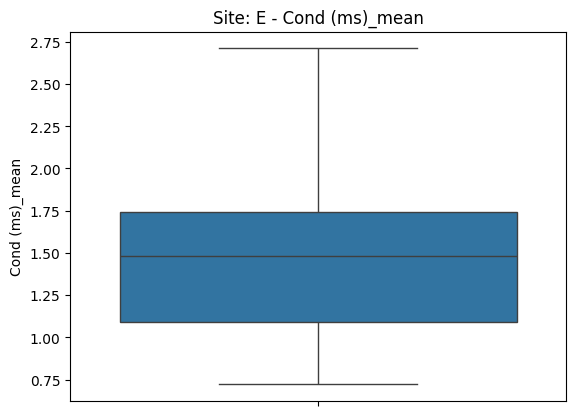

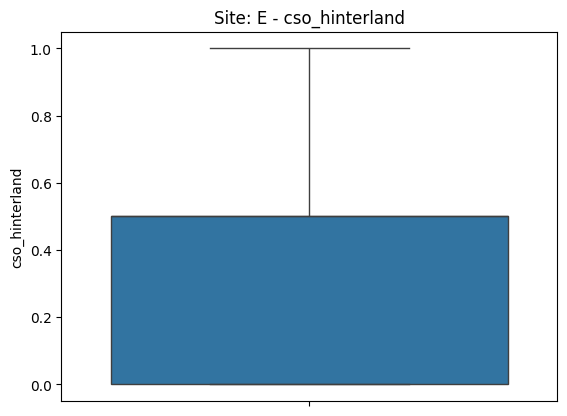

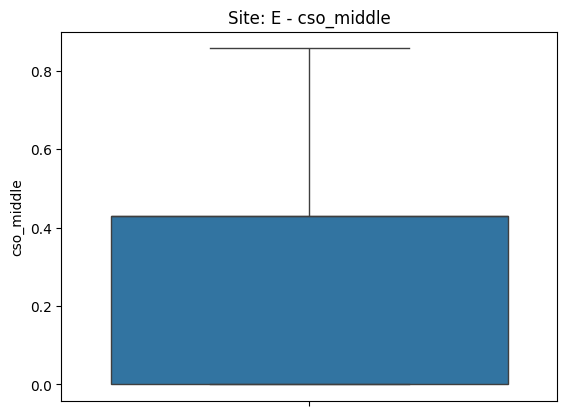

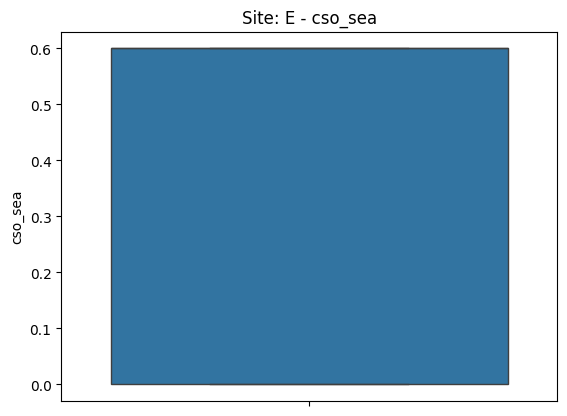

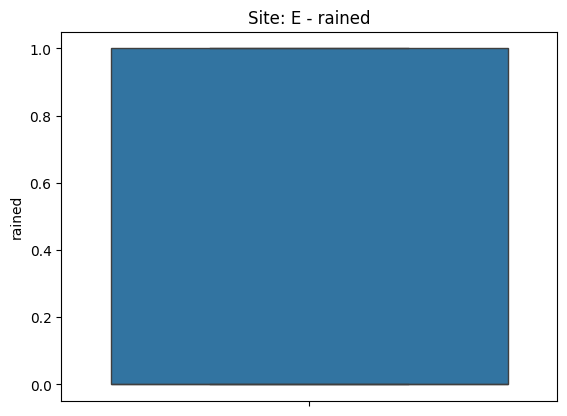

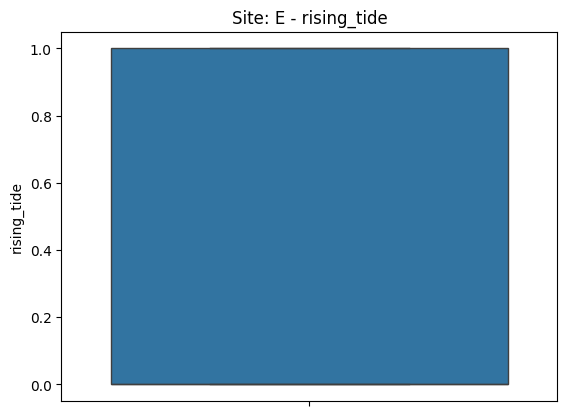

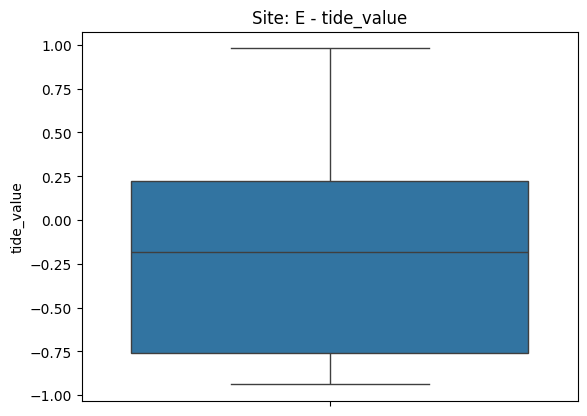

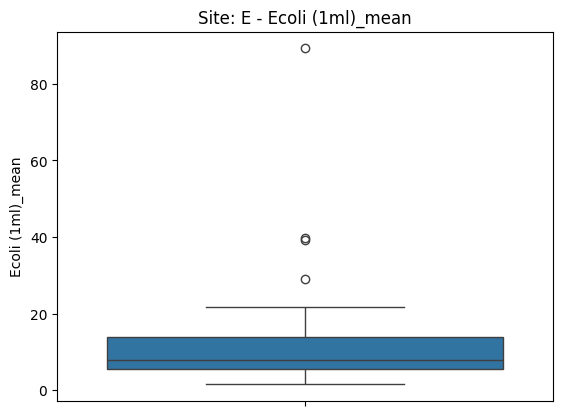

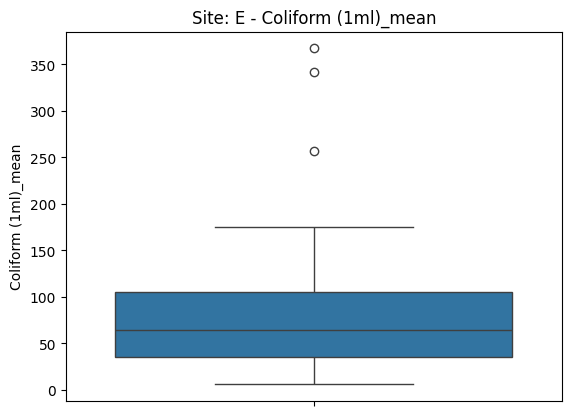

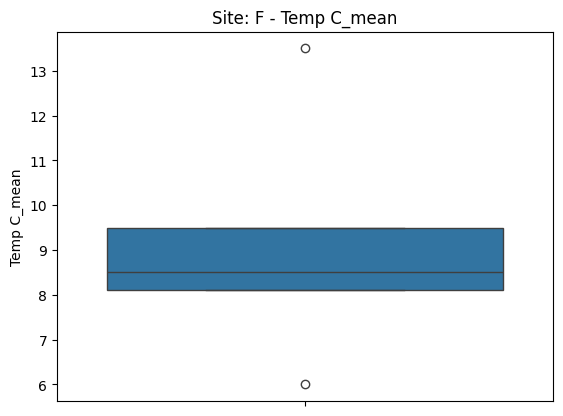

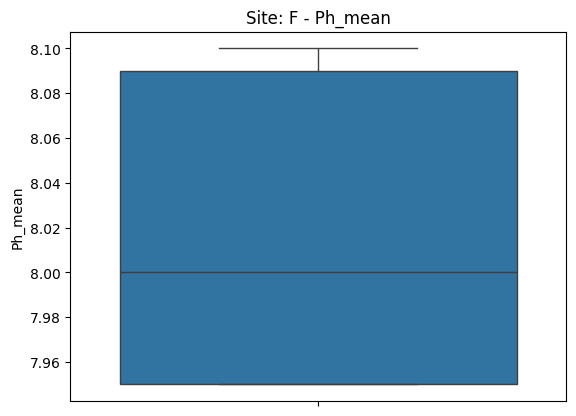

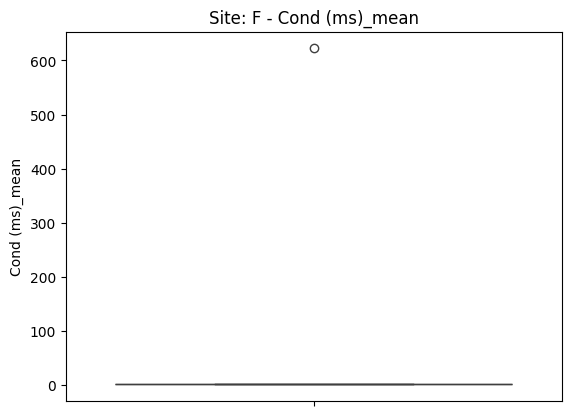

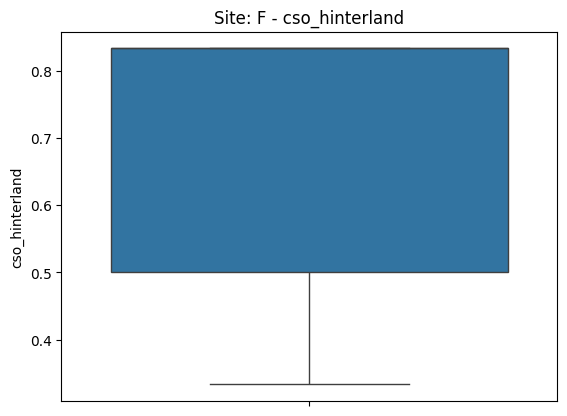

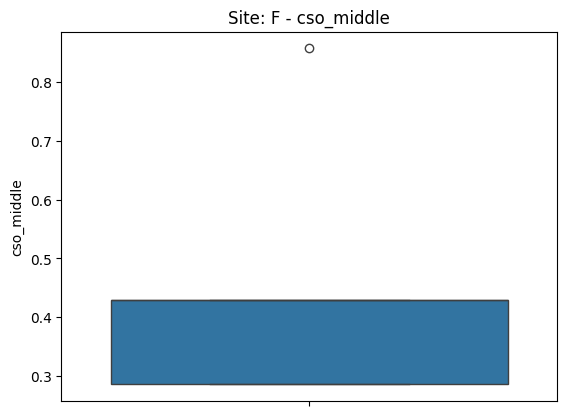

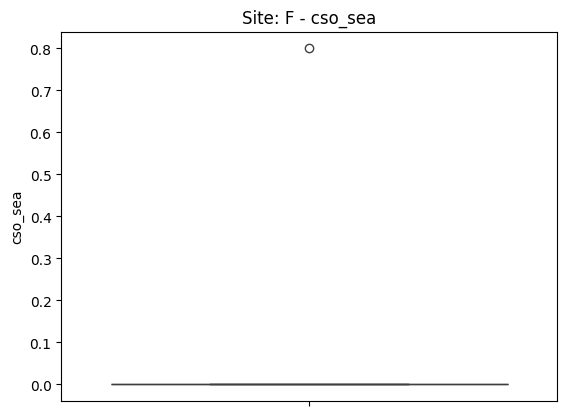

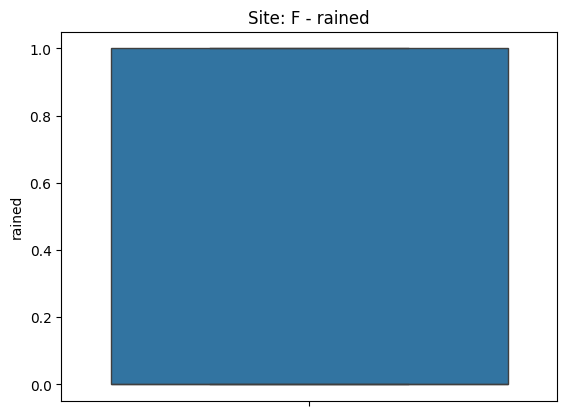

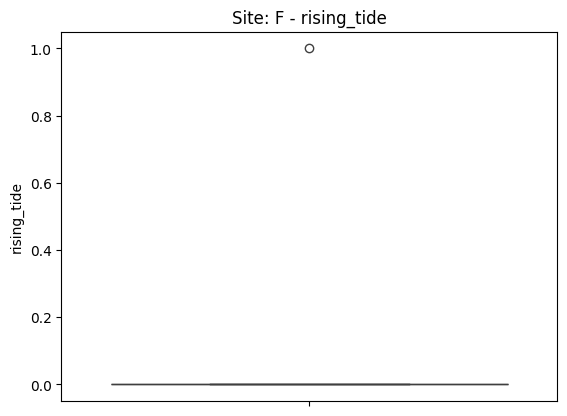

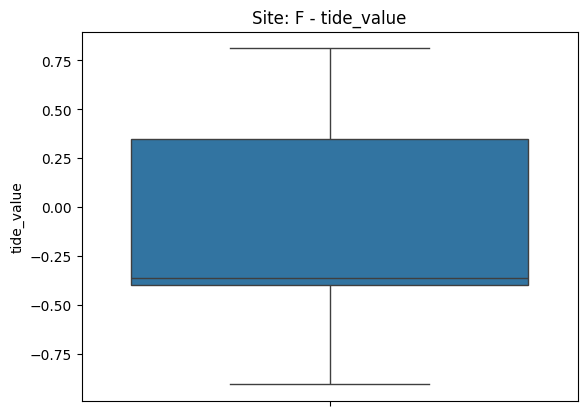

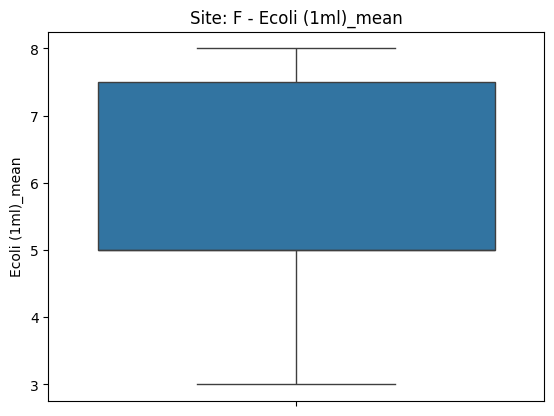

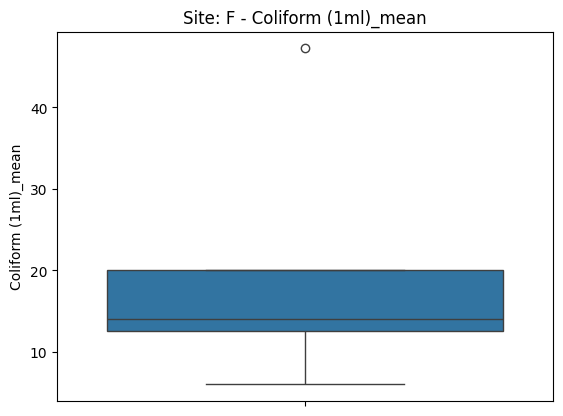

In [54]:
for site in site_dict:
    for col in analyze_columns:
        sns.boxplot(y=site_dict[site][col], orient="v")
        plt.title("Site: " + site + " - " + col)
        plt.show()

## Timeseries

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


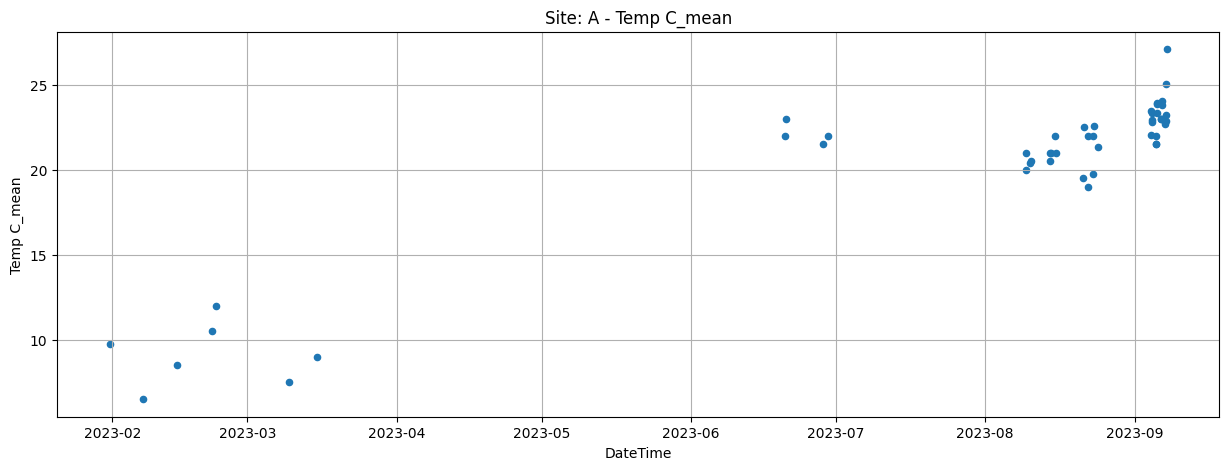

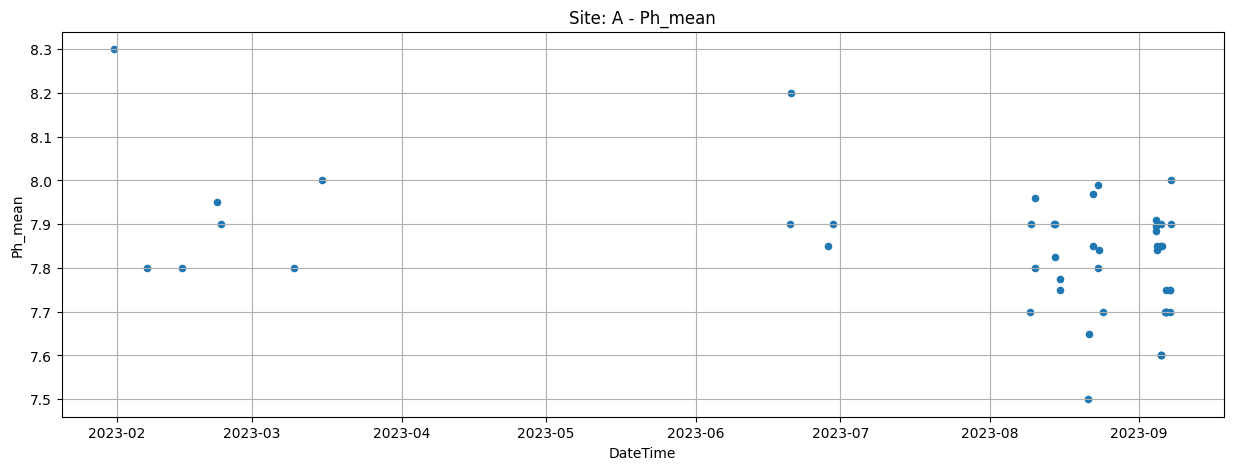

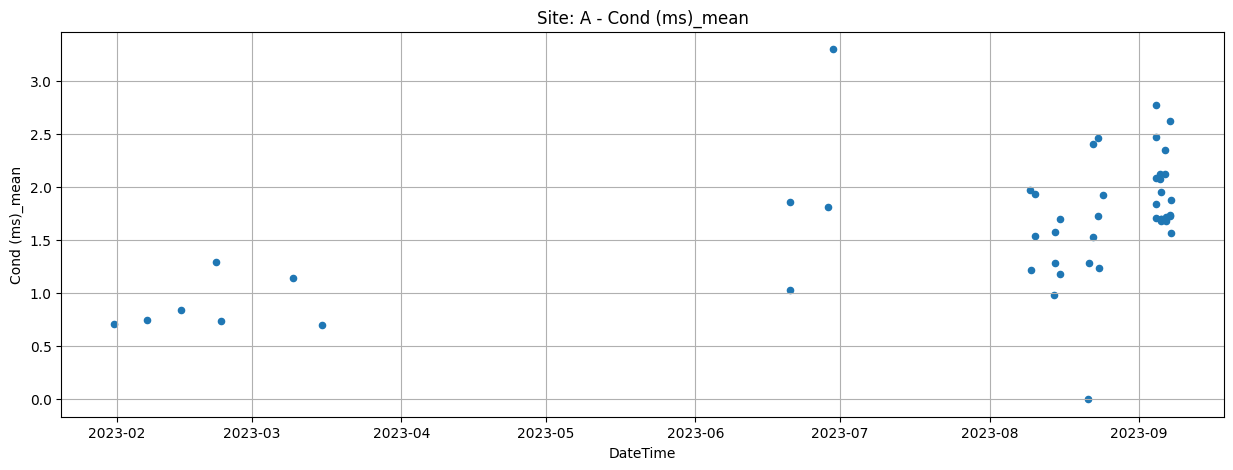

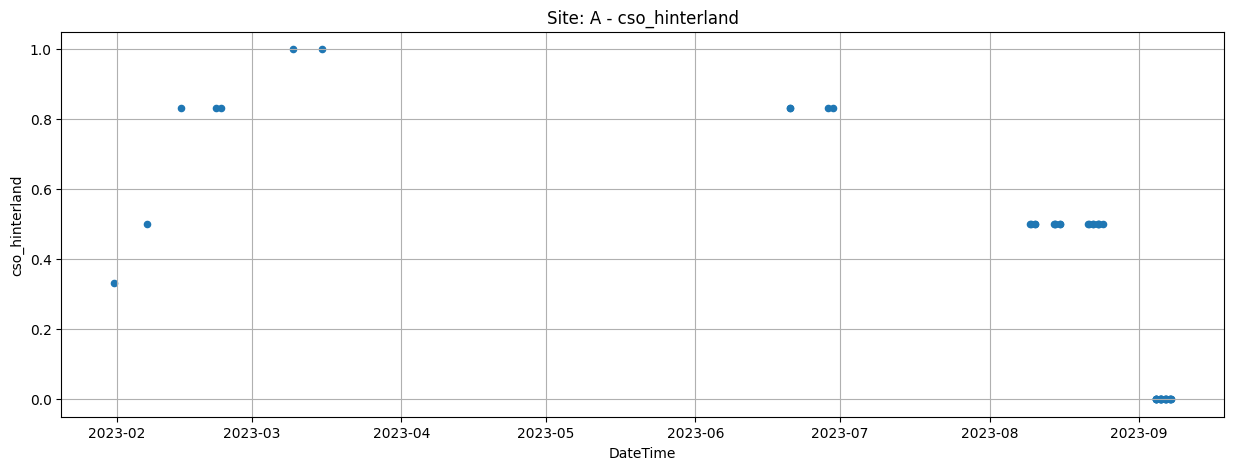

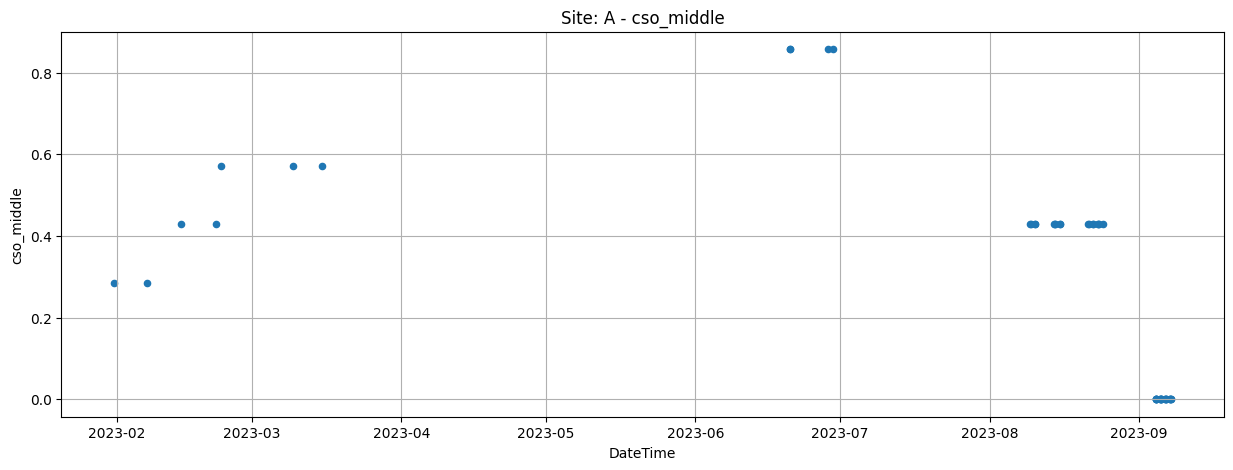

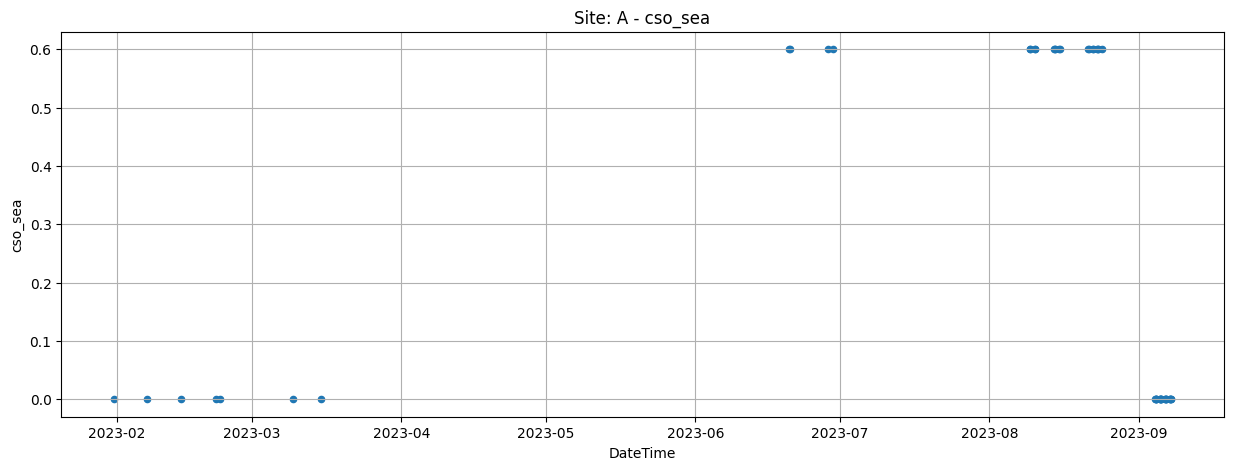

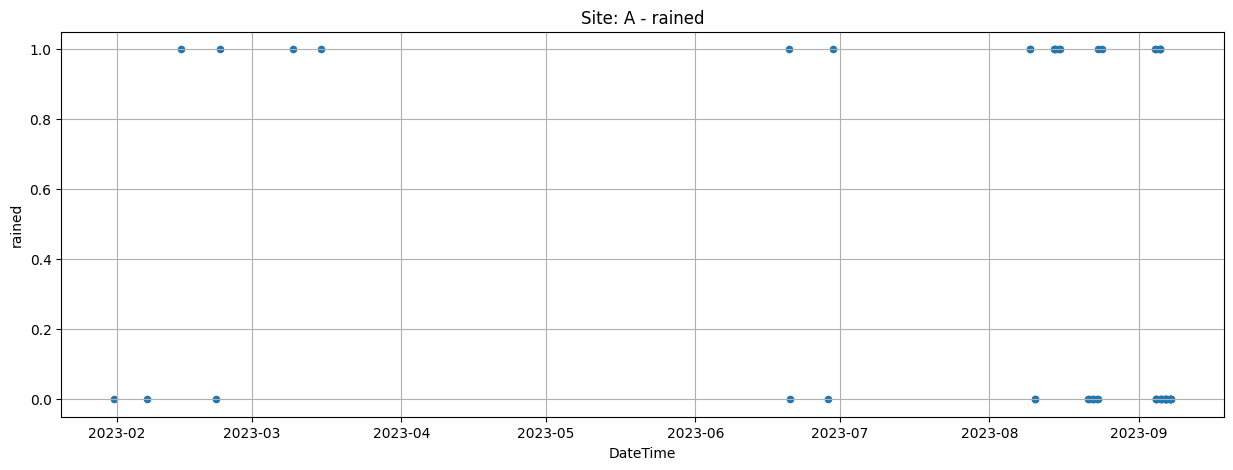

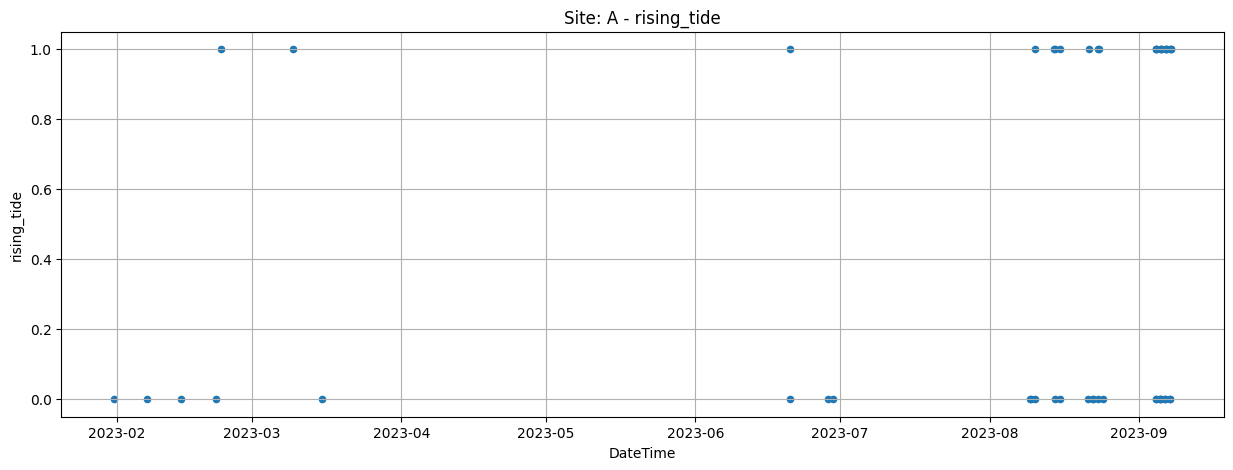

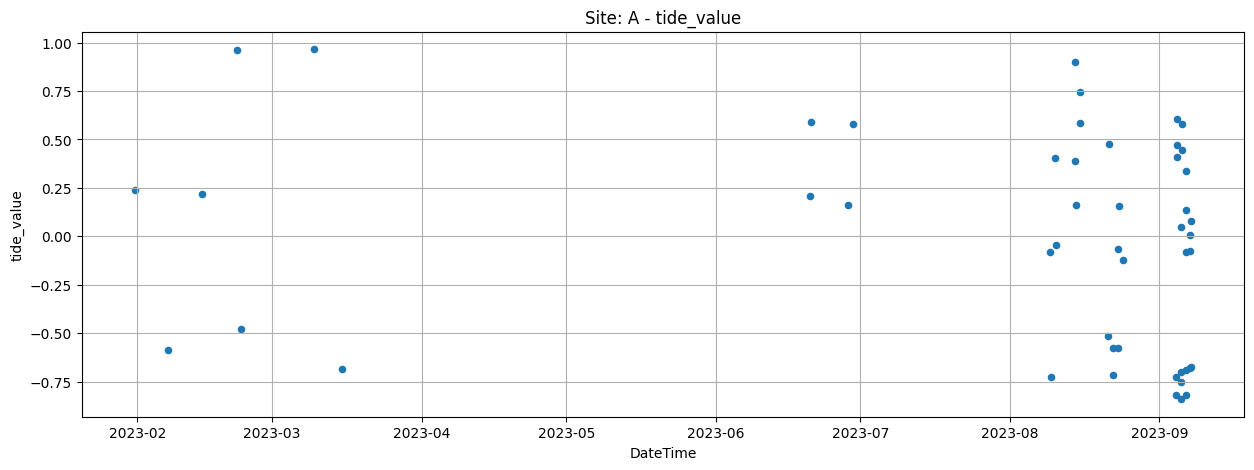

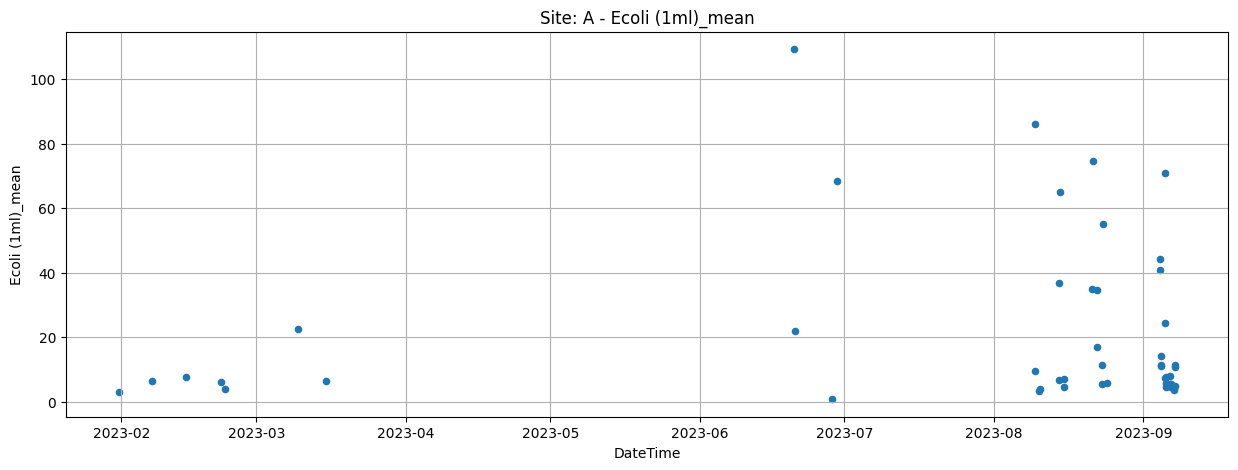

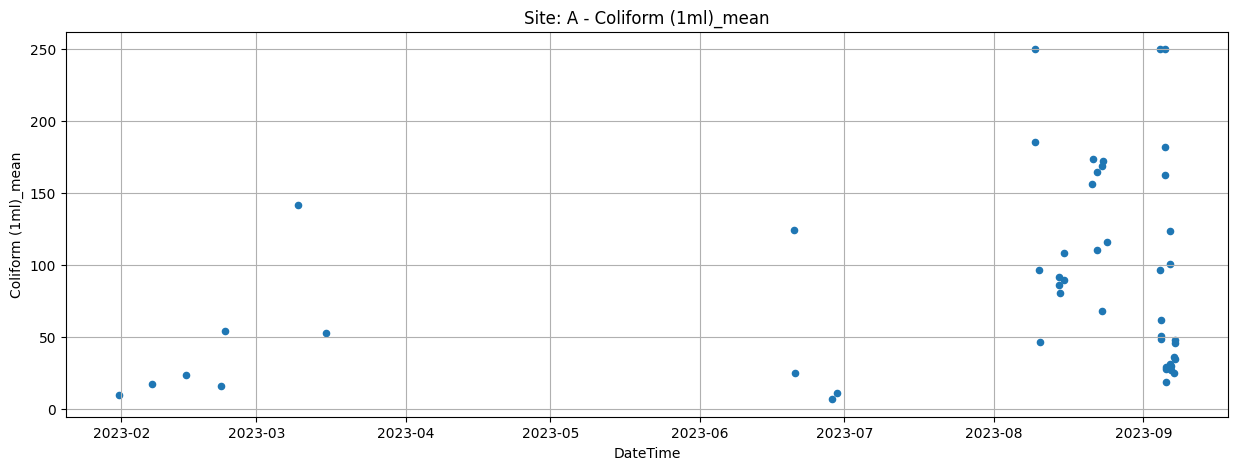

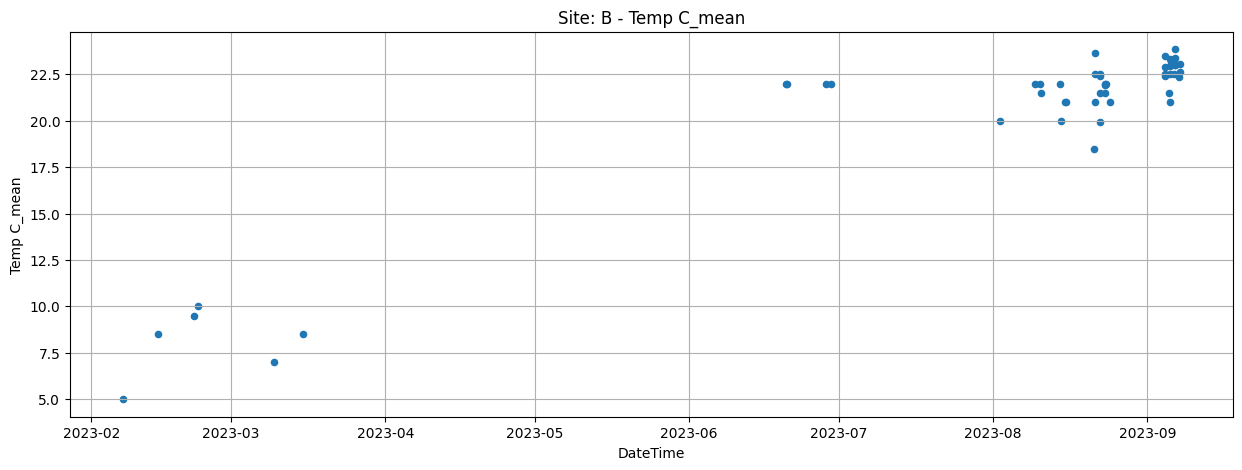

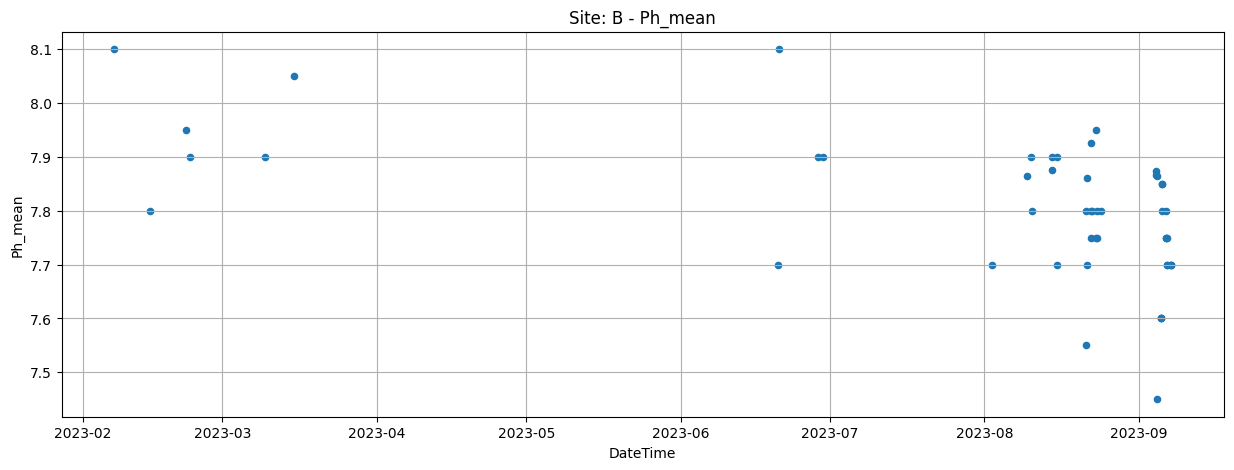

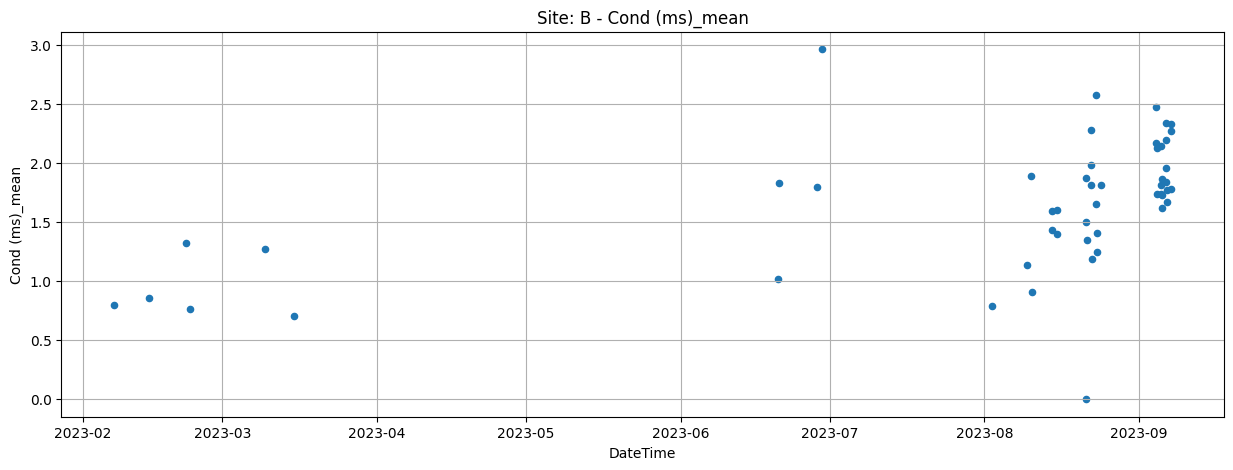

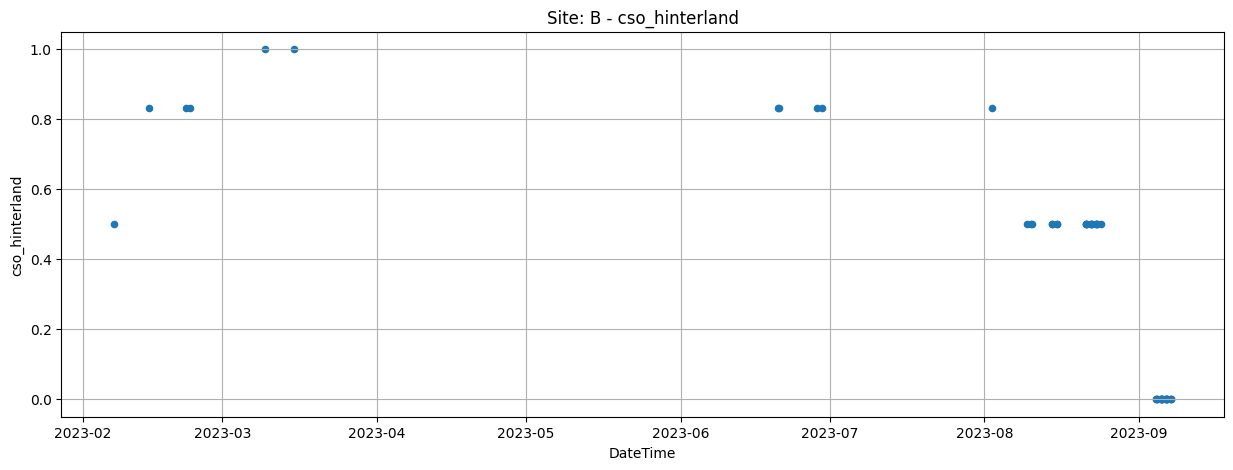

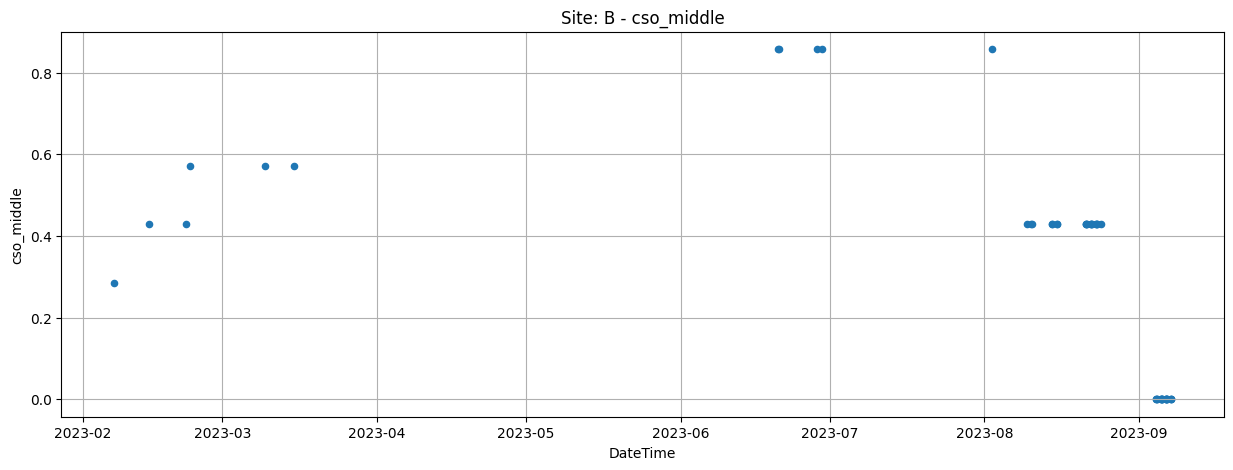

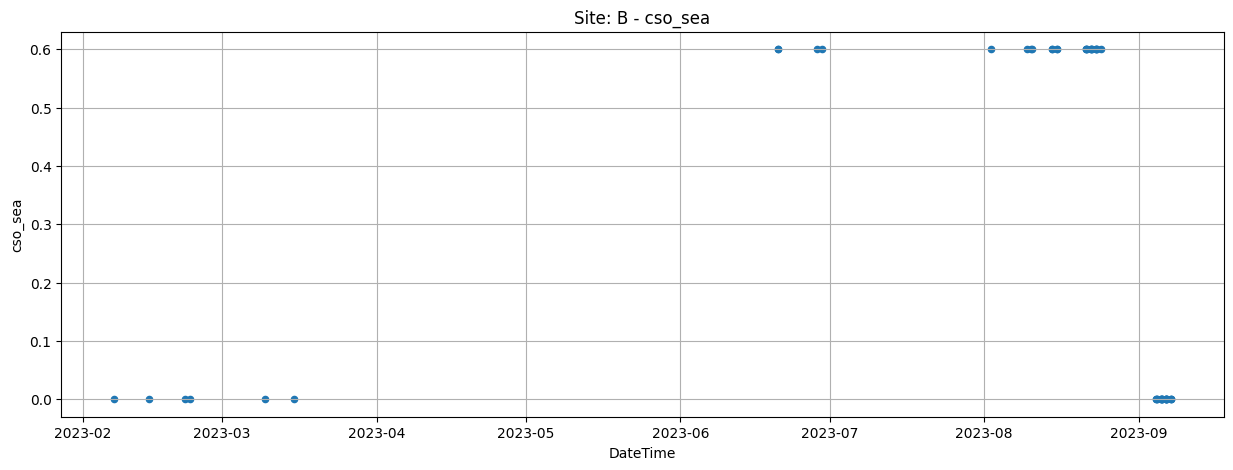

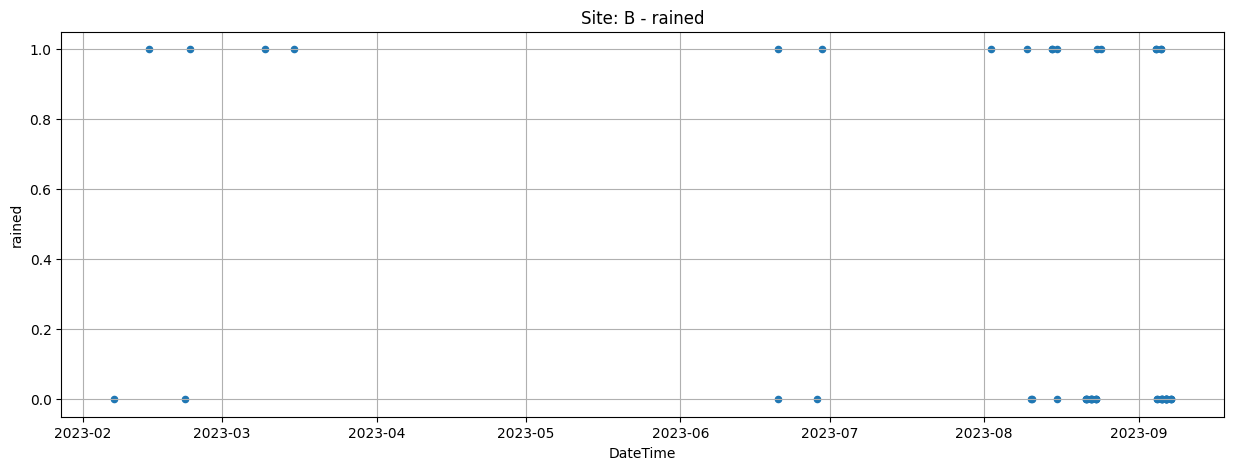

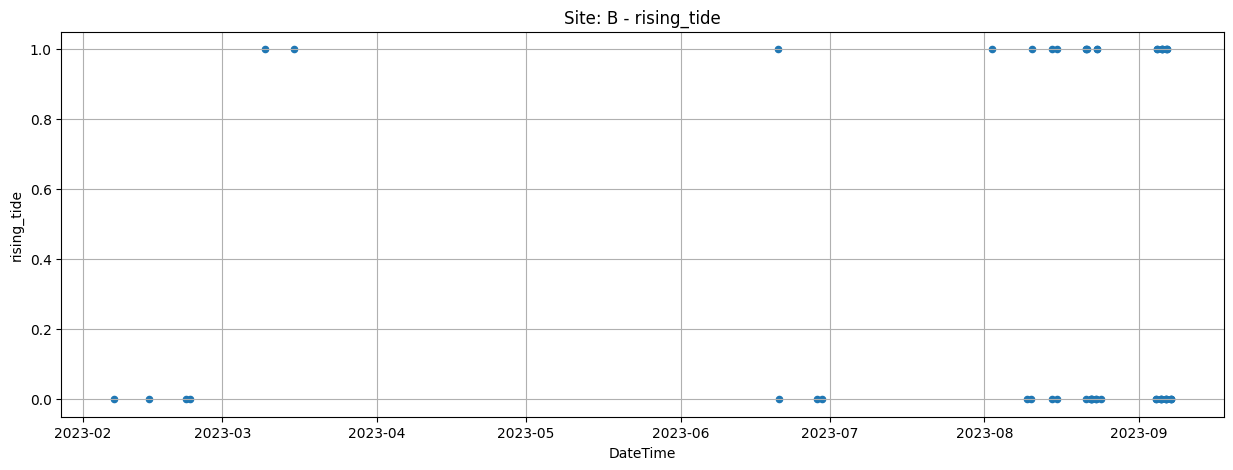

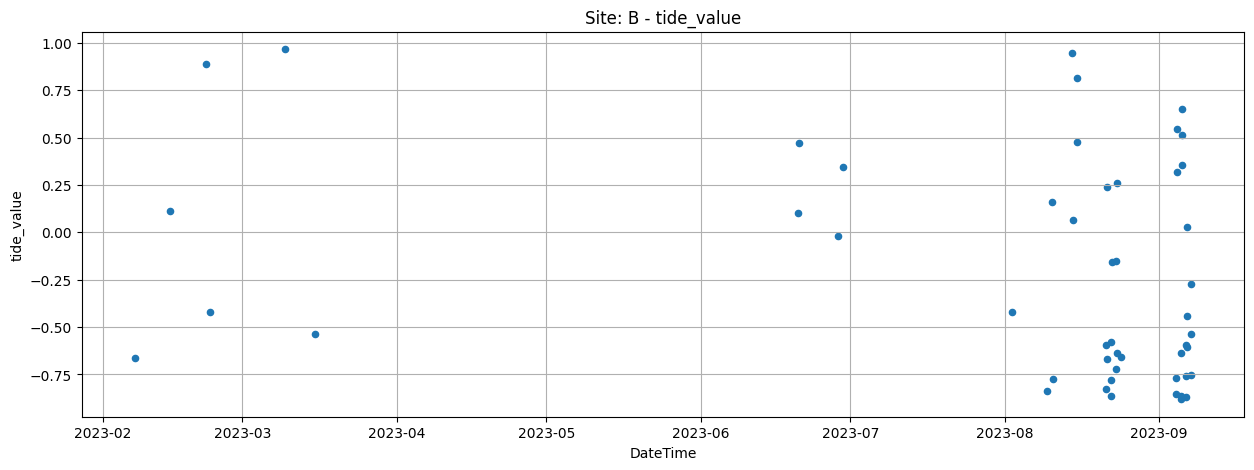

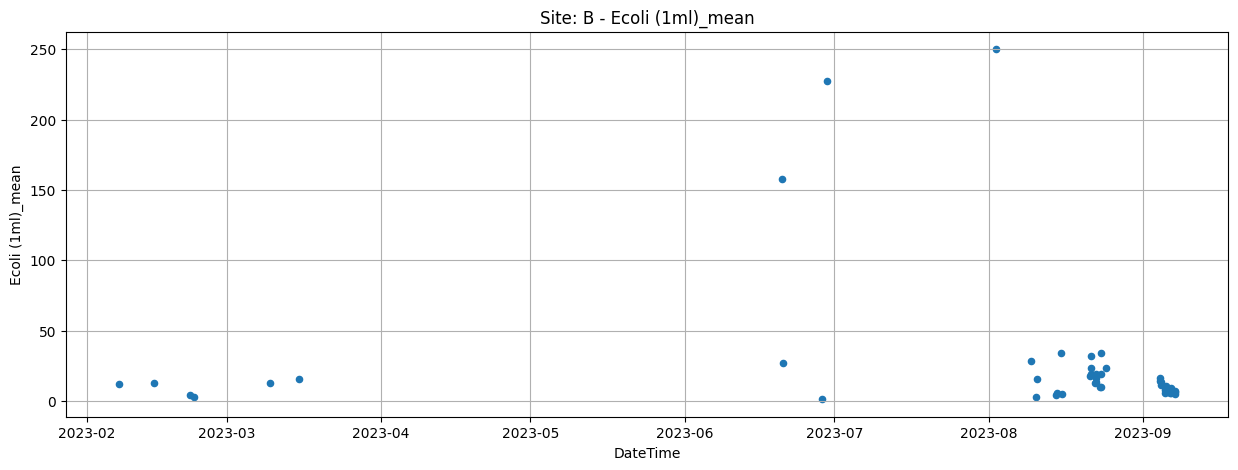

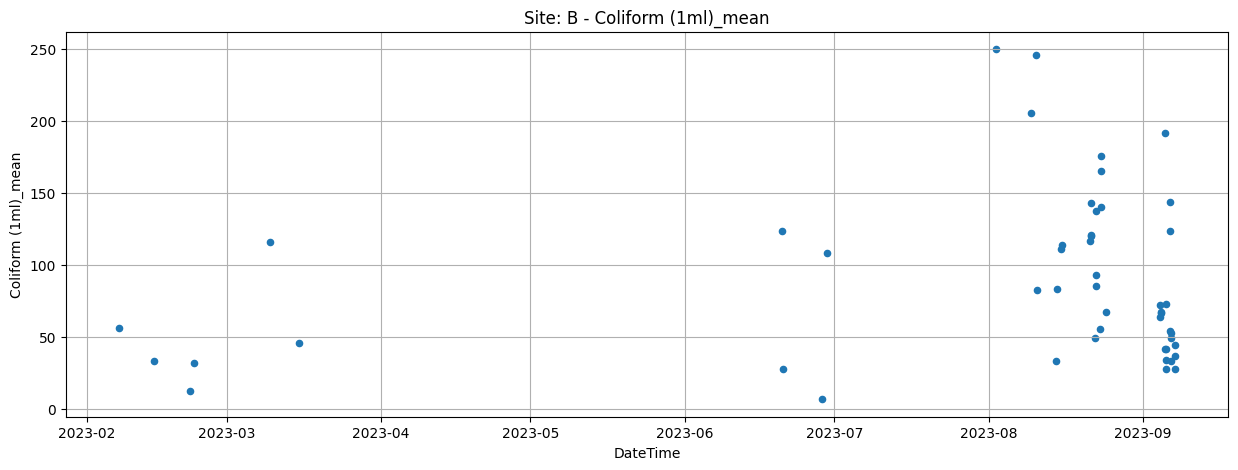

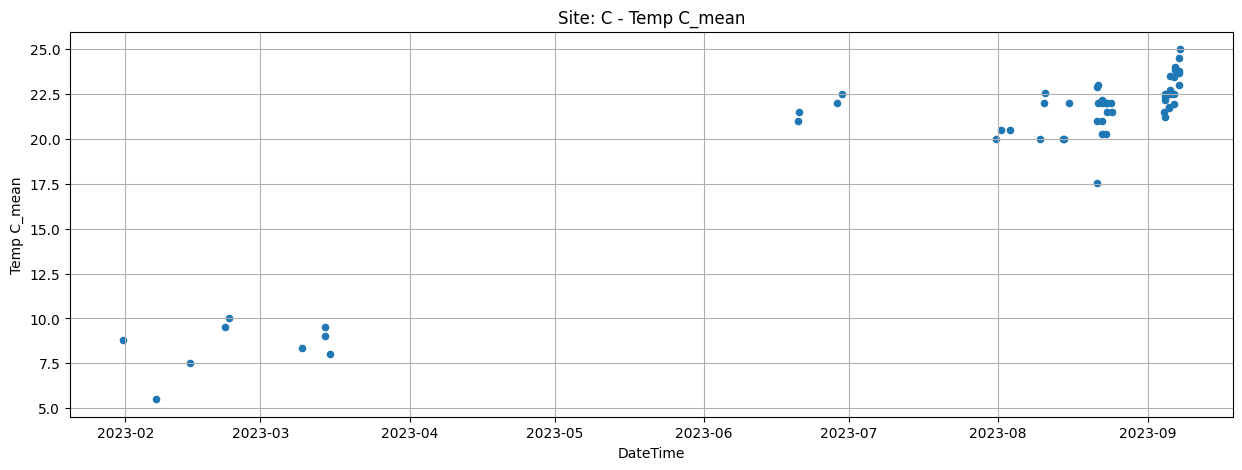

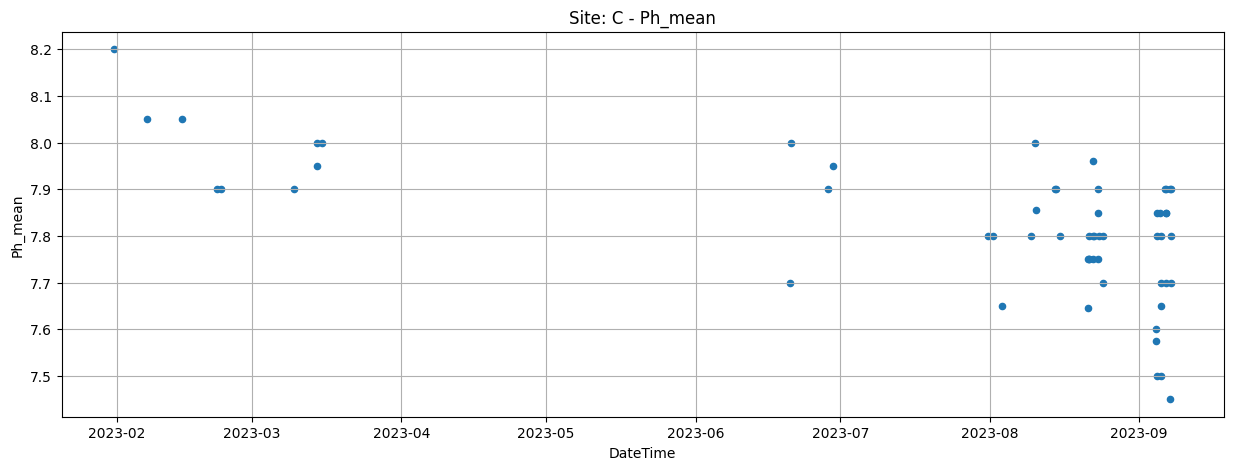

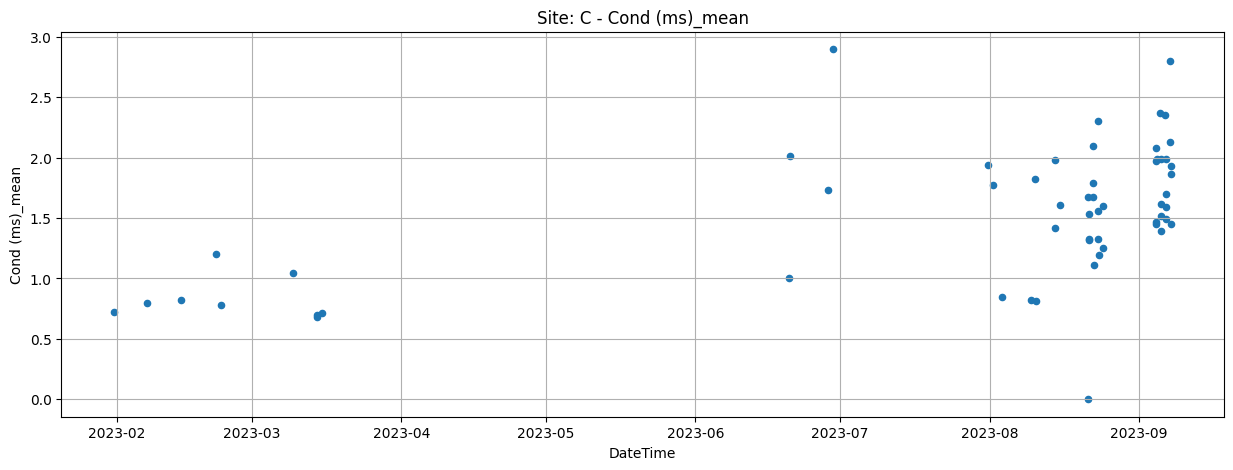

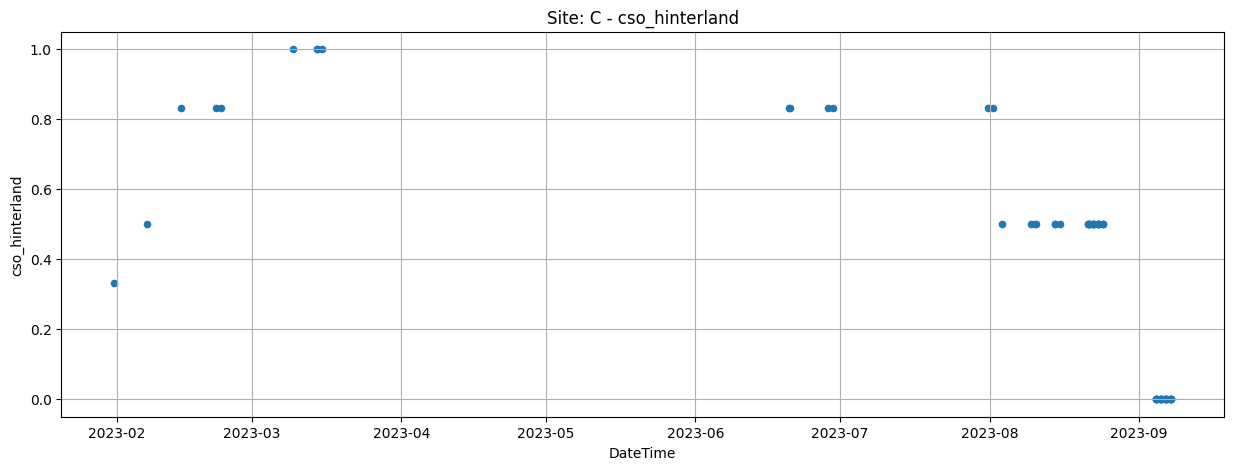

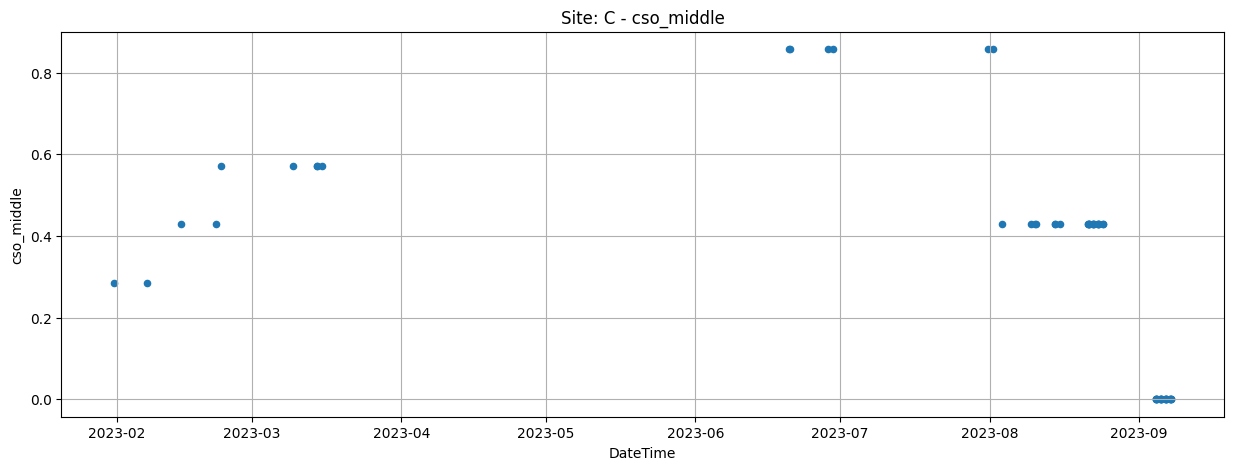

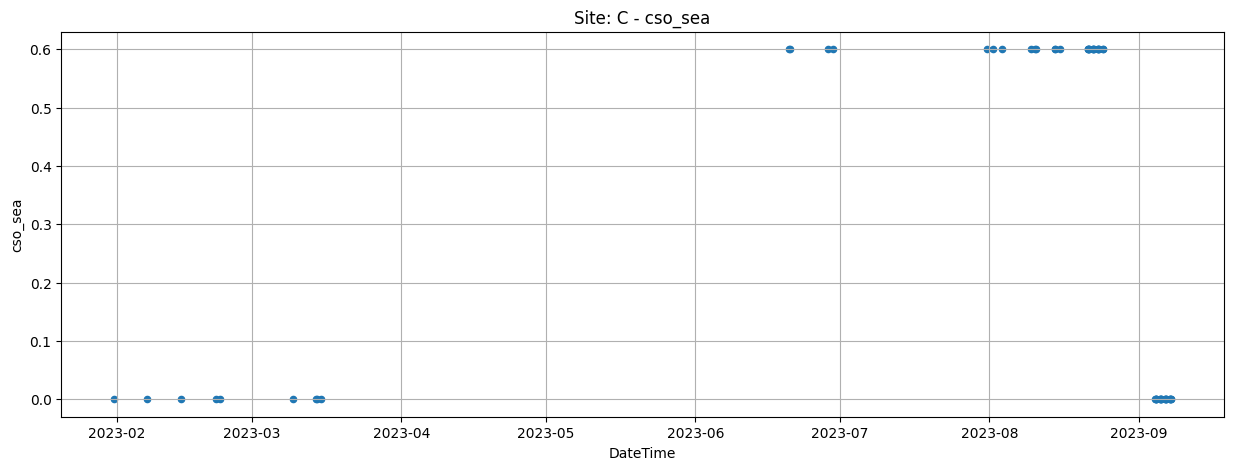

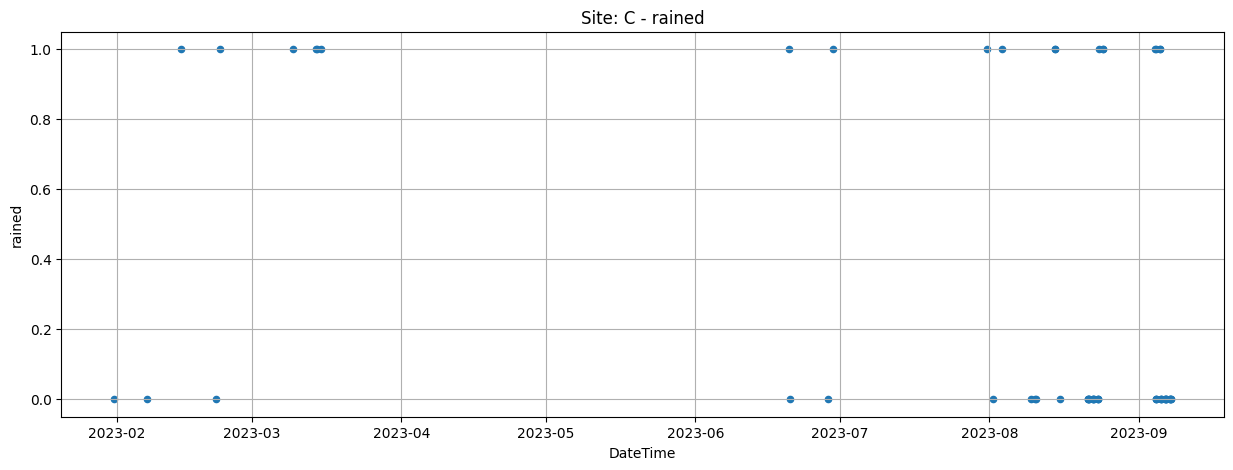

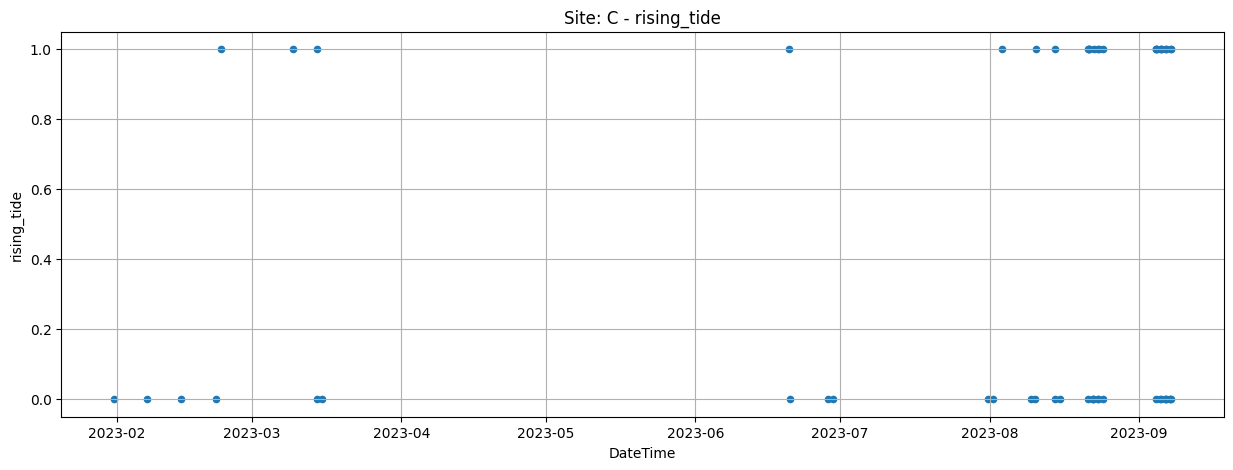

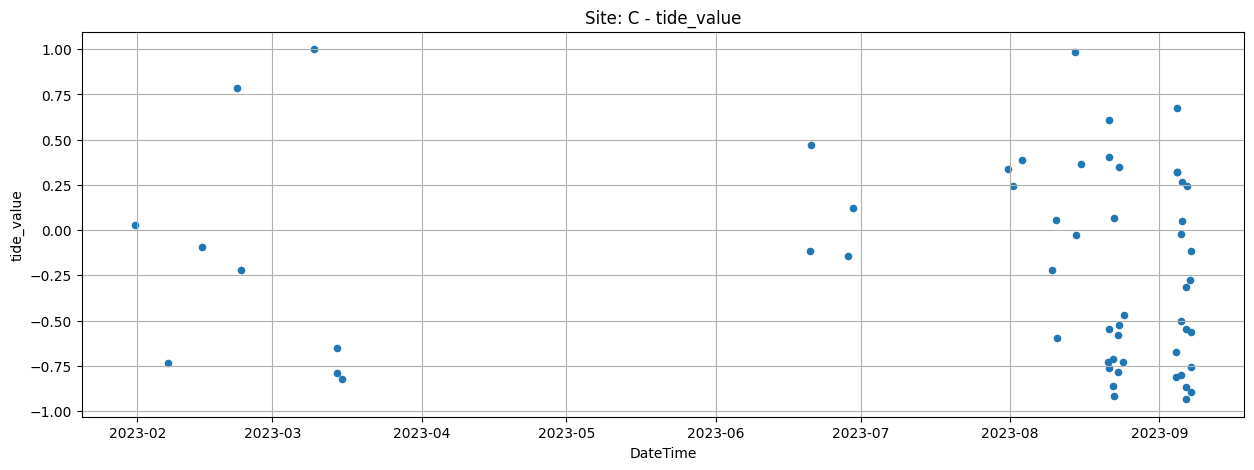

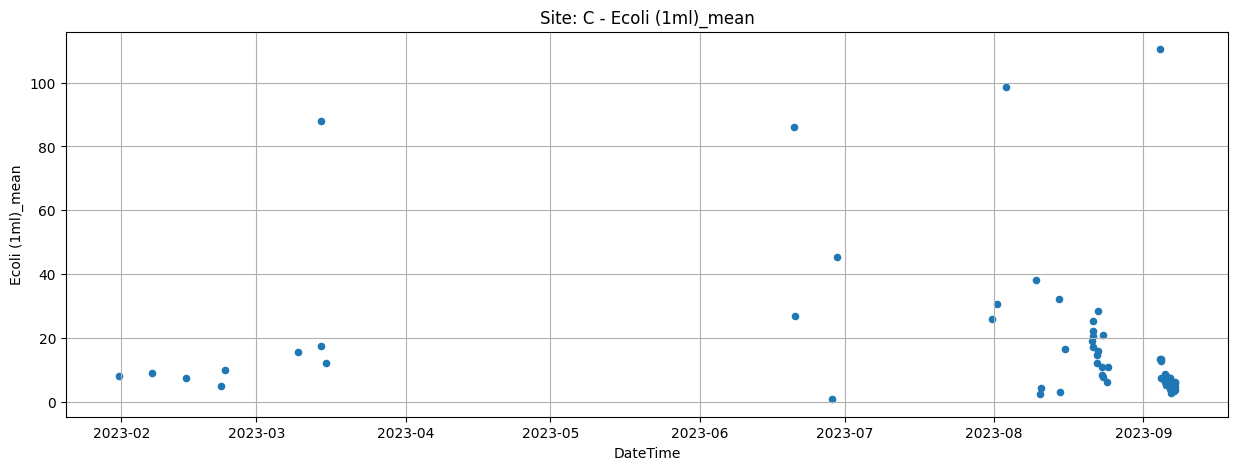

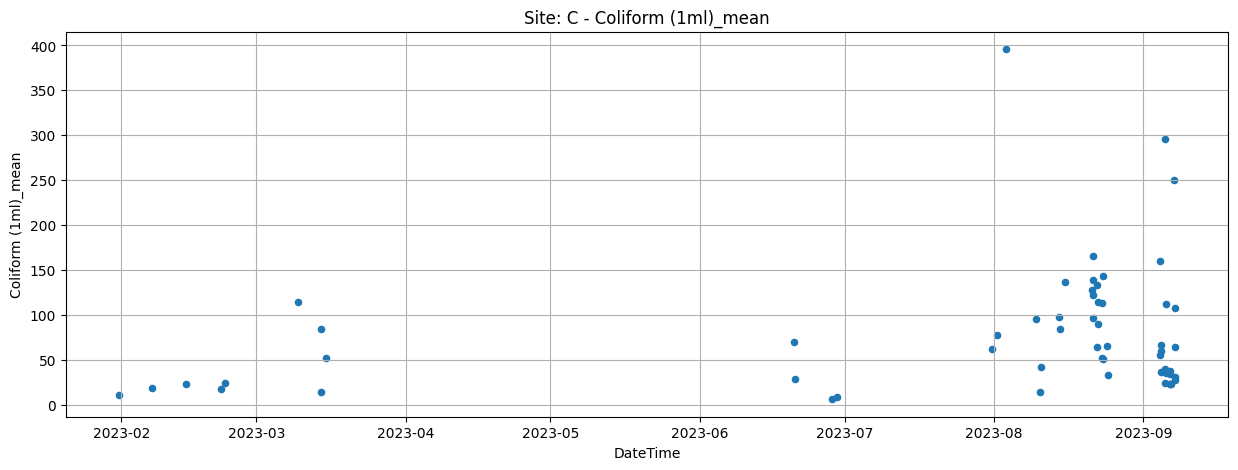

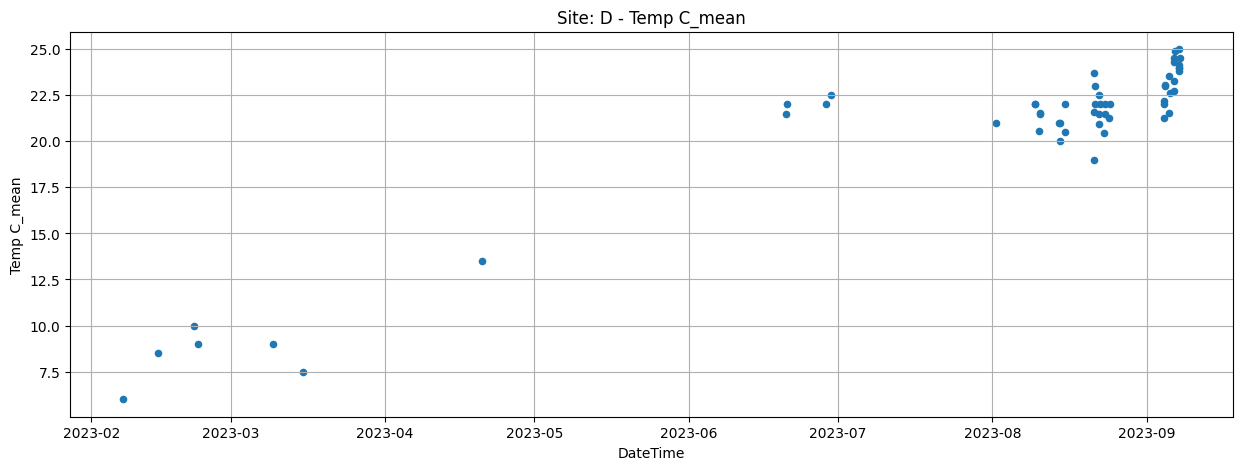

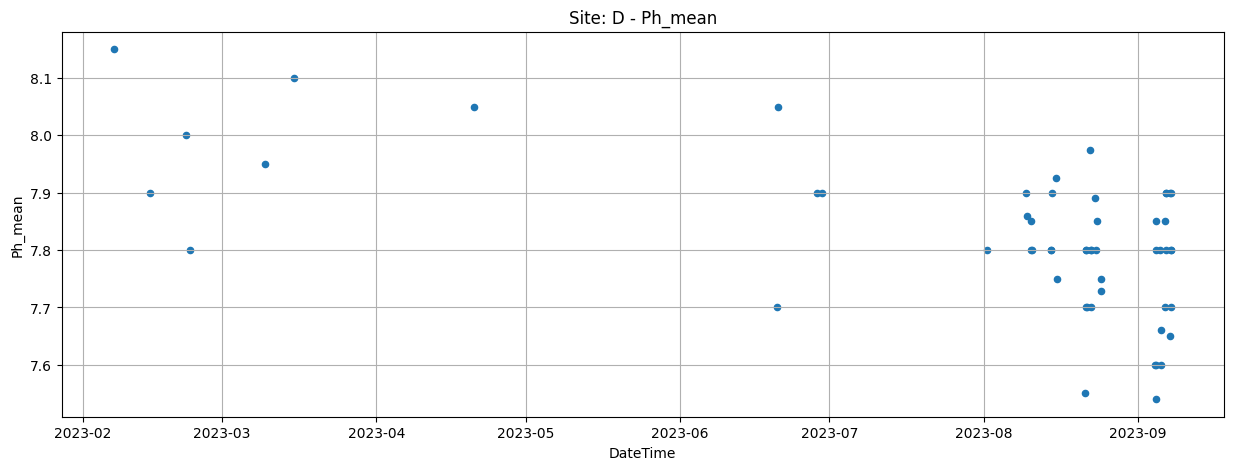

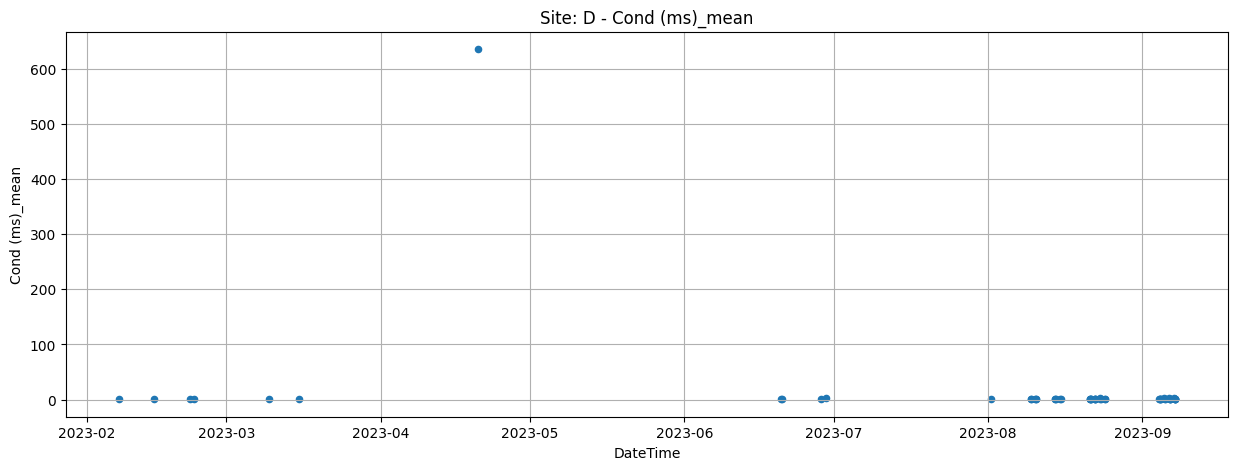

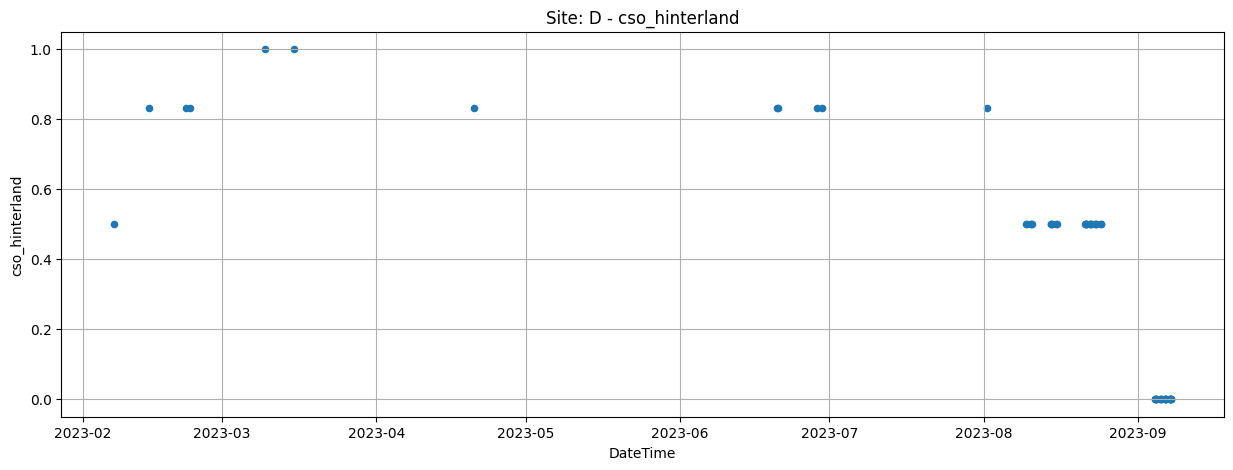

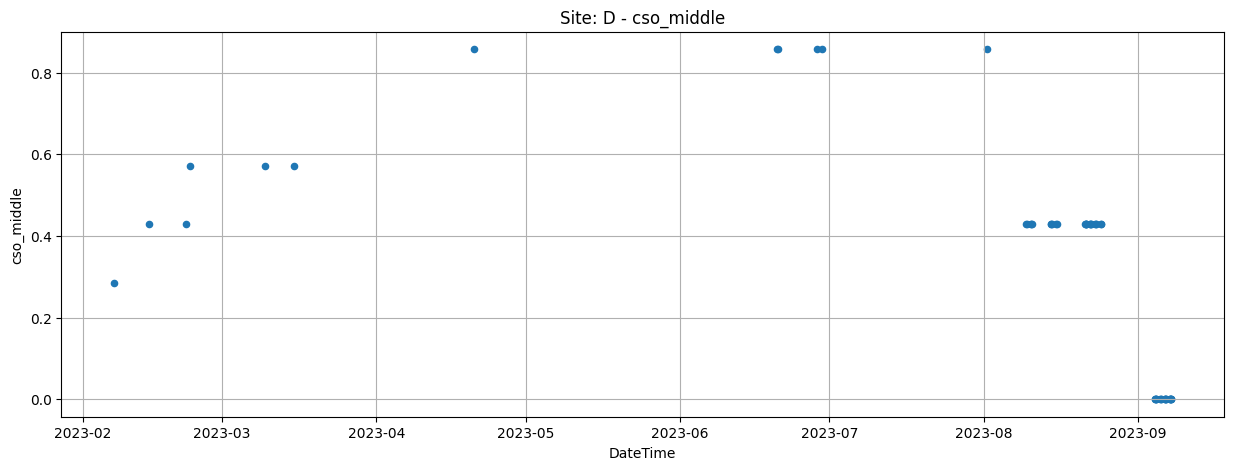

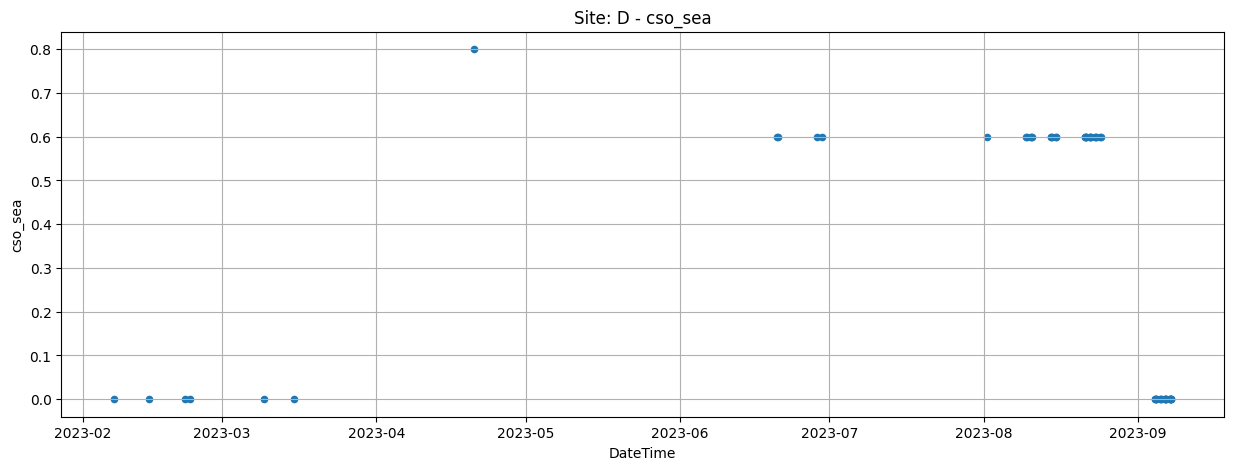

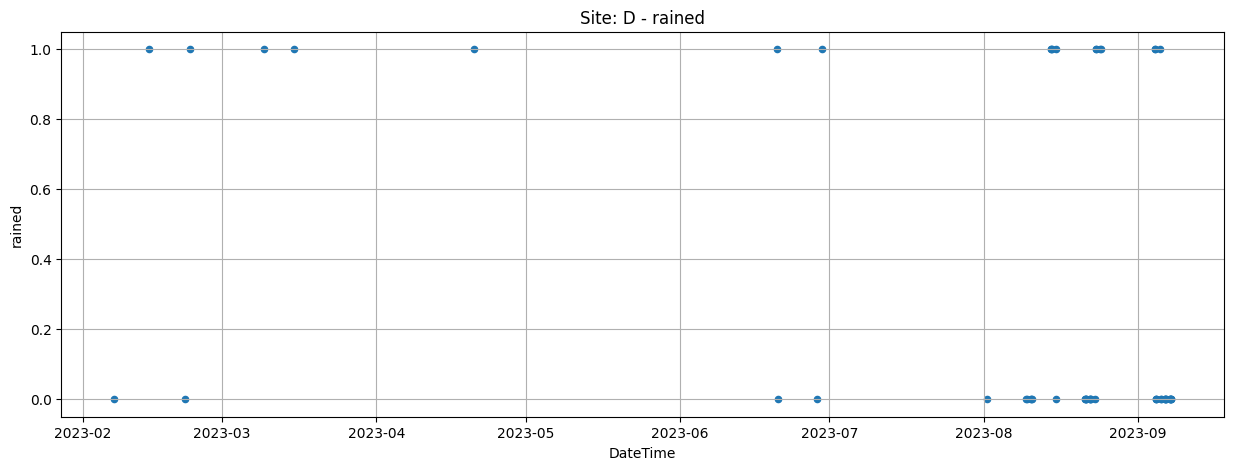

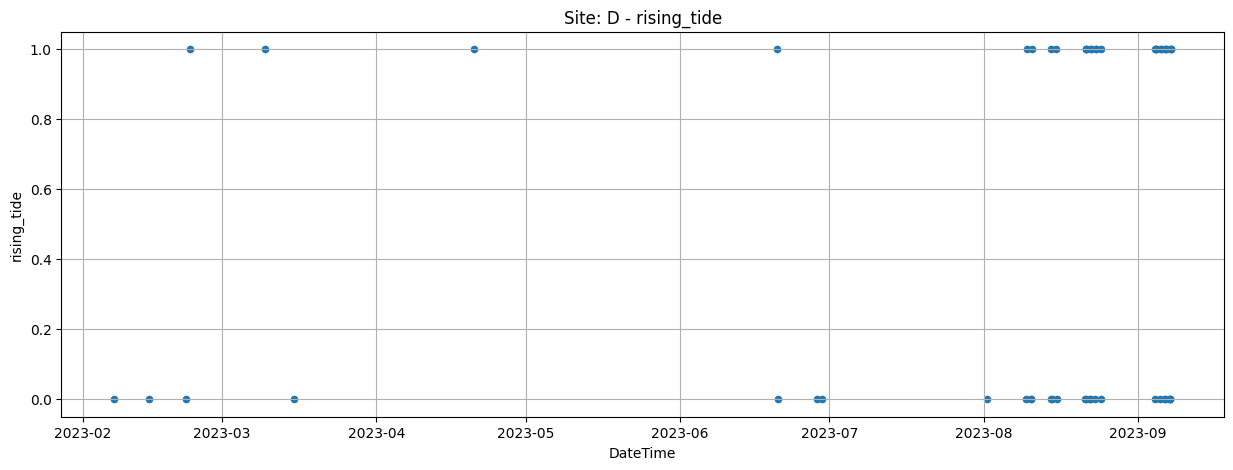

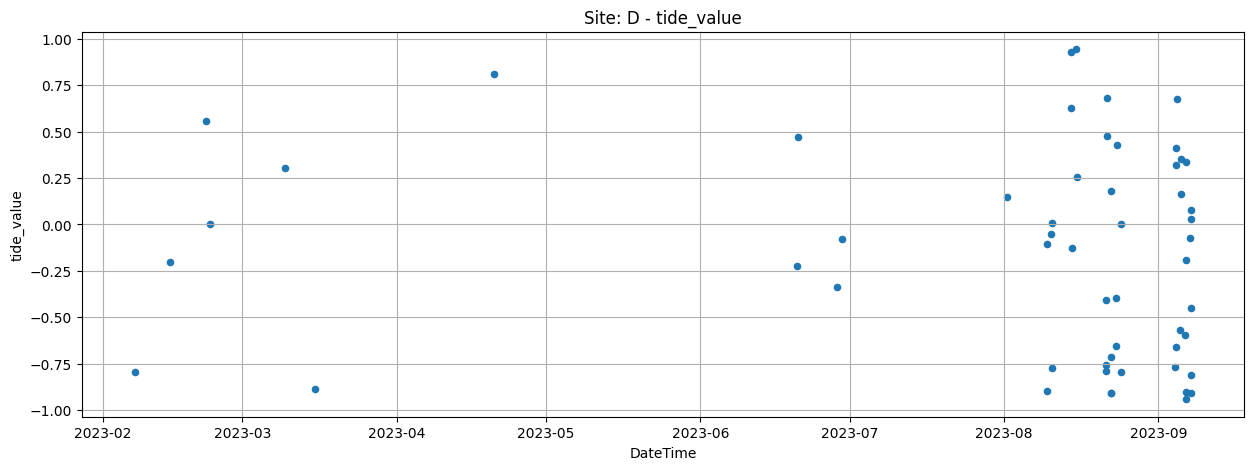

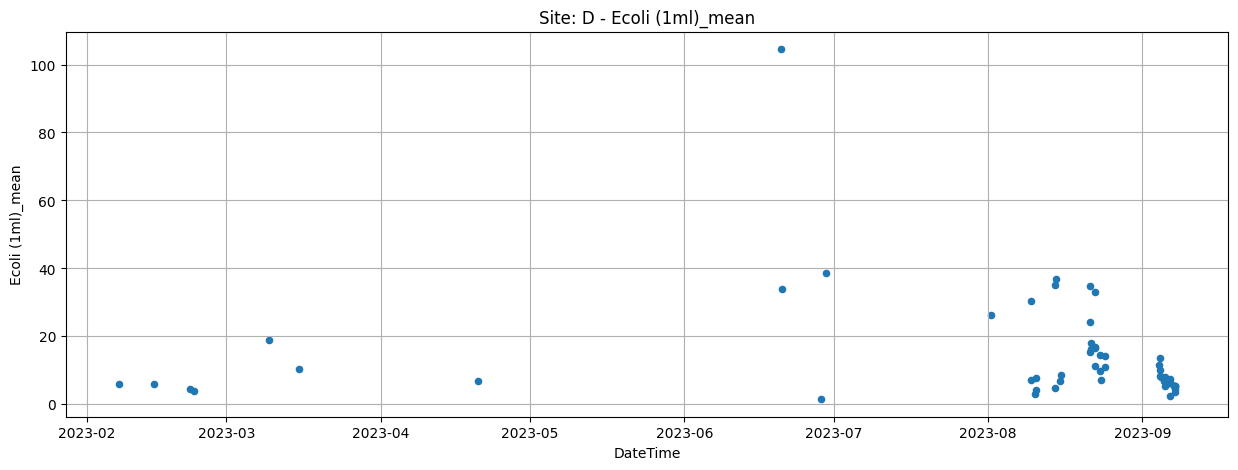

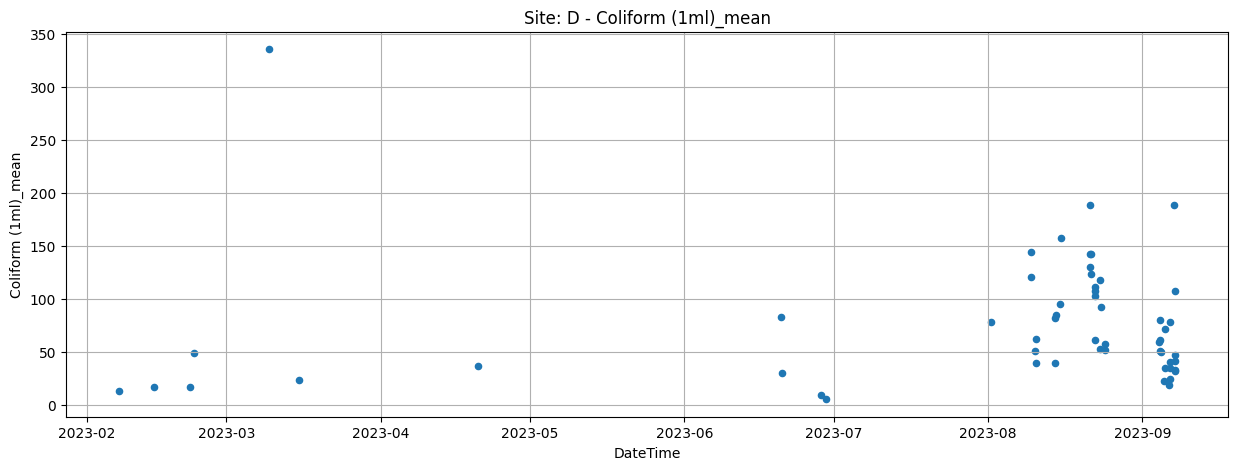

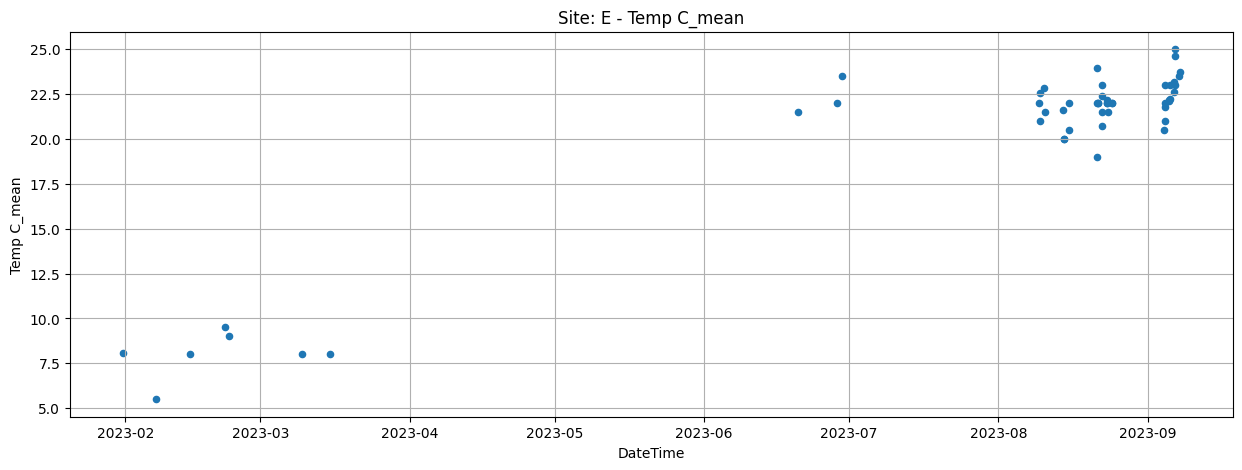

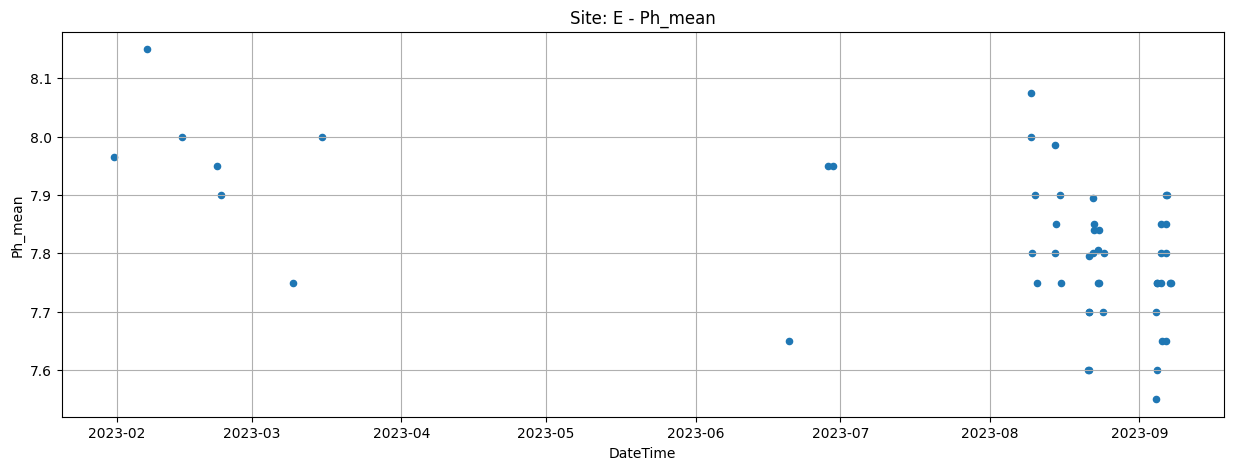

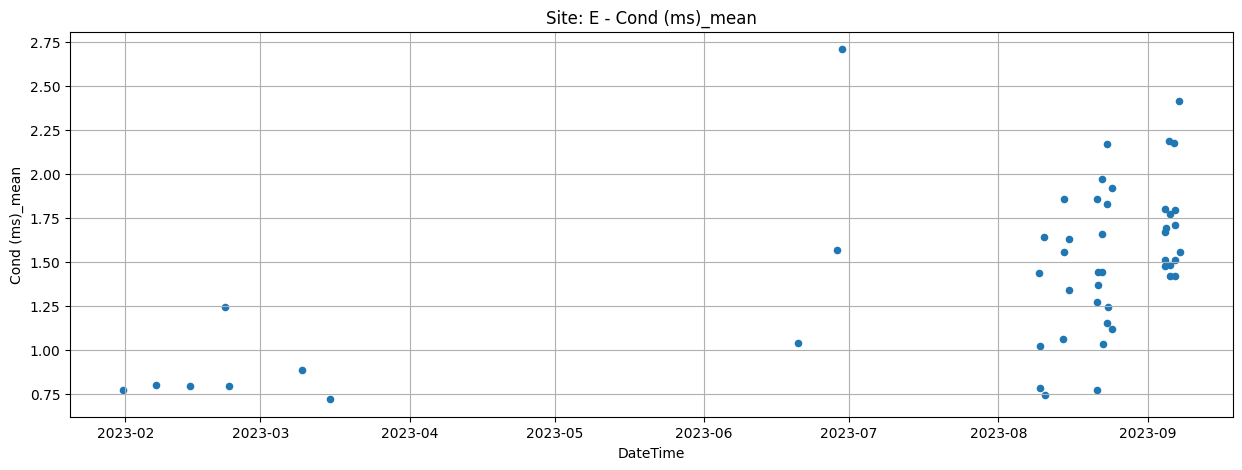

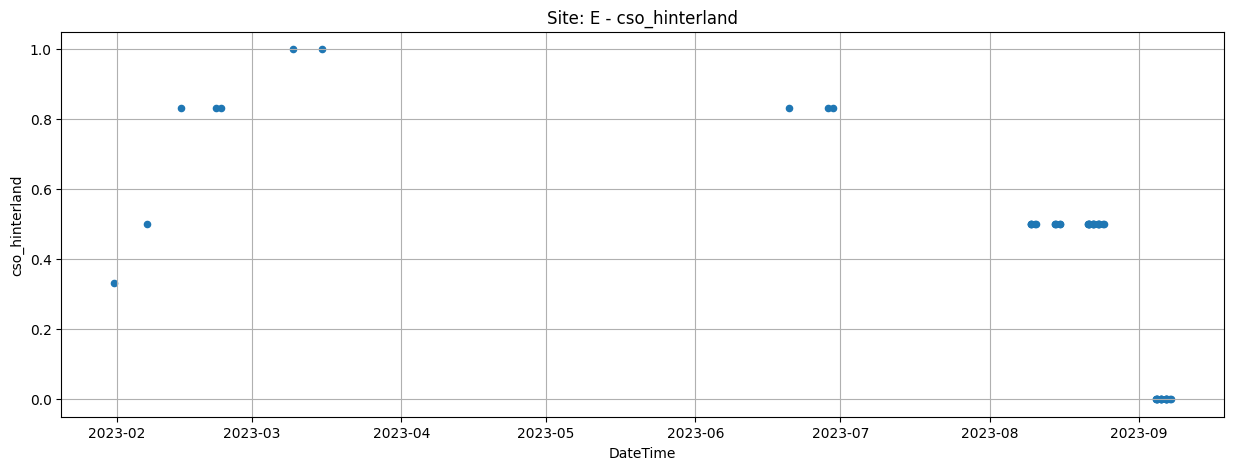

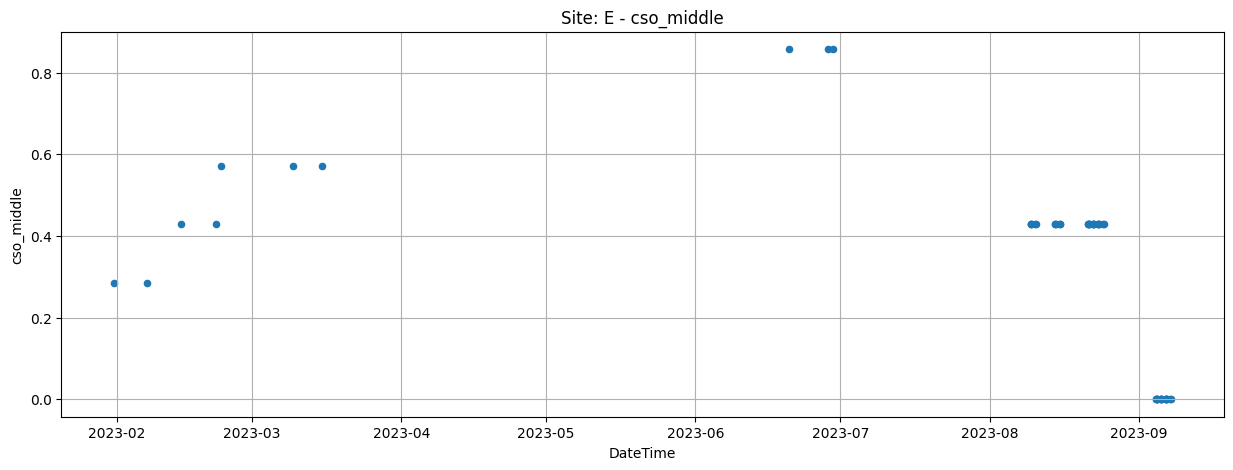

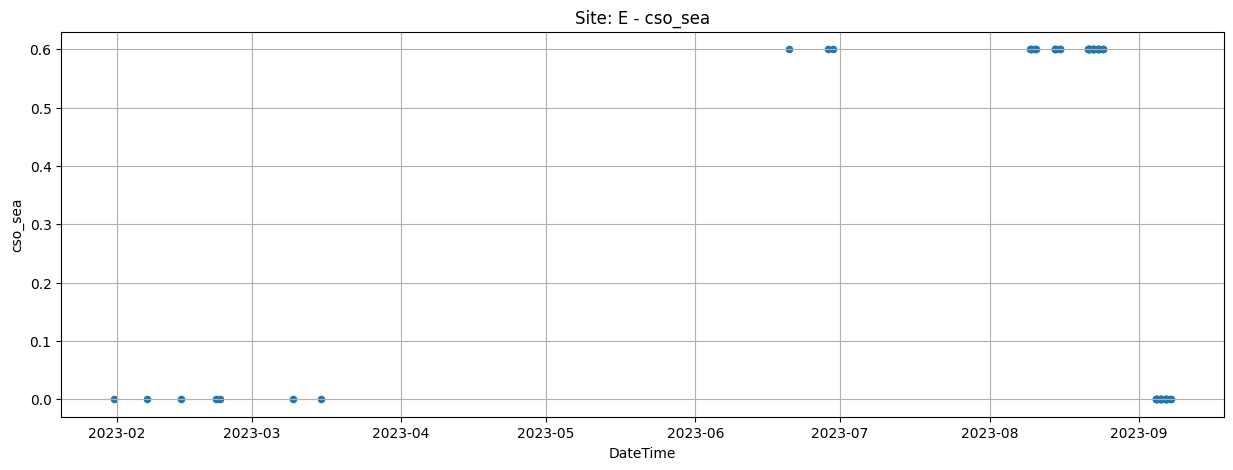

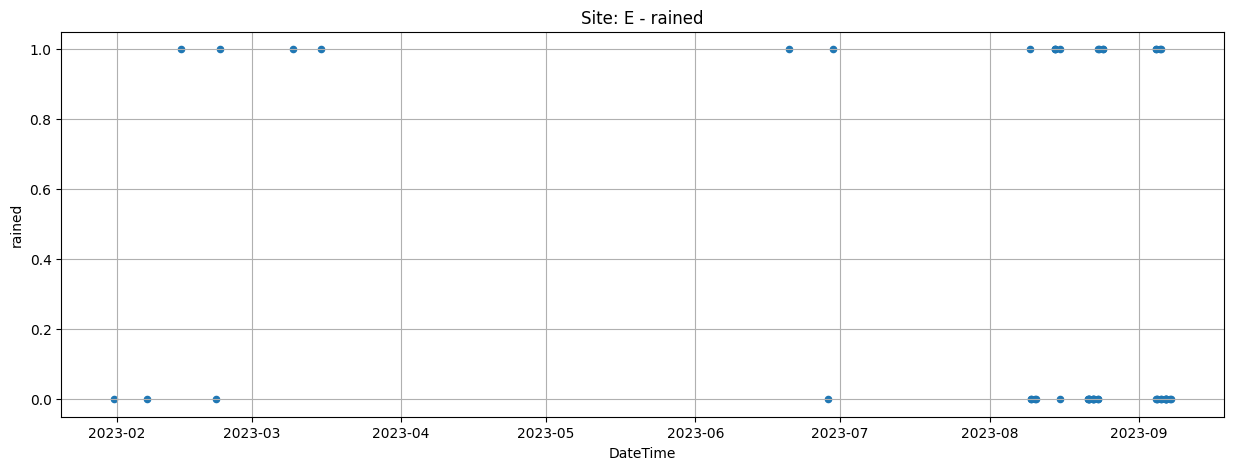

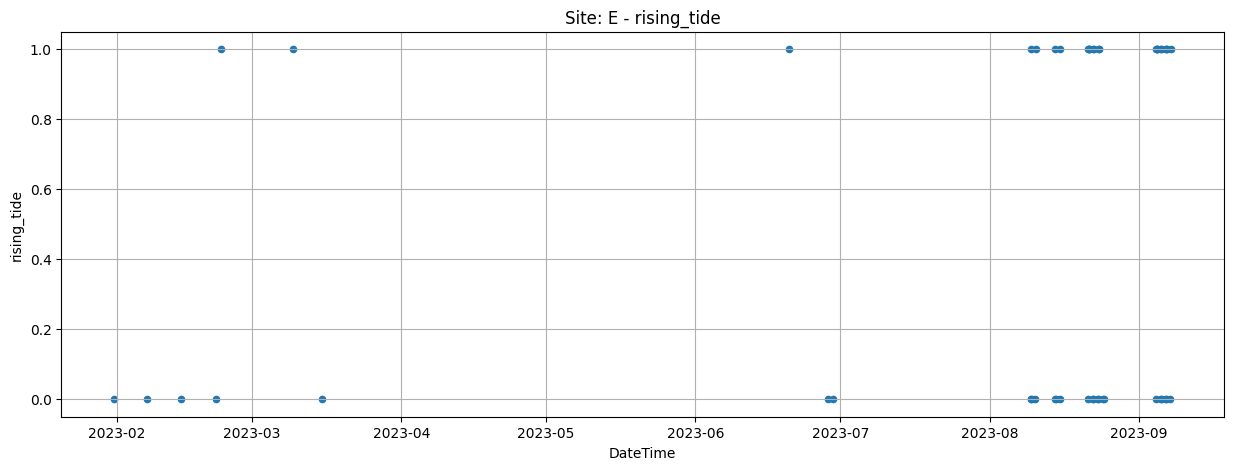

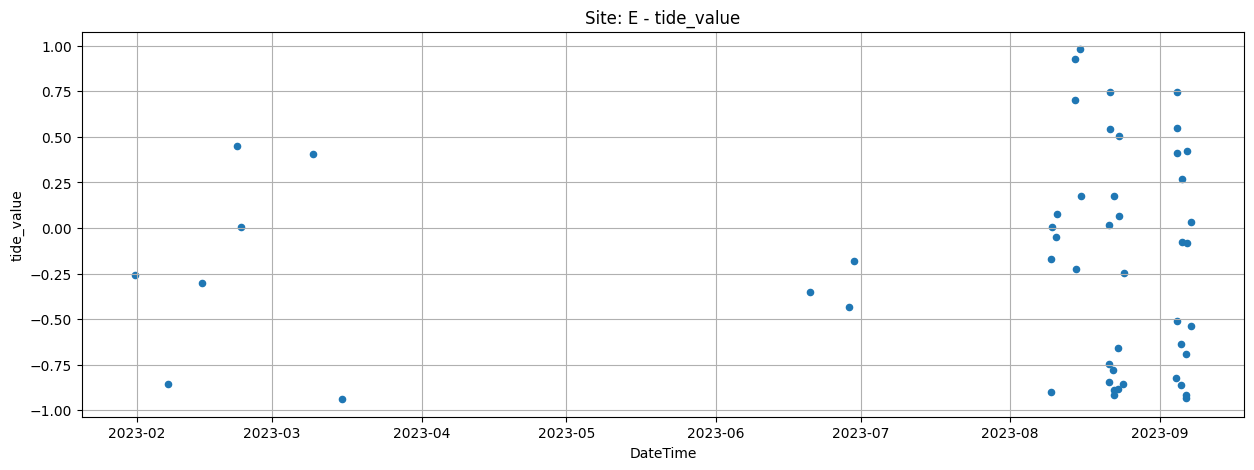

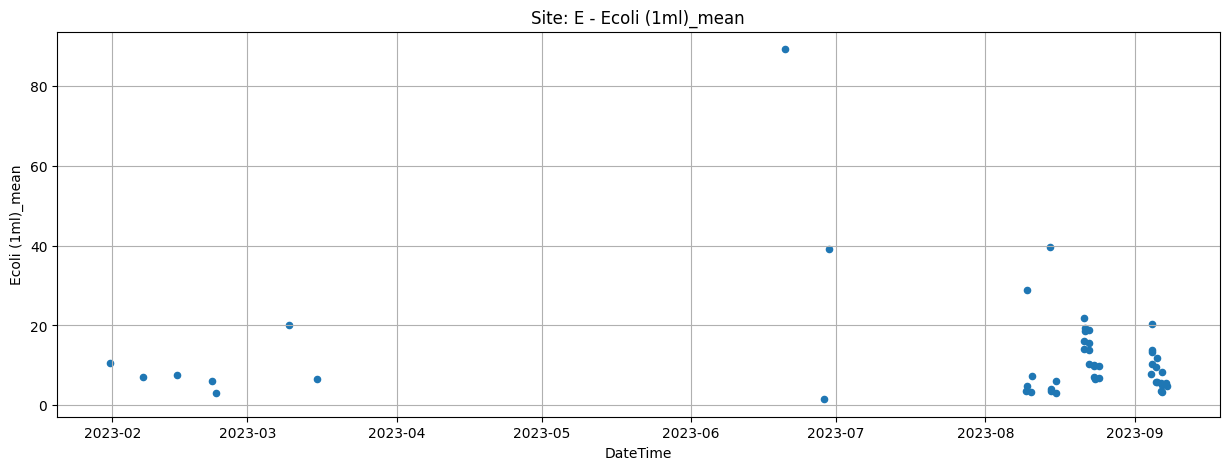

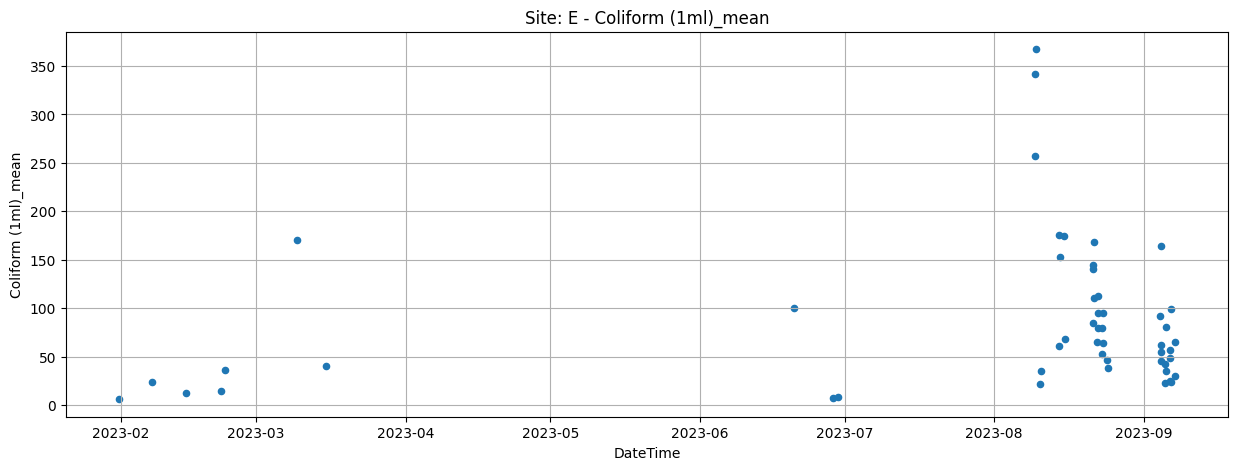

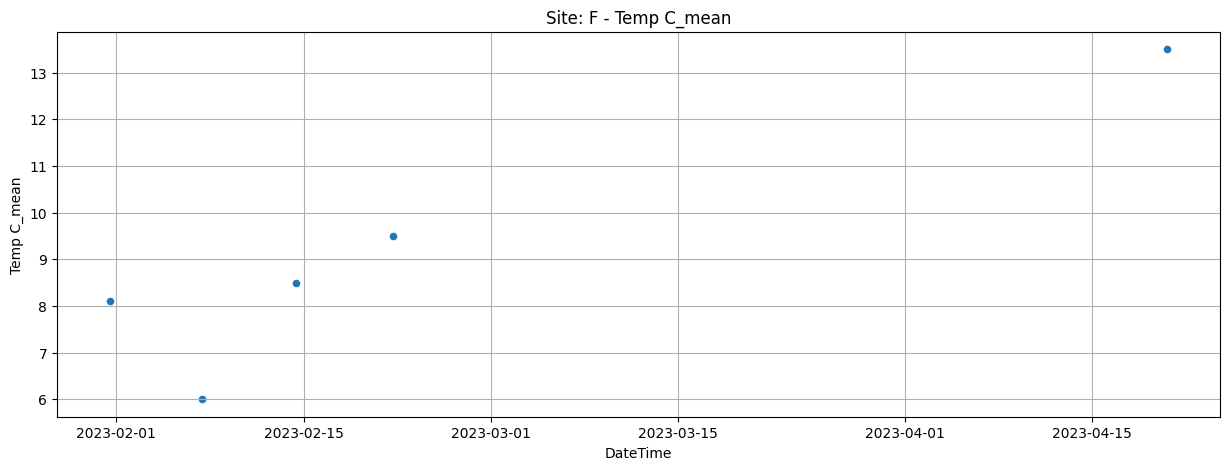

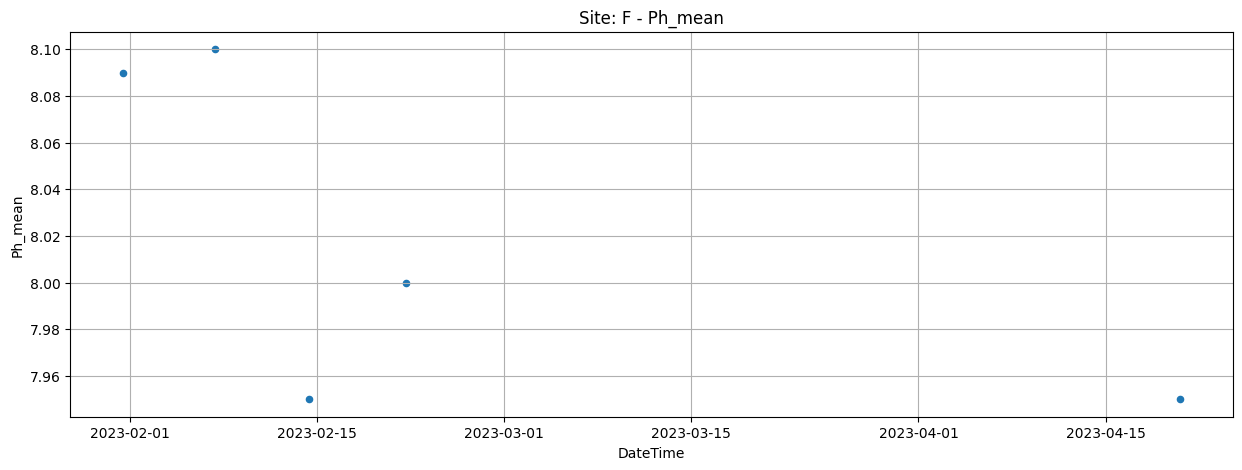

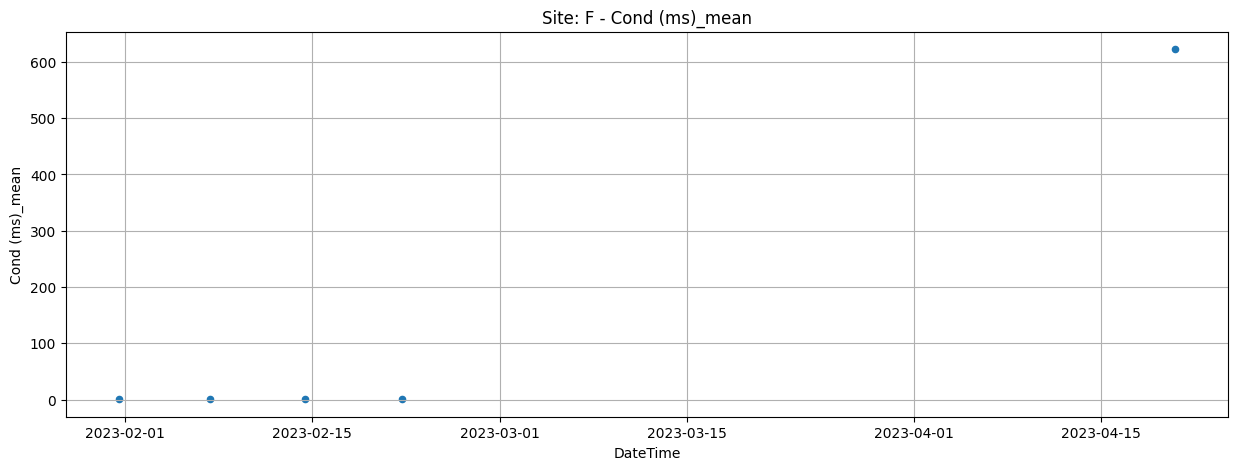

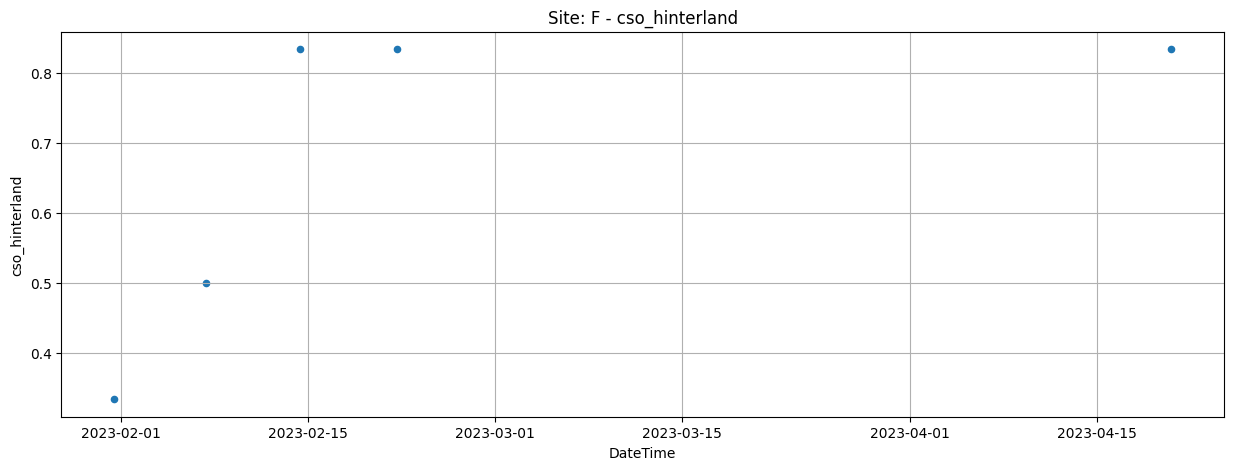

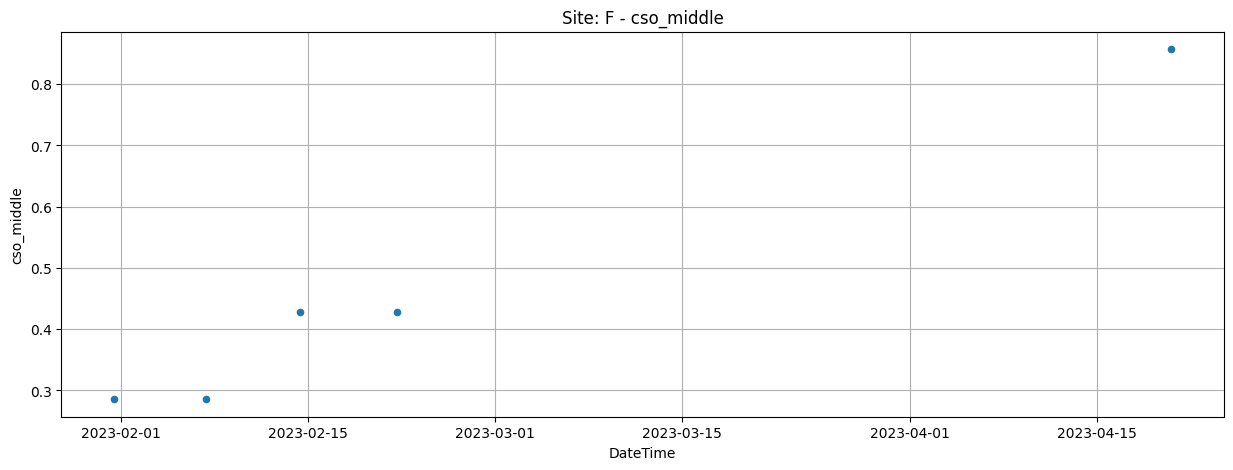

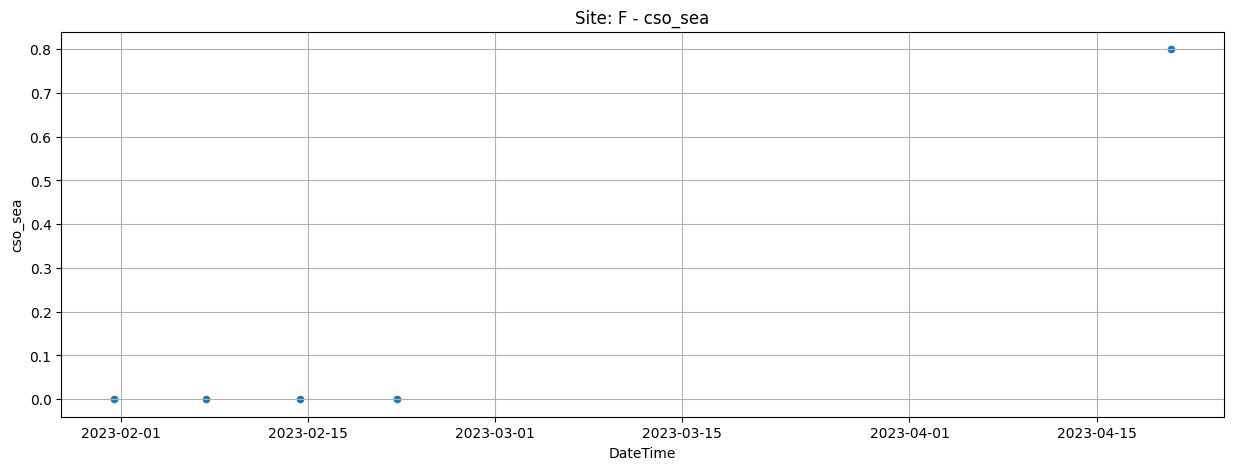

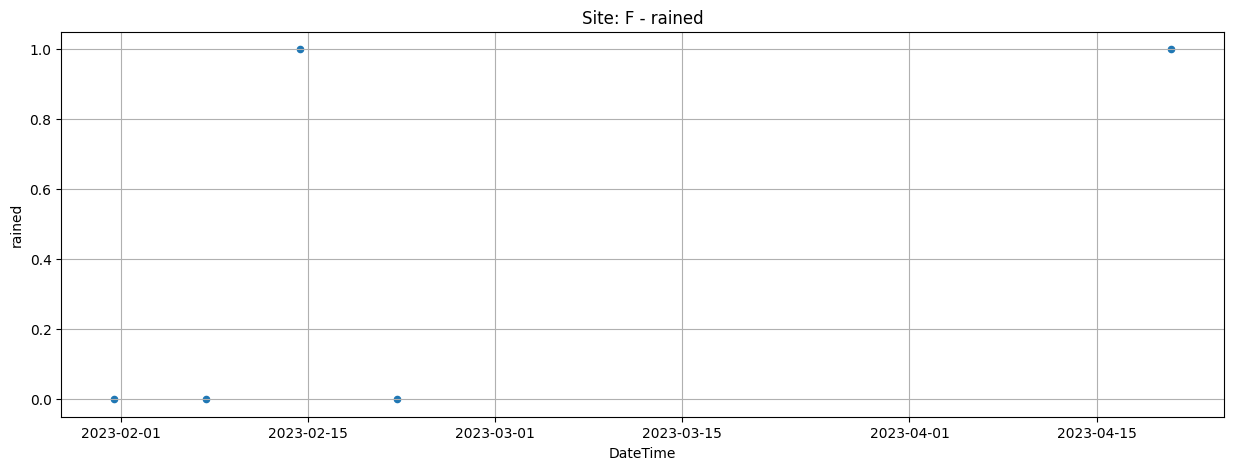

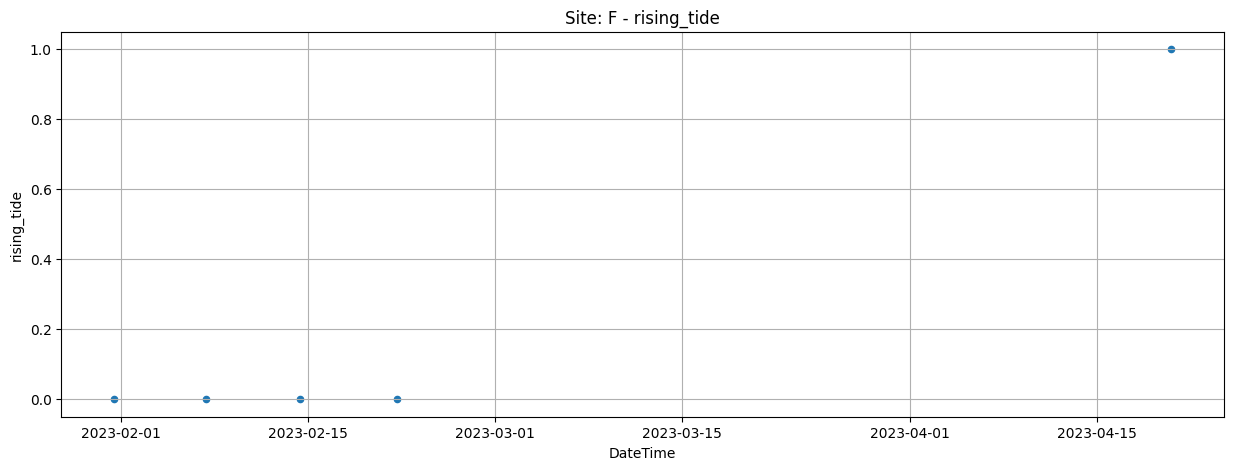

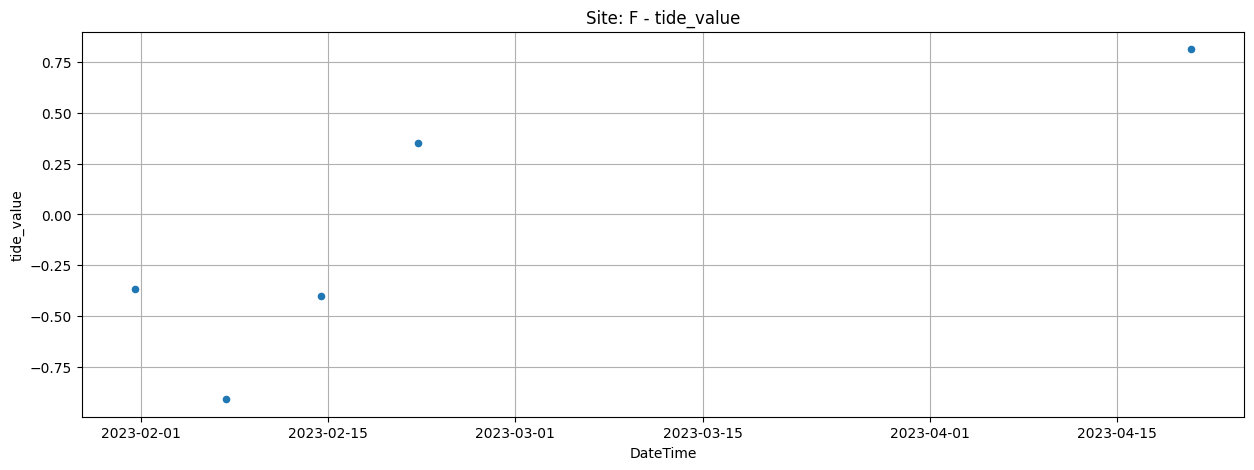

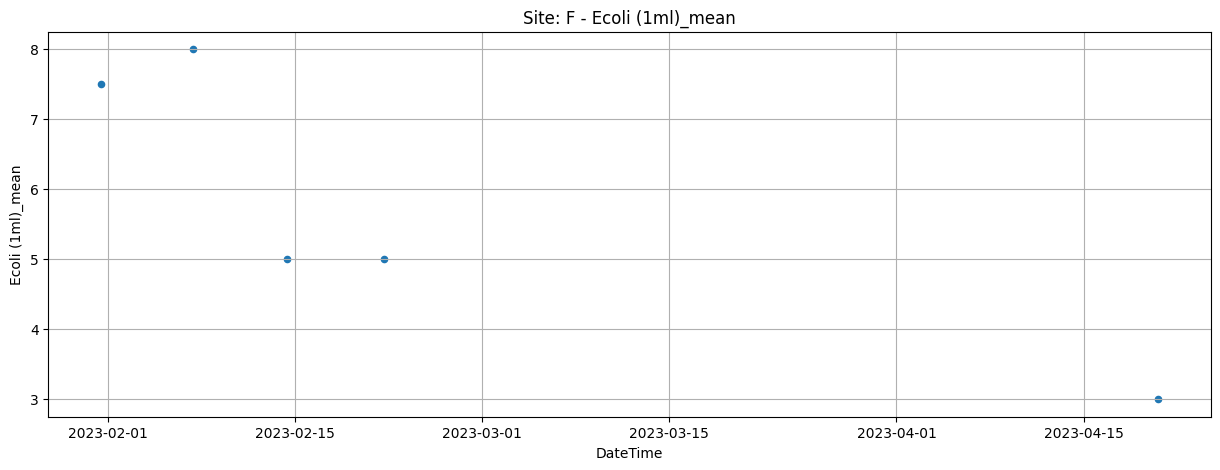

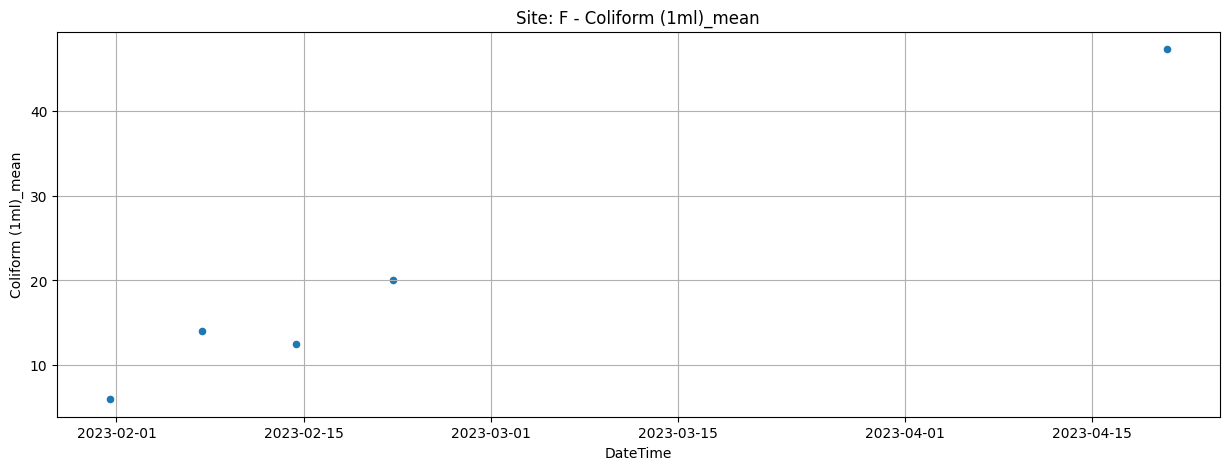

In [55]:
for site in site_dict:
    for col in analyze_columns:
        site_dict[site].plot(
            x="DateTime", y=col, figsize=(15, 5), grid=True, kind="scatter"
        )
        plt.title("Site: " + site + " - " + col)